In [1]:
import numpy as np
import struct

width = 240
height = 180

xc = 92

def load_img(name, width = width, height=height):
    with open(rf"v2/{name}.dump", mode='rb') as file: # b is important -> binary
        fileContent = file.read()
    img = np.zeros((width, height))
    x = 0
    y = 0
    for v in struct.iter_unpack("H", fileContent):
        img[x,y] = v[0]
        x += 1
        if x == width:
            x = 0
            y += 1
    return img

def zeroToNone(v):
    return v if v > 0 else None

def draw_yline(ax, img, x, label=""):
    y = range(height)
    x1 = [zeroToNone(img[x,height-i-1]) for i in y]
    ax.scatter(y, x1, label=f"{label}{x}")

def draw_xline(ax, img, y, label=""):
    x = range(width)
    y1 = [zeroToNone(img[i,height-y-1]) for i in x]
    ax.scatter(x, y1, label=f"{label}{y}")

import numpy as np
from PIL import Image

def getImage(img):
    array = np.zeros((img.shape[1],img.shape[0]))
    vmin = 10000000
    vmax = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = img[x,y]
            if v < vmin:
                vmin = v
            if v > vmax:
                vmax = v
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            v = int((img[x,y] - vmin) * 255 / (vmax - vmin))
            array[y,x] = v
    return Image.fromarray(array)


[ 1.49681642e-02 -1.87865657e-01  1.77340481e+02]


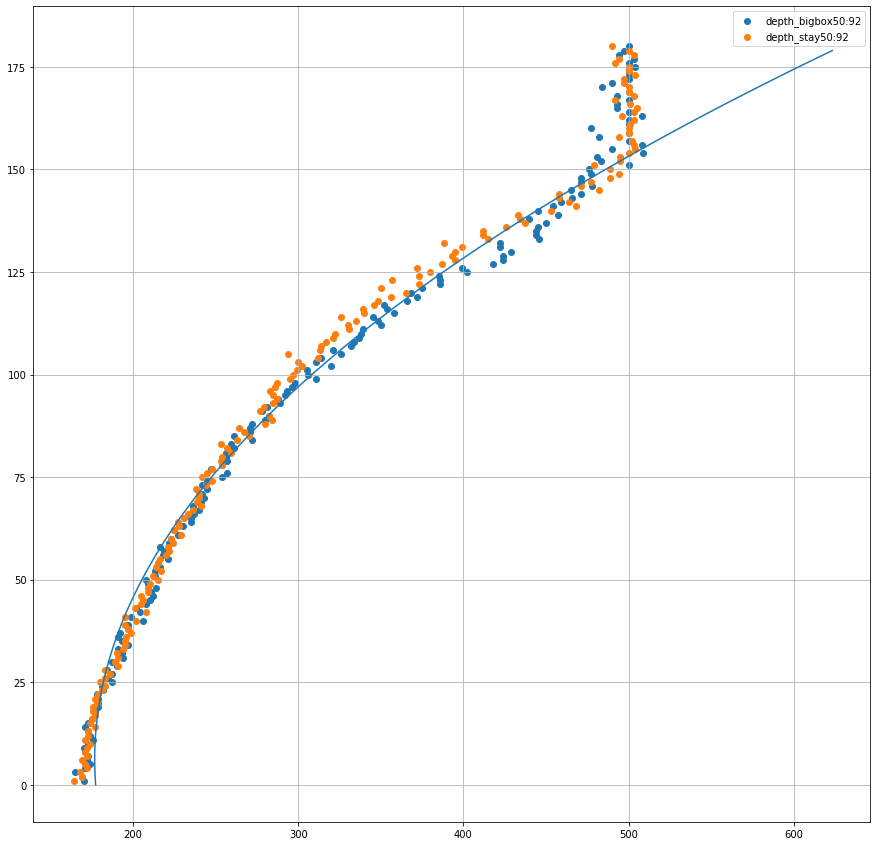

In [3]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0, pa, pv):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)
        if height - y < 150:
            pa.append(height - y)
            pv.append(d)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

pa = []
pv = []
    
dscatter("depth_bigbox50", xc, pa, pv)
dscatter("depth_stay50", xc, pa, pv)

c = np.polyfit(pa, pv, 2)
print(c)
xp = []
yp = []
for y in range(height):
    yp.append(y)
    v = 0
    for k in c:
        v = v * y + k
    xp.append(v)
ax.plot(xp,yp)

    
ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

[ 5.89494380e-06 -7.03269136e-03  3.00940632e+00 -3.28471368e+02]


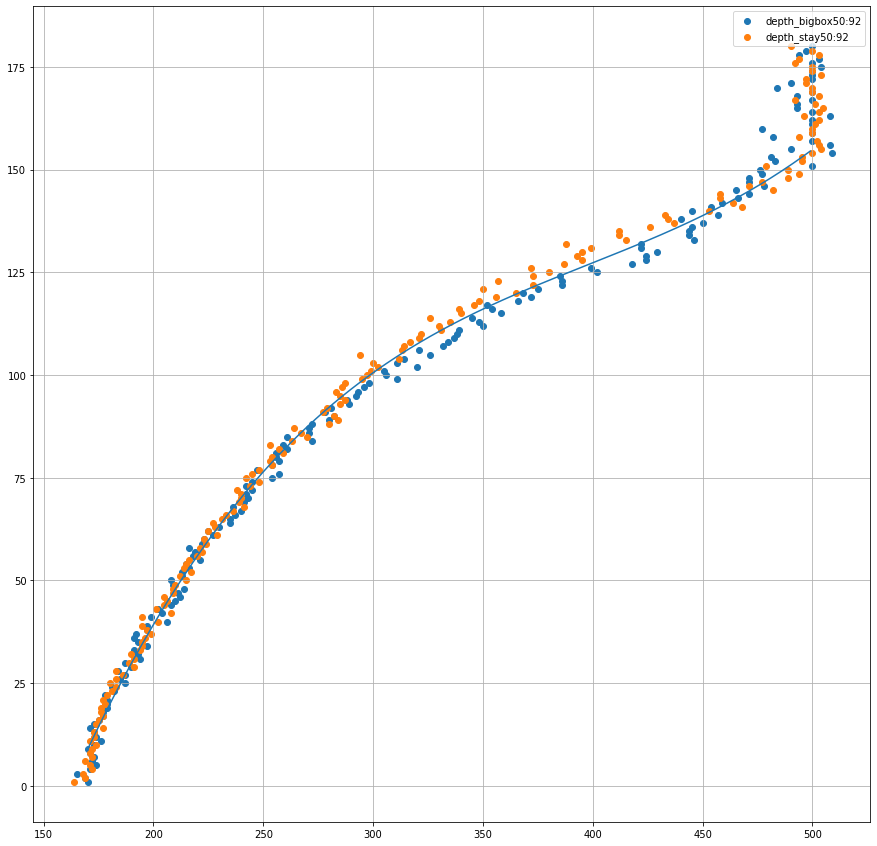

In [4]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0, pa, pv):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)
        if height - y < 150:
            pa.append(d)
            pv.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

pa = []
pv = []
    
dscatter("depth_bigbox50", xc, pa, pv)
dscatter("depth_stay50", xc, pa, pv)

c = np.polyfit(pa, pv, 3)
print(c)
xp = []
yp = []
for x in range(170, 500):
    xp.append(x)
    v = 0
    for k in c:
        v = v * x + k
    yp.append(v)
ax.plot(xp,yp)

    
ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

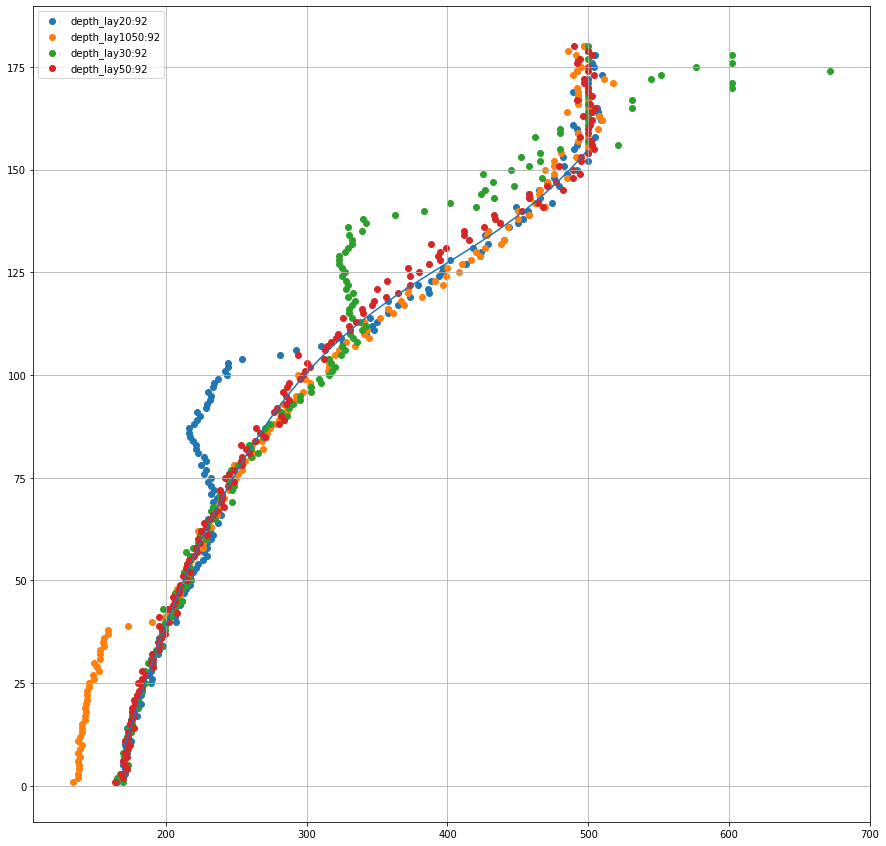

In [5]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


def fdistance(y):
    c = [1.49681642e-02, -1.87865657e-01,  1.77340481e+02]
    v = 0
    for k in c:
        v = v * y + k
    return v

def fy(d):
    c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
    v = 0
    for k in c:
        v = v * d + k
    return v
    
def drawGround(ax):
    
    xp = []
    yp = []
    for y in range(height):
        yp.append(y)
        xp.append(fdistance(y))
    ax.plot(xp,yp)

def drawGround2(ax):
    xp = []
    yp = []
    for d in range(170, 500):
        xp.append(d)
        yp.append(fy(d))

    ax.plot(xp,yp)

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

#dscatter("depth_bigbox30", xc)
dscatter("depth_lay20", xc)
dscatter("depth_lay1050", xc)
dscatter("depth_lay30", xc)
dscatter("depth_lay50", xc)
#drawGround(ax)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

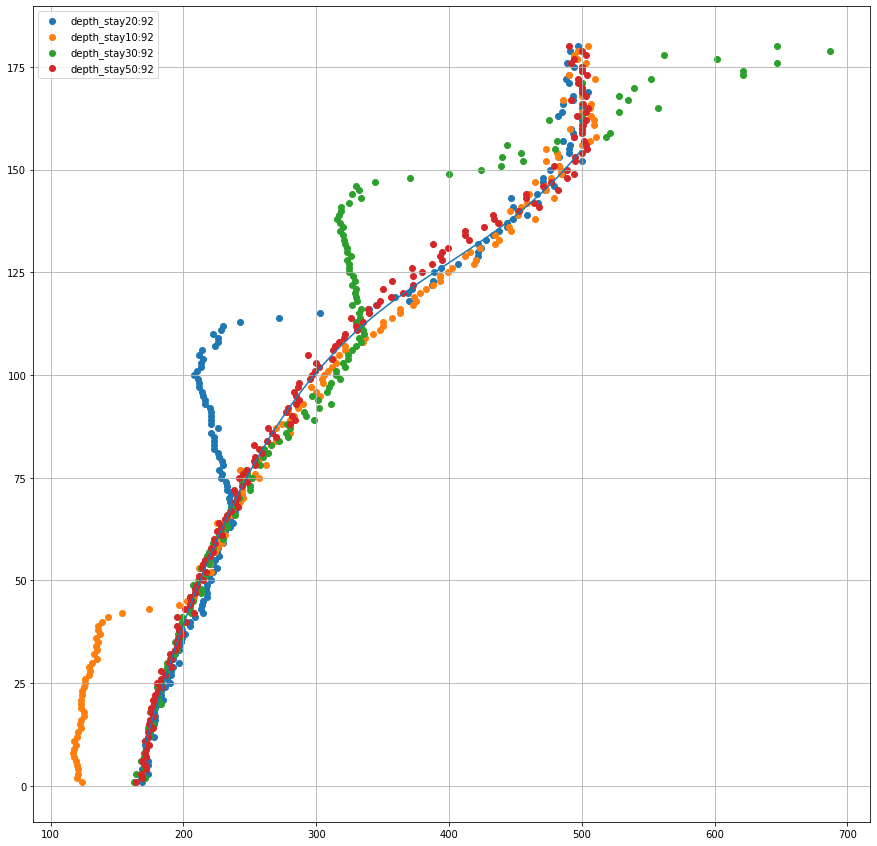

In [6]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

#dscatter("depth_bigbox30", xc)
dscatter("depth_stay20", xc)
dscatter("depth_stay10", xc)
dscatter("depth_stay30", xc)
dscatter("depth_stay50", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

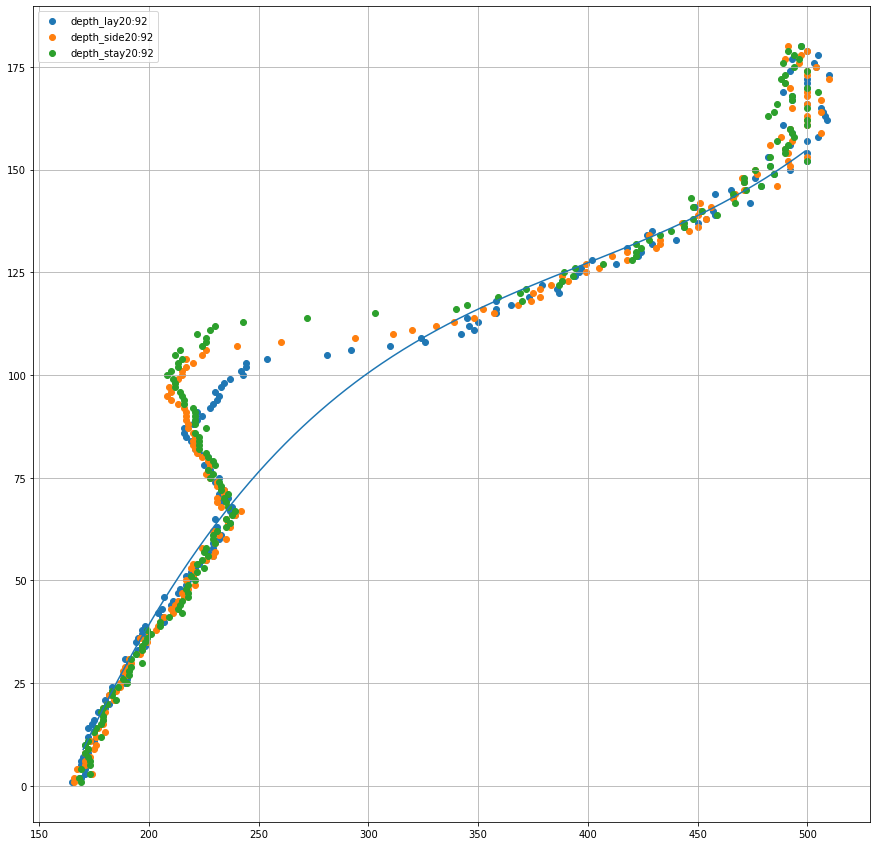

In [61]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_lay20", xc)
dscatter("depth_side20", xc)
dscatter("depth_stay20", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

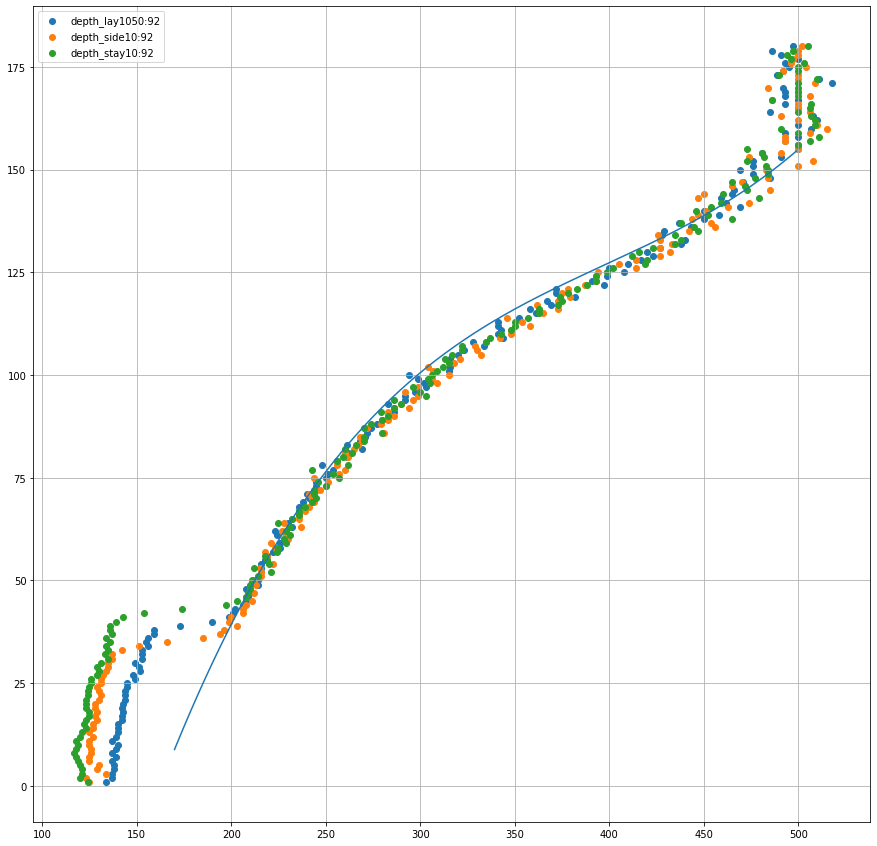

In [62]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_lay1050", xc)
dscatter("depth_side10", xc)
dscatter("depth_stay10", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

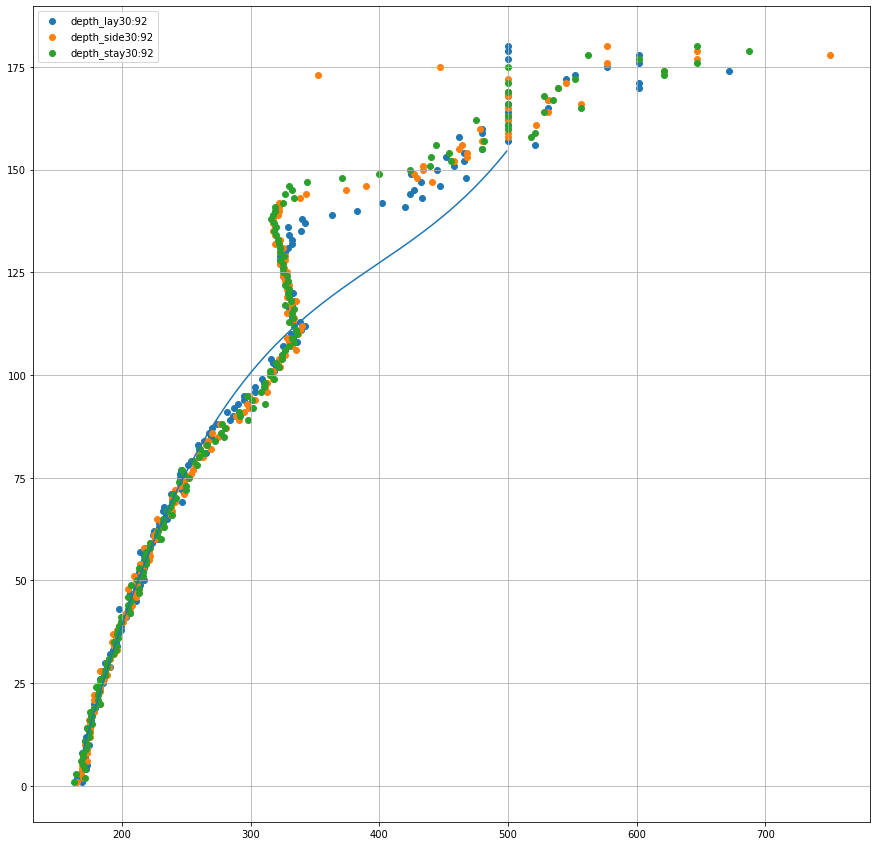

In [63]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_lay30", xc)
dscatter("depth_side30", xc)
dscatter("depth_stay30", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

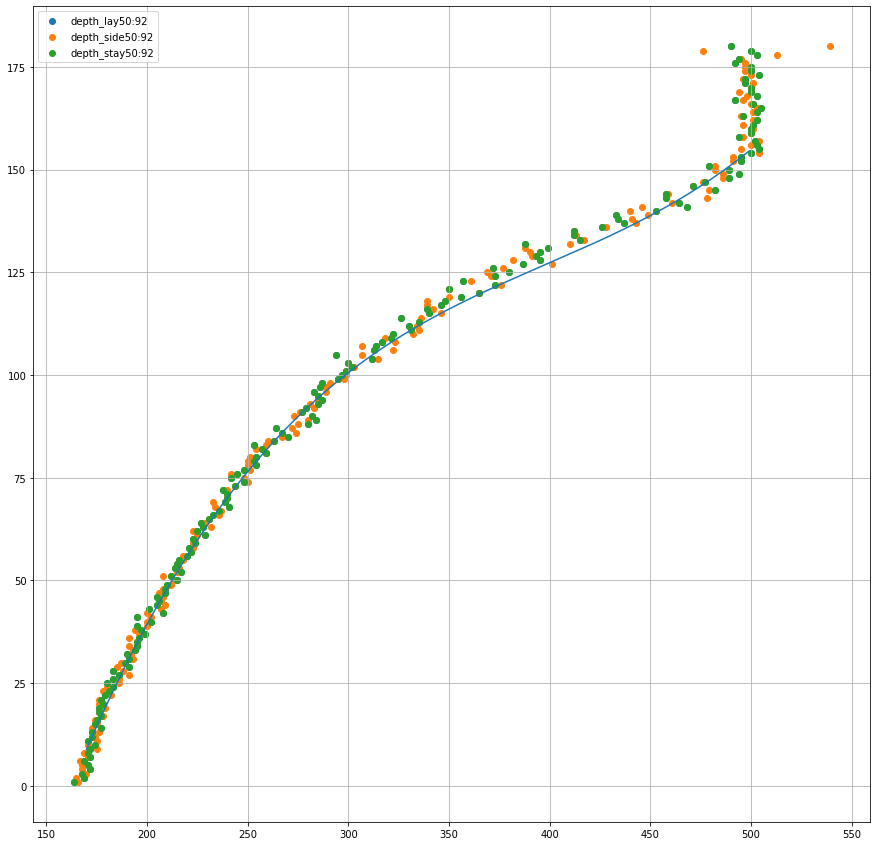

In [64]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter(file, x0):
    img = load_img(file)
    xd = []
    yd = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd.append(height - y)

    ax.scatter(xd, yd, label=f"{file}:{x0}")

dscatter("depth_lay50", xc)
dscatter("depth_side50", xc)
dscatter("depth_stay50", xc)
drawGround2(ax)

ax.grid(True)
ax.legend()
#ax.set_ylim(-50,200)
#ax.set_xlim(0,80)
    
plt.show()

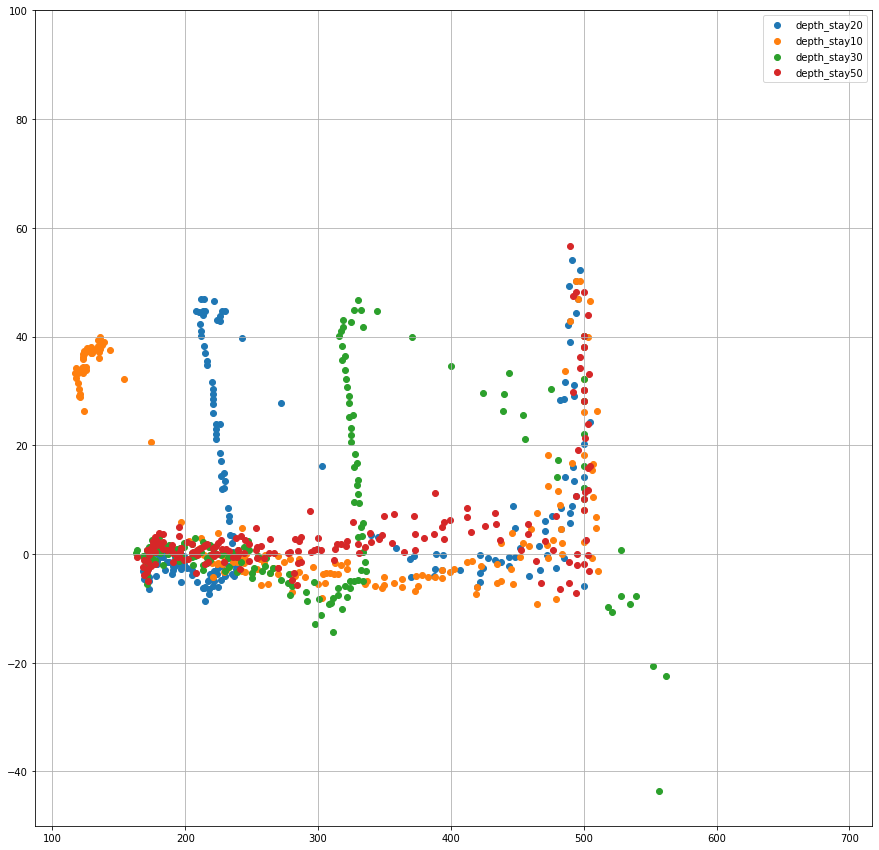

In [81]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter2(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}")

dscatter2("depth_stay20", xc)
dscatter2("depth_stay10", xc)
dscatter2("depth_stay30", xc)
dscatter2("depth_stay50", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

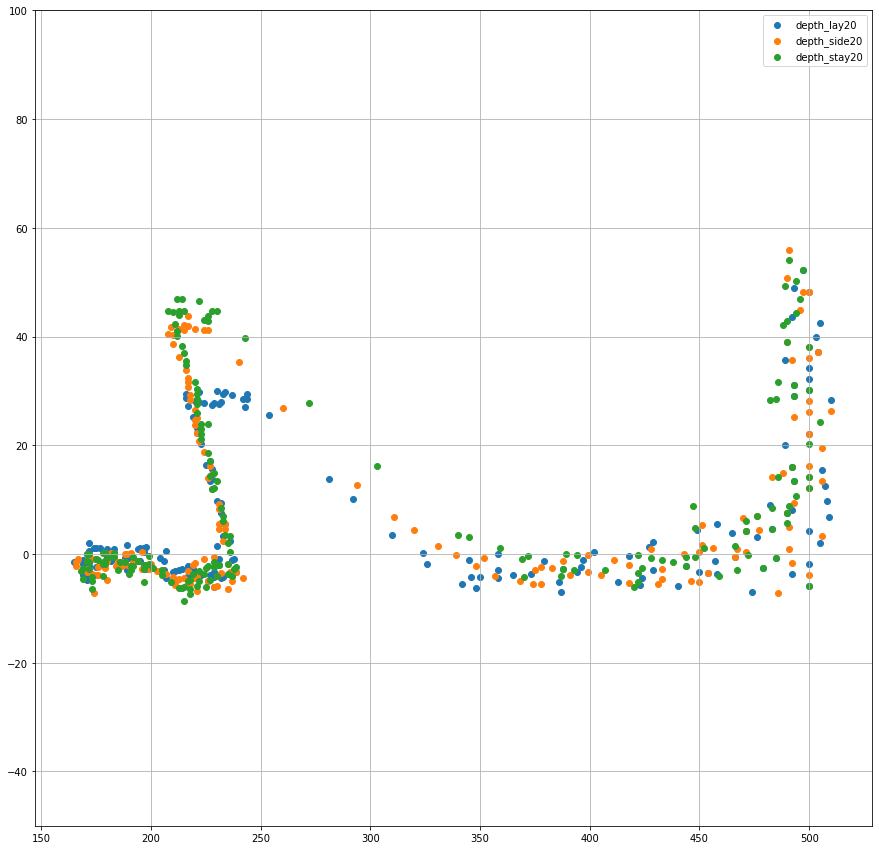

In [82]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

dscatter2("depth_lay20", xc)
dscatter2("depth_side20", xc)
dscatter2("depth_stay20", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

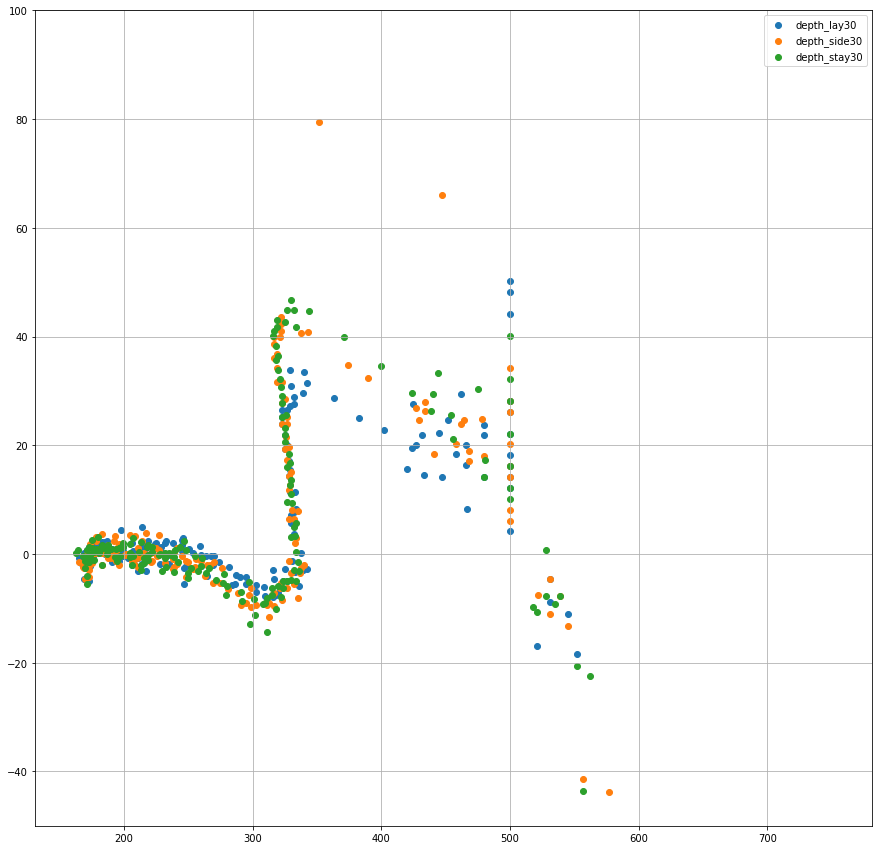

In [83]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

dscatter2("depth_lay30", xc)
dscatter2("depth_side30", xc)
dscatter2("depth_stay30", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

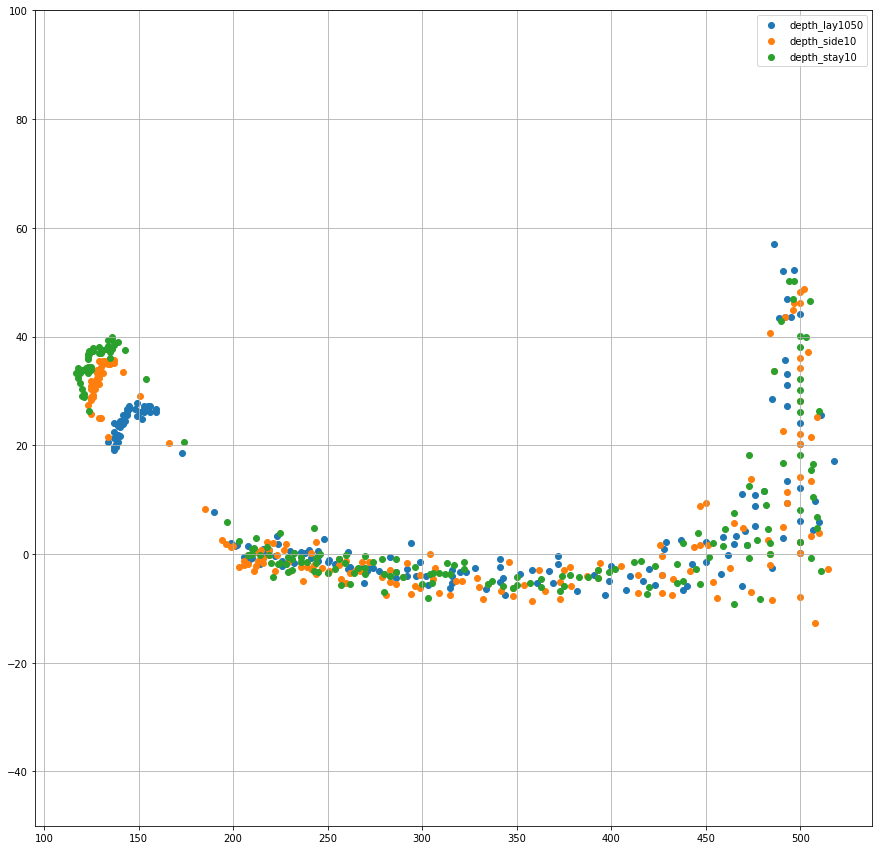

In [84]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

dscatter2("depth_lay1050", xc)
dscatter2("depth_side10", xc)
dscatter2("depth_stay10", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

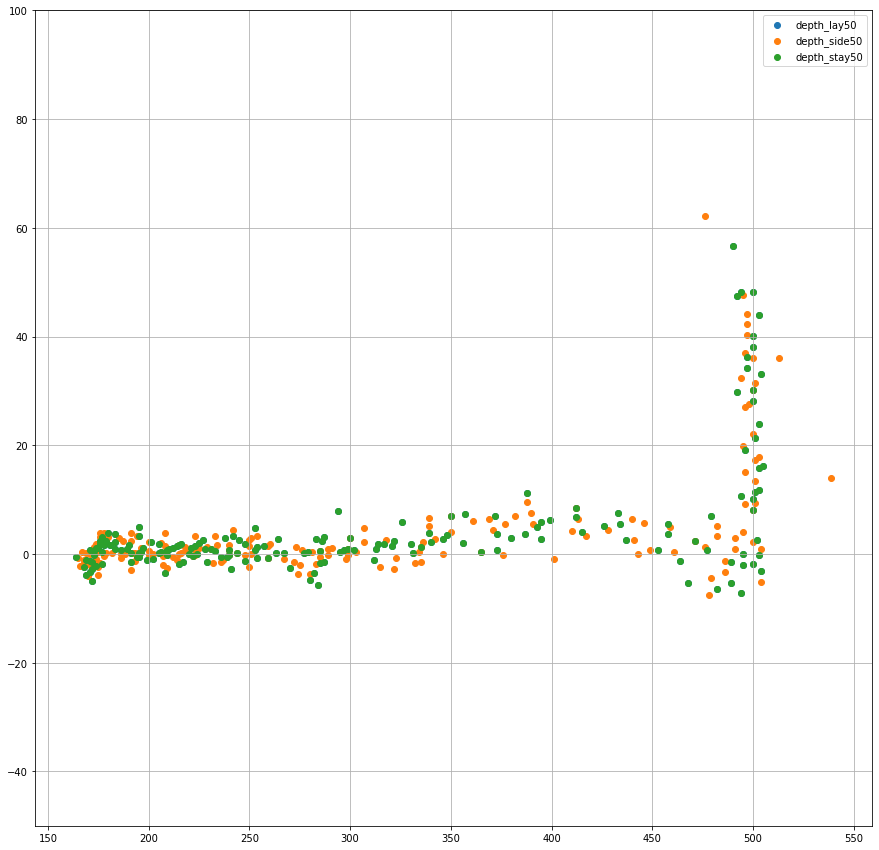

In [85]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


dscatter2("depth_lay50", xc)
dscatter2("depth_side50", xc)
dscatter2("depth_stay50", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

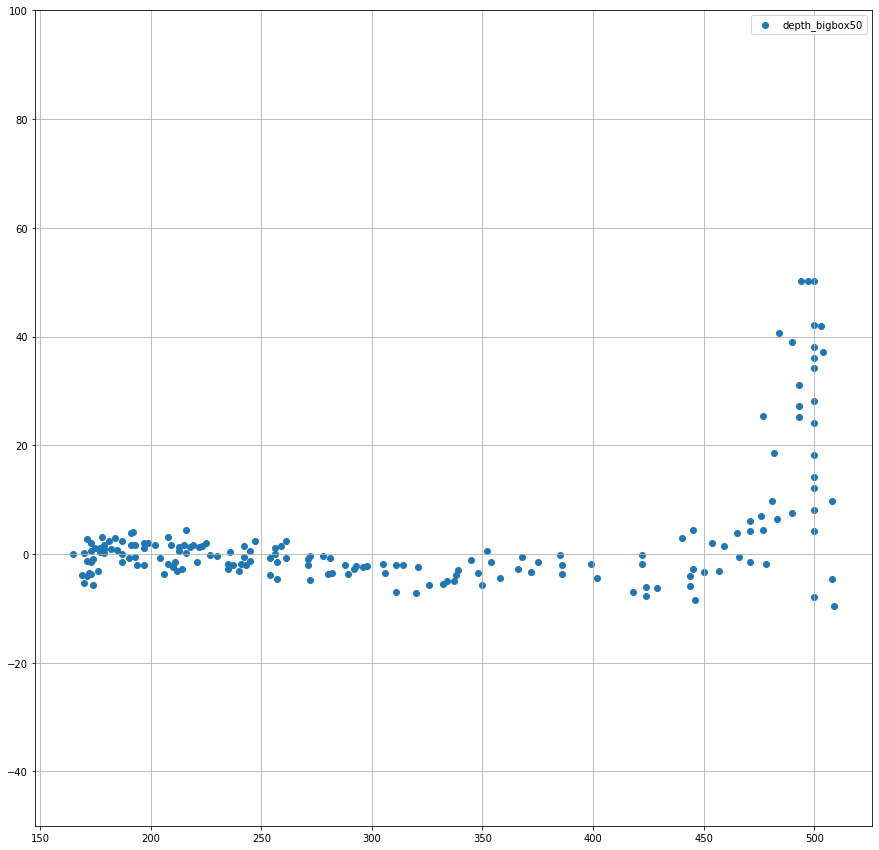

In [86]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


dscatter2("depth_bigbox50", xc)

ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

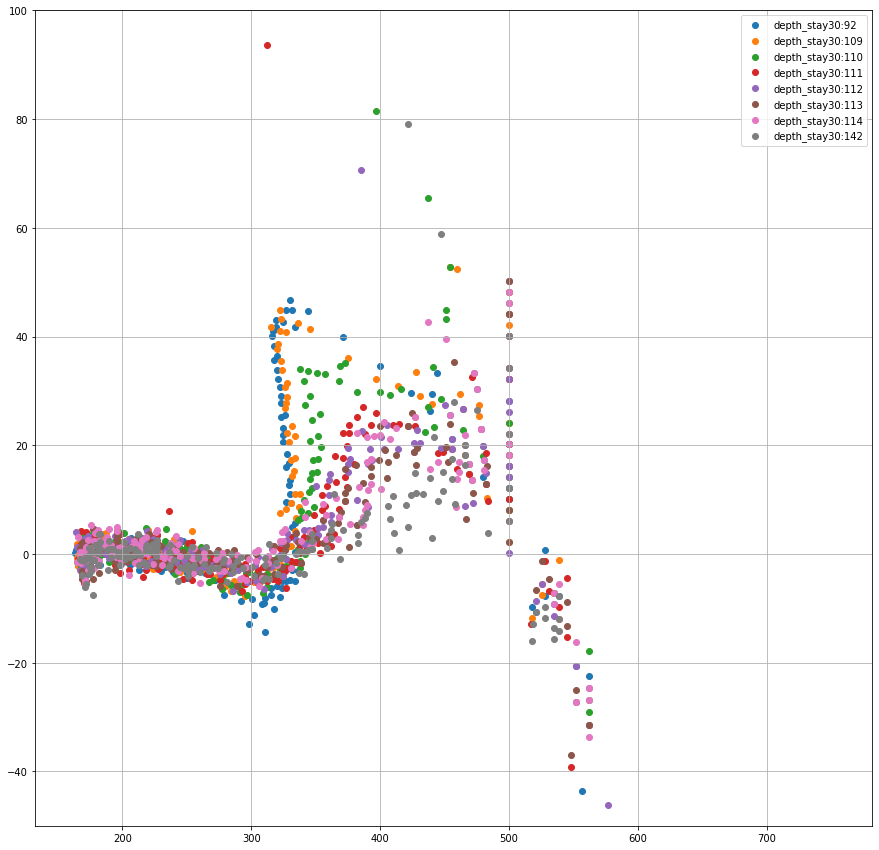

In [102]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter3(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}:{x0}")


dscatter3("depth_stay30", xc)
dscatter3("depth_stay30", xc + 17) # real last
dscatter3("depth_stay30", xc + 18)
dscatter3("depth_stay30", xc + 19)
dscatter3("depth_stay30", xc + 20)
dscatter3("depth_stay30", xc + 21)
dscatter3("depth_stay30", xc + 22)
dscatter3("depth_stay30", xc + 50)



ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

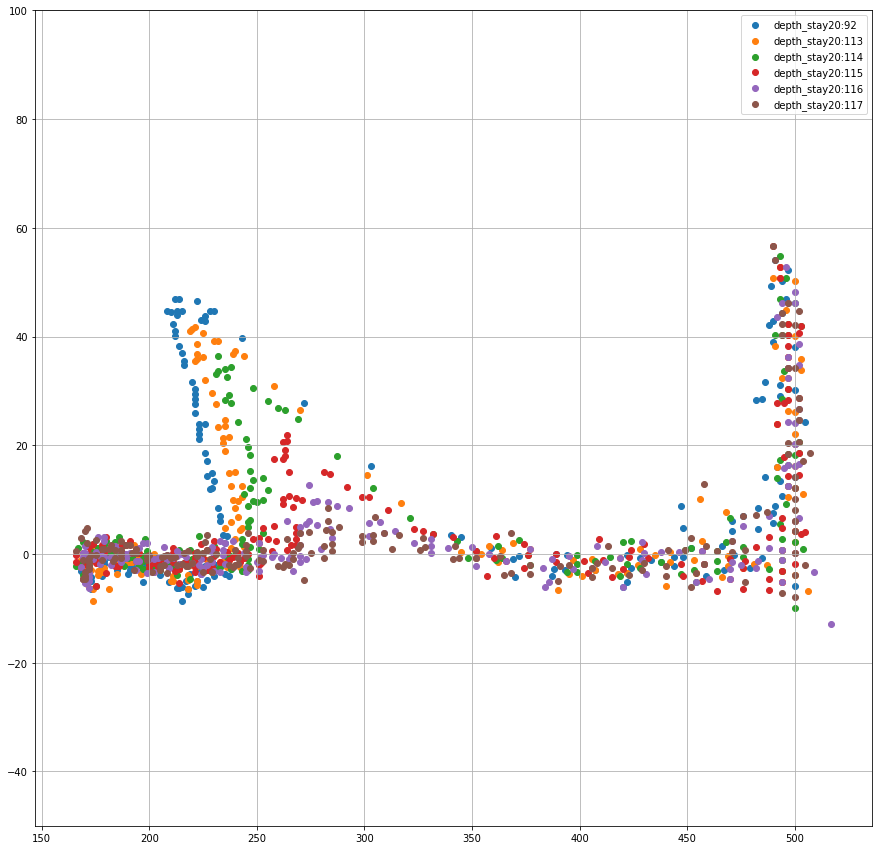

In [106]:
from scipy.ndimage import convolve
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter3(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}:{x0}")


dscatter3("depth_stay20", xc)
dscatter3("depth_stay20", xc + 21) # real last 113
dscatter3("depth_stay20", xc + 22)
dscatter3("depth_stay20", xc + 23)
dscatter3("depth_stay20", xc + 24)
dscatter3("depth_stay20", xc + 25)



ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

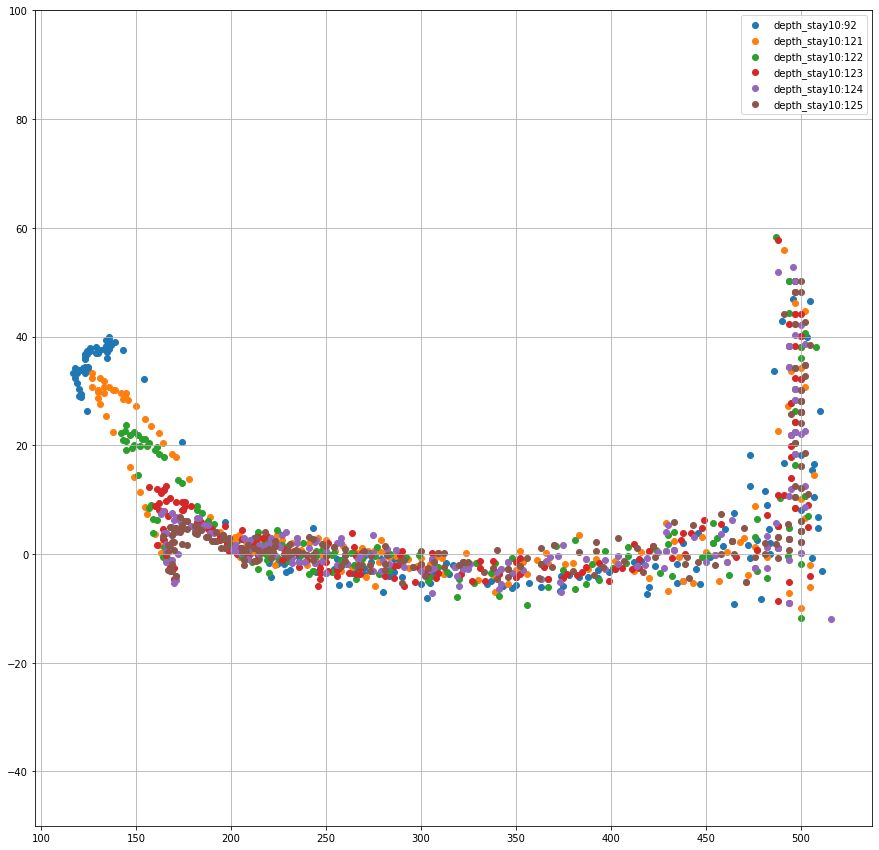

In [108]:
from math import *

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def dscatter3(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []
    for y in range(height):
        d = img[x0,y]
        xd.append(d)
        yd3.append((height - y - fy(d)) * (d / 250)  )

    ax.scatter(xd, yd3, label=f"{file}:{x0}")


dscatter3("depth_stay10", xc)
dscatter3("depth_stay10", xc + 29) # real last 121
dscatter3("depth_stay10", xc + 30)
dscatter3("depth_stay10", xc + 31)
dscatter3("depth_stay10", xc + 32)
dscatter3("depth_stay10", xc + 33)



ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(0,80)
    
plt.show()

[(500.0, 43.9880700695639, 5.0, 7)]


y,d,h0,state
179,164,-0.605008,ground
178,169,-3.86089,***
177,168,-2.39895,ground
176,172,-4.8762,ground
175,171,-3.39958,ground
174,169,-1.15689,ground
173,172,-2.8122,ground
172,171,-1.34758,ground
171,172,-1.4362,ground
170,174,-2.2956,ground


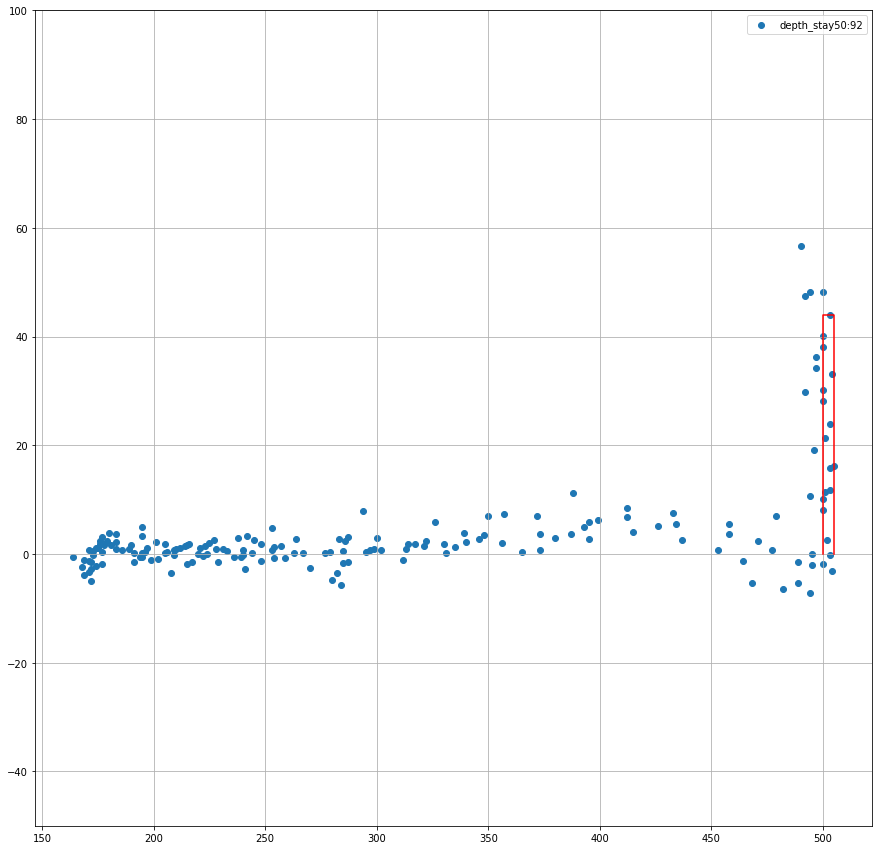

In [27]:
from scipy.ndimage import convolve
from math import *
from tabulate import tabulate
from IPython.display import HTML, display

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def fdistance(y):
    c = [1.49681642e-02, -1.87865657e-01,  1.77340481e+02]
    v = 0
    for k in c:
        v = v * y + k
    return v

def fy(d):
    c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
    v = 0
    for k in c:
        v = v * d + k
    return v

def fh(y,d):
    return (height - y - fy(d)) * (d / 250) 

MIN_DOTS = 7

def dscatter3(file, x0):
    img = load_img(file)
    xd = []
    yd3 = []

    table = [["y", "d", "h0", "state", "objs"]]
    
    objs = []
    thlast = None
    tylast = None
    tdlast = None
    state = "unknown"
    for y in range(height):
        d0 = img[x0,height - y - 1]
        xd.append(d0)
        h0 = fh(height - y - 1,d0)
        yd3.append(h0)
        
        if thlast is None or abs(h0 - thlast) / (y - tylast) < 3:
            if state == "ground":
                if h0 > 10:
                    state = "obj"
                    cfoh = h0
                    cfod = d0
                    cfof = d0
                    ccnt = 0
            else:
                if state == "obj":
                    if h0 <= 10:
                        if ccnt >= MIN_DOTS:
                            objs.append((cfod, cfoh, cfof - cfod,ccnt))
                        state = "ground"
                    else:
                        if abs(d0 - tdlast) >= 20:
                            if ccnt >= MIN_DOTS:
                                objs.append((cfod,cfoh, cfof - cfod, ccnt))
                            state = "unknown"
                        else:
                            ccnt += 1
                            if h0 > cfoh:
                                cfoh = h0
                            if d0 < cfod:
                                cfod = d0
                            if d0 > cfof:
                                cfof = d0
                else:
                    if state == "unknown":
                        if h0 < 10:
                            state = "ground"
                        else:
                            if tdlast is None or abs(d0 - tdlast) < 20:
                                state = "obj"
                                cfoh = h0
                                cfod = d0
                                cfof = d0
                                ccnt = 0
            thlast = h0
            tylast = y
            tdlast = d0
        
            table.append([height - y - 1,d0,h0, state])
        else:
            table.append([height - y - 1,d0,h0, "***"])

    if state == "obj":
        if ccnt >= MIN_DOTS:
            objs.append((cfod,cfoh, cfof - cfod, ccnt))
        
    print(objs)
        
    ax.scatter(xd, yd3, label=f"{file}:{x0}")
    for d,h,g,n in objs:
        ax.plot([d,d,d+g,d+g],[0,h,h,0], color='r')
    
    
    display(HTML(tabulate(table,tablefmt='html',headers='firstrow')))
    


#dscatter3("depth_stay10", xc)
#dscatter3("depth_stay20", 110)
#dscatter3("depth_stay30", xc)
#dscatter3("depth_lay30", xc)
#dscatter3("depth_bigbox50", xc)
dscatter3("depth_stay50", xc)
#dscatter3("depth_bigbox30", xc)



ax.grid(True)
ax.legend()
ax.set_ylim(-50,100)
#ax.set_xlim(110,150)
    
plt.show()

In [8]:
!pip install tabulate

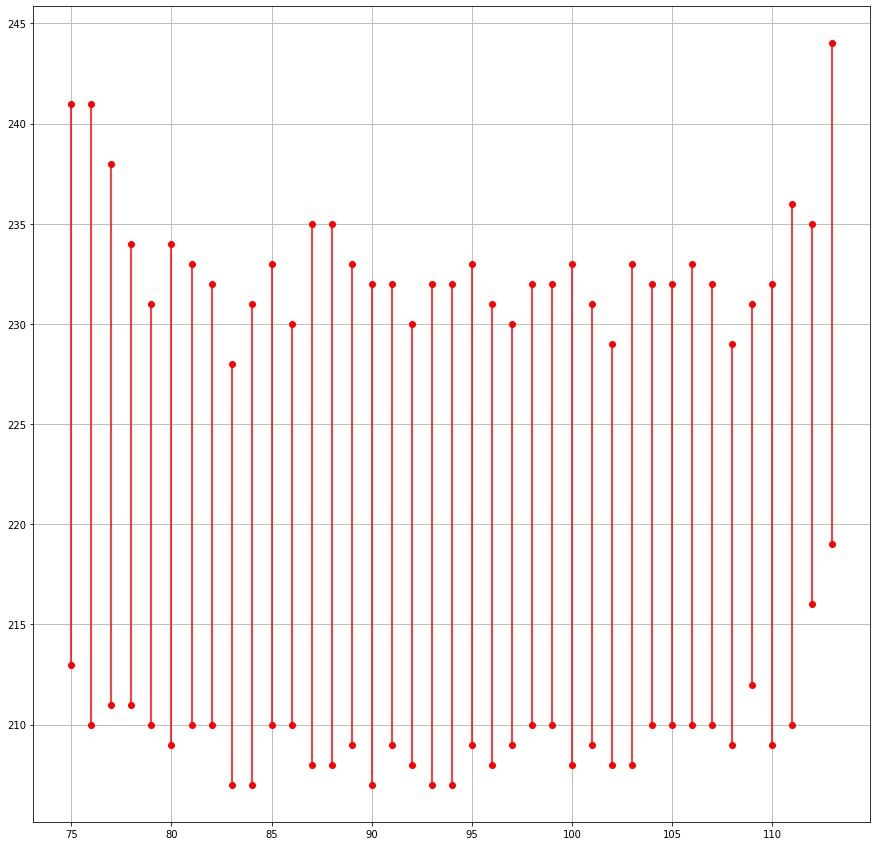

In [32]:
from scipy.ndimage import convolve
from math import *
from tabulate import tabulate
from IPython.display import HTML, display

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def fdistance(y):
    c = [1.49681642e-02, -1.87865657e-01,  1.77340481e+02]
    v = 0
    for k in c:
        v = v * y + k
    return v

def fy(d):
    c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
    v = 0
    for k in c:
        v = v * d + k
    return v

def fh(y,d):
    return (height - y - fy(d)) * (d / 250) 

MIN_DOTS = 20


def dscatter4(file):
    img = load_img(file)
    x0 = xc
    
    for x0 in range(width):
        objs = []
        thlast = None
        tylast = None
        tdlast = None
        state = "unknown"
        for y in range(height):
            d0 = img[x0,height - y - 1]
            h0 = fh(height - y - 1,d0)

            if thlast is None or abs(h0 - thlast) / (y - tylast) < 3:
                if state == "ground":
                    if h0 > 10:
                        state = "obj"
                        cfoh = h0
                        cfod = d0
                        cfof = d0
                        ccnt = 0
                else:
                    if state == "obj":
                        if h0 <= 10:
                            if ccnt >= MIN_DOTS:
                                objs.append((cfod, cfoh, cfof - cfod,ccnt))
                            state = "ground"
                        else:
                            if abs(d0 - tdlast) >= 20:
                                if ccnt >= MIN_DOTS:
                                    objs.append((cfod,cfoh, cfof - cfod, ccnt))
                                state = "unknown"
                            else:
                                ccnt += 1
                                if h0 > cfoh:
                                    cfoh = h0
                                if d0 < cfod:
                                    cfod = d0
                                if d0 > cfof:
                                    cfof = d0
                    else:
                        if state == "unknown":
                            if h0 < 10:
                                state = "ground"
                            else:
                                if tdlast is None or abs(d0 - tdlast) < 20:
                                    state = "obj"
                                    cfoh = h0
                                    cfod = d0
                                    cfof = d0
                                    ccnt = 0
                thlast = h0
                tylast = y
                tdlast = d0

        if state == "obj":
            if ccnt >= MIN_DOTS:
                objs.append((cfod,cfoh, cfof - cfod, ccnt))

        #print(objs)

        #ax.scatter(xd, yd3, label=f"{file}:{x0}")
        for d,h,g,n in objs:
            ax.plot([x0,x0],[d,d+g], 'ro-')
    
    
    #display(HTML(tabulate(table,tablefmt='html',headers='firstrow')))
    



#dscatter4("depth_stay10")
#dscatter4("depth_side10")
#dscatter4("depth_lay1050")
dscatter4("depth_stay20")
#dscatter4("depth_side20")
#dscatter4("depth_lay20")
#dscatter4("depth_stay30")
#dscatter4("depth_side30")
#dscatter4("depth_lay30")
#dscatter4("depth_bigbox50")
#dscatter4("depth_bigbox30")



ax.grid(True)
#ax.legend()
#ax.set_ylim(-50,100)
#ax.set_xlim(110,150)
    
plt.show()

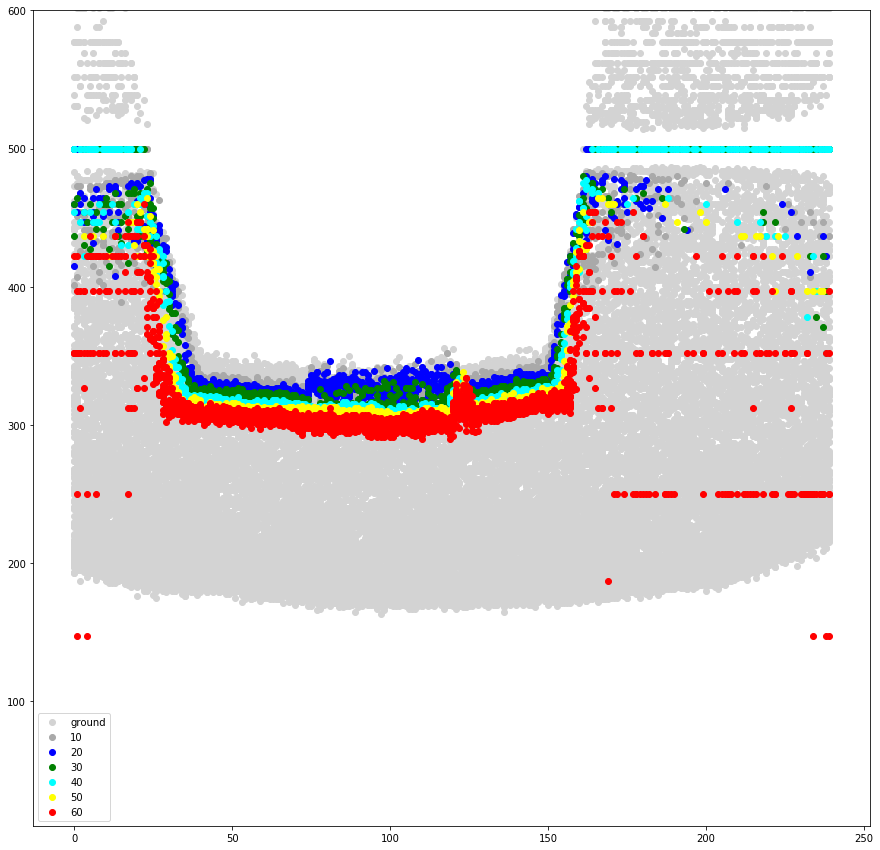

In [116]:
from collections import defaultdict
from math import *
from tabulate import tabulate
from IPython.display import HTML, display

import matplotlib.pyplot as plt

def fdistance(y):
    c = [1.49681642e-02, -1.87865657e-01,  1.77340481e+02]
    v = 0
    for k in c:
        v = v * y + k
    return v

def fy(d):
    c = [ 5.89494380e-06, -7.03269136e-03,  3.00940632e+00, -3.28471368e+02]
    v = 0
    for k in c:
        v = v * d + k
    return v

def fh(y,d):
    return (height - y - fy(d)) * (d / 250) 

def fh2(y, d):
    return (y - fy(d)) * (d / 250) 


def map1(ax, file):
    img = load_img(file)
    colors = ["lightgray", "darkgray", "blue", "green", "cyan", "yellow", "red"]
    levels = [60, 50, 40, 30,20, 10]
    xl = defaultdict(lambda:[])
    dl = defaultdict(lambda:[])
    
    for y in range(height):
        for x in range(width):
            d = img[x, height - y - 1]
            #h = fh(height - y - 1,d)
            h = fh2(y,d)
            #print(x,height - y - 1,d,h)
            lower = True
            for l in levels:
                if h > l:
                    xl[l].append(x)
                    dl[l].append(d)
                    lower = False
                    break
            if lower:
                xl["lower"].append(x)
                dl["lower"].append(d)
                
                    
    c = 0
    if "lower" in xl:
        ax.scatter(xl["lower"], dl["lower"], label = "ground", c=colors[c])
        c += 1
    for i in range(len(levels)):
        lv = levels[-i-1]
        if lv in xl:
            ax.scatter(xl[lv], dl[lv], label = f"{lv}", c=colors[c])
        c += 1
 


plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


#map1(ax,"depth_stay10")
#map1(ax,"depth_side10")
#map1(ax,"depth_lay1050")
#map1(ax, "depth_stay20")
#map1(ax,"depth_side20")
#map1(ax,"depth_lay20")
#map1(ax,"depth_stay30")
#map1(ax,"depth_side30")
#map1(ax,"depth_lay30")
#map1(ax,"depth_bigbox50")
map1(ax,"depth_bigbox30")



ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

0 0 191.0 -23.56239684479819
1 0 189.0 -21.8408473658004
2 0 195.0 -27.030936539119523
3 0 193.0 -25.292586913207288
4 0 199.0 -30.53023560898908
5 0 193.0 -25.292586913207288
6 0 186.0 -19.27579879263642
7 0 192.0 -24.4264420820386
8 0 192.0 -24.4264420820386
9 0 185.0 -18.42563957683952
10 0 181.0 -15.050992894263347
11 0 190.0 -22.70051161343202
12 0 188.0 -20.983465645678415
13 0 182.0 -15.890626159290374
14 0 185.0 -18.42563957683952
15 0 189.0 -21.8408473658004
16 0 183.0 -16.73298860386111
17 0 179.0 -13.380178753122786
18 0 179.0 -13.380178753122786
19 0 177.0 -11.721081540149529
20 0 181.0 -15.050992894263347
21 0 183.0 -16.73298860386111
22 0 177.0 -11.721081540149529
23 0 180.0 -14.21415487987203
24 0 181.0 -15.050992894263347
25 0 176.0 -10.896096557511472
26 0 179.0 -13.380178753122786
27 0 179.0 -13.380178753122786
28 0 176.0 -10.896096557511472
29 0 173.0 -8.440224610714337
30 0 176.0 -10.896096557511472
31 0 178.0 -12.549131716936706
32 0 175.0 -10.074245669687519
33 0 

155 1 169.0 -4.536886076312993
156 1 171.0 -6.135580886841158
157 1 176.0 -10.192096557511471
158 1 173.0 -7.7482246107143355
159 1 176.0 -10.192096557511471
160 1 172.0 -6.9401950704679
161 1 174.0 -8.559598343257102
162 1 167.0 -2.9527208120083372
163 1 175.0 -9.374245669687518
164 1 177.0 -11.013081540149528
165 1 176.0 -10.192096557511471
166 1 171.0 -6.135580886841158
167 1 174.0 -8.559598343257102
168 1 174.0 -8.559598343257102
169 1 172.0 -6.9401950704679
170 1 176.0 -10.192096557511471
171 1 178.0 -11.837131716936707
172 1 173.0 -7.7482246107143355
173 1 179.0 -12.664178753122787
174 1 177.0 -11.013081540149528
175 1 180.0 -13.49415487987203
176 1 178.0 -11.837131716936707
177 1 176.0 -10.192096557511471
178 1 180.0 -13.49415487987203
179 1 181.0 -14.326992894263347
180 1 180.0 -13.49415487987203
181 1 181.0 -14.326992894263347
182 1 177.0 -11.013081540149528
183 1 179.0 -12.664178753122787
184 1 177.0 -11.013081540149528
185 1 182.0 -15.162626159290374
186 1 184.0 -16.84201472

51 3 180.0 -12.05415487987203
52 3 178.0 -10.413131716936707
53 3 177.0 -9.597081540149528
54 3 170.0 -3.974453790071998
55 3 176.0 -8.784096557511472
56 3 176.0 -8.784096557511472
57 3 172.0 -5.5641950704679
58 3 175.0 -7.974245669687519
59 3 169.0 -3.1848860763129934
60 3 176.0 -8.784096557511472
61 3 173.0 -6.364224610714336
62 3 174.0 -7.167598343257103
63 3 173.0 -6.364224610714336
64 3 173.0 -6.364224610714336
65 3 171.0 -4.7675808868411576
66 3 170.0 -3.974453790071998
67 3 178.0 -10.413131716936707
68 3 172.0 -5.5641950704679
69 3 169.0 -3.1848860763129934
70 3 165.0 -0.06367478143955055
71 3 172.0 -5.5641950704679
72 3 172.0 -5.5641950704679
73 3 166.0 -0.838270683340852
74 3 170.0 -3.974453790071998
75 3 170.0 -3.974453790071998
76 3 170.0 -3.974453790071998
77 3 169.0 -3.1848860763129934
78 3 169.0 -3.1848860763129934
79 3 171.0 -4.7675808868411576
80 3 168.0 -2.3989506076311664
81 3 169.0 -3.1848860763129934
82 3 174.0 -7.167598343257103
83 3 171.0 -4.7675808868411576
84 3 

167 4 172.0 -4.8761950704679
168 4 176.0 -8.080096557511471
169 4 173.0 -5.672224610714336
170 4 174.0 -6.471598343257102
171 4 173.0 -5.672224610714336
172 4 174.0 -6.471598343257102
173 4 184.0 -14.634014722798394
174 4 180.0 -11.33415487987203
175 4 180.0 -11.33415487987203
176 4 180.0 -11.33415487987203
177 4 179.0 -10.516178753122785
178 4 173.0 -5.672224610714336
179 4 174.0 -6.471598343257102
180 4 178.0 -9.701131716936708
181 4 178.0 -9.701131716936708
182 4 180.0 -11.33415487987203
183 4 178.0 -9.701131716936708
184 4 179.0 -10.516178753122785
185 4 180.0 -11.33415487987203
186 4 182.0 -12.978626159290375
187 4 182.0 -12.978626159290375
188 4 183.0 -13.804988603861108
189 4 181.0 -12.154992894263348
190 4 180.0 -11.33415487987203
191 4 185.0 -15.46563957683952
192 4 182.0 -12.978626159290375
193 4 185.0 -15.46563957683952
194 4 182.0 -12.978626159290375
195 4 184.0 -14.634014722798394
196 4 187.0 -17.13642856275567
197 4 183.0 -13.804988603861108
198 4 184.0 -14.63401472279839

63 6 177.0 -7.473081540149529
64 6 175.0 -5.874245669687519
65 6 174.0 -5.079598343257103
66 6 173.0 -4.2882246107143365
67 6 175.0 -5.874245669687519
68 6 176.0 -6.6720965575114715
69 6 177.0 -7.473081540149529
70 6 174.0 -5.079598343257103
71 6 174.0 -5.079598343257103
72 6 171.0 -2.7155808868411575
73 6 175.0 -5.874245669687519
74 6 173.0 -4.2882246107143365
75 6 169.0 -1.1568860763129933
76 6 168.0 -0.3829506076311664
77 6 172.0 -3.5001950704679
78 6 172.0 -3.5001950704679
79 6 171.0 -2.7155808868411575
80 6 169.0 -1.1568860763129933
81 6 175.0 -5.874245669687519
82 6 174.0 -5.079598343257103
83 6 173.0 -4.2882246107143365
84 6 170.0 -1.934453790071998
85 6 172.0 -3.5001950704679
86 6 172.0 -3.5001950704679
87 6 172.0 -3.5001950704679
88 6 171.0 -2.7155808868411575
89 6 172.0 -3.5001950704679
90 6 171.0 -2.7155808868411575
91 6 169.0 -1.1568860763129933
92 6 170.0 -1.934453790071998
93 6 172.0 -3.5001950704679
94 6 174.0 -5.079598343257103
95 6 171.0 -2.7155808868411575
96 6 168.0 

205 7 190.0 -17.38051161343202
206 7 186.0 -14.067798792636419
207 7 194.0 -20.72877149227315
208 7 190.0 -17.38051161343202
209 7 192.0 -19.0504420820386
210 7 193.0 -19.888586913207288
211 7 193.0 -19.888586913207288
212 7 187.0 -14.892428562755669
213 7 190.0 -17.38051161343202
214 7 194.0 -20.72877149227315
215 7 193.0 -19.888586913207288
216 7 191.0 -18.21439684479819
217 7 199.0 -24.958235608989078
218 7 196.0 -22.415023339544383
219 7 199.0 -24.958235608989078
220 7 206.0 -30.94907529511216
221 7 205.0 -30.088875738799526
222 7 199.0 -24.958235608989078
223 7 203.0 -28.37262689181524
224 7 206.0 -30.94907529511216
225 7 208.0 -32.6733622276719
226 7 204.0 -29.23004191934853
227 7 204.0 -29.23004191934853
228 7 206.0 -30.94907529511216
229 7 218.0 -41.35945787914449
230 7 213.0 -37.004375038795324
231 7 203.0 -28.37262689181524
232 7 208.0 -32.6733622276719
233 7 206.0 -30.94907529511216
234 7 211.0 -35.26874181666502
235 7 217.0 -40.48680178193987
236 7 222.0 -44.85690896865383


59 9 179.0 -6.936178753122786
60 9 174.0 -2.9915983432571025
61 9 179.0 -6.936178753122786
62 9 175.0 -3.7742456696875193
63 9 176.0 -4.560096557511471
64 9 179.0 -6.936178753122786
65 9 175.0 -3.7742456696875193
66 9 174.0 -2.9915983432571025
67 9 178.0 -6.141131716936707
68 9 177.0 -5.349081540149529
69 9 176.0 -4.560096557511471
70 9 176.0 -4.560096557511471
71 9 174.0 -2.9915983432571025
72 9 175.0 -3.7742456696875193
73 9 176.0 -4.560096557511471
74 9 176.0 -4.560096557511471
75 9 172.0 -1.4361950704679
76 9 173.0 -2.2122246107143364
77 9 178.0 -6.141131716936707
78 9 174.0 -2.9915983432571025
79 9 175.0 -3.7742456696875193
80 9 174.0 -2.9915983432571025
81 9 176.0 -4.560096557511471
82 9 177.0 -5.349081540149529
83 9 169.0 0.8711139236870068
84 9 174.0 -2.9915983432571025
85 9 175.0 -3.7742456696875193
86 9 170.0 0.10554620992800211
87 9 173.0 -2.2122246107143364
88 9 175.0 -3.7742456696875193
89 9 169.0 0.8711139236870068
90 9 170.0 0.10554620992800211
91 9 172.0 -1.436195070467

108 11 175.0 -2.3742456696875194
109 11 174.0 -1.5995983432571028
110 11 176.0 -3.1520965575114714
111 11 175.0 -2.3742456696875194
112 11 174.0 -1.5995983432571028
113 11 175.0 -2.3742456696875194
114 11 172.0 -0.060195070467900215
115 11 176.0 -3.1520965575114714
116 11 170.0 1.465546209928002
117 11 173.0 -0.8282246107143364
118 11 173.0 -0.8282246107143364
119 11 172.0 -0.060195070467900215
120 11 171.0 0.7044191131588425
121 11 176.0 -3.1520965575114714
122 11 173.0 -0.8282246107143364
123 11 175.0 -2.3742456696875194
124 11 169.0 2.223113923687007
125 11 175.0 -2.3742456696875194
126 11 179.0 -5.504178753122787
127 11 174.0 -1.5995983432571028
128 11 172.0 -0.060195070467900215
129 11 175.0 -2.3742456696875194
130 11 175.0 -2.3742456696875194
131 11 174.0 -1.5995983432571028
132 11 172.0 -0.060195070467900215
133 11 173.0 -0.8282246107143364
134 11 169.0 2.223113923687007
135 11 174.0 -1.5995983432571028
136 11 177.0 -3.933081540149529
137 11 173.0 -0.8282246107143364
138 11 177.

6 13 196.0 -17.711023339544383
7 13 197.0 -18.53297374526036
8 13 200.0 -21.009433600000012
9 13 186.0 -9.603798792636418
10 13 193.0 -15.256586913207286
11 13 187.0 -10.404428562755669
12 13 187.0 -10.404428562755669
13 13 189.0 -12.012847365800399
14 13 192.0 -14.442442082038601
15 13 189.0 -12.012847365800399
16 13 188.0 -11.207465645678413
17 13 191.0 -13.63039684479819
18 13 191.0 -13.63039684479819
19 13 190.0 -12.82051161343202
20 13 189.0 -12.012847365800399
21 13 184.0 -8.010014722798394
22 13 187.0 -10.404428562755669
23 13 182.0 -6.426626159290375
24 13 189.0 -12.012847365800399
25 13 184.0 -8.010014722798394
26 13 182.0 -6.426626159290375
27 13 187.0 -10.404428562755669
28 13 185.0 -8.80563957683952
29 13 187.0 -10.404428562755669
30 13 183.0 -7.216988603861108
31 13 187.0 -10.404428562755669
32 13 190.0 -12.82051161343202
33 13 185.0 -8.80563957683952
34 13 186.0 -9.603798792636418
35 13 184.0 -8.010014722798394
36 13 180.0 -4.854154879872031
37 13 187.0 -10.40442856275566

119 14 170.0 3.5055462099280024
120 14 169.0 4.251113923687007
121 14 175.0 -0.27424566968751946
122 14 176.0 -1.0400965575114713
123 14 172.0 2.0038049295320994
124 14 175.0 -0.27424566968751946
125 14 176.0 -1.0400965575114713
126 14 177.0 -1.809081540149529
127 14 177.0 -1.809081540149529
128 14 174.0 0.4884016567428971
129 14 178.0 -2.5811317169367074
130 14 177.0 -1.809081540149529
131 14 175.0 -0.27424566968751946
132 14 175.0 -0.27424566968751946
133 14 175.0 -0.27424566968751946
134 14 173.0 1.2477753892856636
135 14 178.0 -2.5811317169367074
136 14 174.0 0.4884016567428971
137 14 176.0 -1.0400965575114713
138 14 175.0 -0.27424566968751946
139 14 174.0 0.4884016567428971
140 14 178.0 -2.5811317169367074
141 14 174.0 0.4884016567428971
142 14 174.0 0.4884016567428971
143 14 177.0 -1.809081540149529
144 14 182.0 -5.698626159290375
145 14 176.0 -1.0400965575114713
146 14 177.0 -1.809081540149529
147 14 177.0 -1.809081540149529
148 14 177.0 -1.809081540149529
149 14 181.0 -4.914992

18 16 187.0 -8.16042856275567
19 16 192.0 -12.138442082038601
20 16 187.0 -8.16042856275567
21 16 189.0 -9.7448473658004
22 16 190.0 -10.54051161343202
23 16 191.0 -11.33839684479819
24 16 188.0 -8.951465645678413
25 16 187.0 -8.16042856275567
26 16 188.0 -8.951465645678413
27 16 186.0 -7.371798792636419
28 16 188.0 -8.951465645678413
29 16 187.0 -8.16042856275567
30 16 182.0 -4.242626159290375
31 16 188.0 -8.951465645678413
32 16 188.0 -8.951465645678413
33 16 186.0 -7.371798792636419
34 16 189.0 -9.7448473658004
35 16 184.0 -5.802014722798394
36 16 183.0 -5.020988603861108
37 16 189.0 -9.7448473658004
38 16 186.0 -7.371798792636419
39 16 186.0 -7.371798792636419
40 16 183.0 -5.020988603861108
41 16 186.0 -7.371798792636419
42 16 181.0 -3.4669928942633477
43 16 185.0 -6.585639576839521
44 16 189.0 -9.7448473658004
45 16 184.0 -5.802014722798394
46 16 187.0 -8.16042856275567
47 16 188.0 -8.951465645678413
48 16 187.0 -8.16042856275567
49 16 187.0 -8.16042856275567
50 16 186.0 -7.371798

148 17 181.0 -2.7429928942633475
149 17 176.0 1.0719034424885285
150 17 178.0 -0.44513171693670756
151 17 178.0 -0.44513171693670756
152 17 180.0 -1.9741548798720305
153 17 182.0 -3.514626159290375
154 17 184.0 -5.0660147227983945
155 17 182.0 -3.514626159290375
156 17 181.0 -2.7429928942633475
157 17 182.0 -3.514626159290375
158 17 180.0 -1.9741548798720305
159 17 181.0 -2.7429928942633475
160 17 186.0 -6.627798792636418
161 17 182.0 -3.514626159290375
162 17 182.0 -3.514626159290375
163 17 181.0 -2.7429928942633475
164 17 184.0 -5.0660147227983945
165 17 183.0 -4.2889886038611085
166 17 182.0 -3.514626159290375
167 17 186.0 -6.627798792636418
168 17 185.0 -5.84563957683952
169 17 186.0 -6.627798792636418
170 17 184.0 -5.0660147227983945
171 17 186.0 -6.627798792636418
172 17 184.0 -5.0660147227983945
173 17 185.0 -5.84563957683952
174 17 187.0 -7.412428562755669
175 17 187.0 -7.412428562755669
176 17 185.0 -5.84563957683952
177 17 189.0 -8.9888473658004
178 17 185.0 -5.84563957683952

33 19 183.0 -2.824988603861108
34 19 190.0 -8.260511613432021
35 19 185.0 -4.36563957683952
36 19 187.0 -5.9164285627556685
37 19 188.0 -6.695465645678413
38 19 189.0 -7.476847365800399
39 19 191.0 -9.04639684479819
40 19 190.0 -8.260511613432021
41 19 185.0 -4.36563957683952
42 19 187.0 -5.9164285627556685
43 19 187.0 -5.9164285627556685
44 19 188.0 -6.695465645678413
45 19 187.0 -5.9164285627556685
46 19 187.0 -5.9164285627556685
47 19 188.0 -6.695465645678413
48 19 185.0 -4.36563957683952
49 19 188.0 -6.695465645678413
50 19 188.0 -6.695465645678413
51 19 188.0 -6.695465645678413
52 19 188.0 -6.695465645678413
53 19 189.0 -7.476847365800399
54 19 185.0 -4.36563957683952
55 19 186.0 -5.139798792636419
56 19 183.0 -2.824988603861108
57 19 184.0 -3.5940147227983945
58 19 191.0 -9.04639684479819
59 19 184.0 -3.5940147227983945
60 19 185.0 -4.36563957683952
61 19 185.0 -4.36563957683952
62 19 184.0 -3.5940147227983945
63 19 182.0 -2.058626159290375
64 19 185.0 -4.36563957683952
65 19 182

142 20 179.0 0.9398212468772132
143 20 182.0 -1.3306261592903752
144 20 178.0 1.6908682830632924
145 20 182.0 -1.3306261592903752
146 20 179.0 0.9398212468772132
147 20 181.0 -0.5709928942633475
148 20 182.0 -1.3306261592903752
149 20 179.0 0.9398212468772132
150 20 182.0 -1.3306261592903752
151 20 181.0 -0.5709928942633475
152 20 182.0 -1.3306261592903752
153 20 181.0 -0.5709928942633475
154 20 186.0 -4.395798792636419
155 20 186.0 -4.395798792636419
156 20 184.0 -2.8580147227983943
157 20 182.0 -1.3306261592903752
158 20 184.0 -2.8580147227983943
159 20 186.0 -4.395798792636419
160 20 184.0 -2.8580147227983943
161 20 188.0 -5.943465645678414
162 20 186.0 -4.395798792636419
163 20 186.0 -4.395798792636419
164 20 185.0 -3.62563957683952
165 20 185.0 -3.62563957683952
166 20 186.0 -4.395798792636419
167 20 185.0 -3.62563957683952
168 20 186.0 -4.395798792636419
169 20 191.0 -8.28239684479819
170 20 186.0 -4.395798792636419
171 20 188.0 -5.943465645678414
172 20 190.0 -7.50051161343202
1

217 22 205.0 -17.788875738799526
218 22 204.0 -16.990041919348528
219 22 202.0 -15.39668427717018
220 22 206.0 -18.58907529511216
221 22 208.0 -20.193362227671898
222 22 210.0 -21.80248959487201
223 22 207.0 -19.390588099145205
224 22 219.0 -29.09284149571233
225 22 216.0 -26.654918902264612
226 22 210.0 -21.80248959487201
227 22 216.0 -26.654918902264612
228 22 219.0 -29.09284149571233
229 22 217.0 -27.466801781939868
230 22 222.0 -31.53690896865383
231 22 218.0 -28.279457879144495
232 22 221.0 -30.721611323846577
233 22 224.0 -33.16911254721005
234 22 218.0 -28.279457879144495
235 22 219.0 -29.09284149571233
236 22 228.0 -36.43877234649483
237 22 232.0 -39.713270072161116
238 22 226.0 -34.80317754997455
239 22 232.0 -39.713270072161116
0 23 203.0 -15.38062689181524
1 23 204.0 -16.17404191934853
2 23 196.0 -9.871023339544381
3 23 208.0 -19.3613622276719
4 23 202.0 -14.58868427717018
5 23 206.0 -17.76507529511216
6 23 199.0 -12.22223560898908
7 23 206.0 -17.76507529511216
8 23 199.0 -1

178 24 190.0 -4.46051161343202
179 24 190.0 -4.46051161343202
180 24 192.0 -5.9944420820386
181 24 190.0 -4.46051161343202
182 24 194.0 -7.536771492273149
183 24 195.0 -8.31093653911952
184 24 192.0 -5.9944420820386
185 24 190.0 -4.46051161343202
186 24 189.0 -3.696847365800399
187 24 192.0 -5.9944420820386
188 24 191.0 -5.22639684479819
189 24 191.0 -5.22639684479819
190 24 193.0 -6.764586913207286
191 24 193.0 -6.764586913207286
192 24 194.0 -7.536771492273149
193 24 193.0 -6.764586913207286
194 24 193.0 -6.764586913207286
195 24 194.0 -7.536771492273149
196 24 192.0 -5.9944420820386
197 24 195.0 -8.31093653911952
198 24 196.0 -9.087023339544382
199 24 197.0 -9.86497374526036
200 24 193.0 -6.764586913207286
201 24 196.0 -9.087023339544382
202 24 195.0 -8.31093653911952
203 24 199.0 -11.426235608989078
204 24 196.0 -9.087023339544382
205 24 201.0 -12.994268262298494
206 24 198.0 -10.644730173894692
207 24 200.0 -12.209433600000011
208 24 201.0 -12.994268262298494
209 24 200.0 -12.2094

92 26 187.0 -0.6804285627556688
93 26 183.0 2.2990113961388916
94 26 187.0 -0.6804285627556688
95 26 186.0 0.06820120736358148
96 26 185.0 0.8143604231604797
97 26 186.0 0.06820120736358148
98 26 189.0 -2.184847365800399
99 26 186.0 0.06820120736358148
100 26 186.0 0.06820120736358148
101 26 187.0 -0.6804285627556688
102 26 185.0 0.8143604231604797
103 26 186.0 0.06820120736358148
104 26 188.0 -1.4314656456784132
105 26 185.0 0.8143604231604797
106 26 184.0 1.5579852772016056
107 26 188.0 -1.4314656456784132
108 26 187.0 -0.6804285627556688
109 26 186.0 0.06820120736358148
110 26 182.0 3.0373738407096247
111 26 187.0 -0.6804285627556688
112 26 187.0 -0.6804285627556688
113 26 184.0 1.5579852772016056
114 26 181.0 3.773007105736652
115 26 181.0 3.773007105736652
116 26 189.0 -2.184847365800399
117 26 187.0 -0.6804285627556688
118 26 186.0 0.06820120736358148
119 26 185.0 0.8143604231604797
120 26 184.0 1.5579852772016056
121 26 183.0 2.2990113961388916
122 26 185.0 0.8143604231604797
12

198 27 198.0 -8.26873017389469
199 27 197.0 -7.50097374526036
200 27 198.0 -8.26873017389469
201 27 200.0 -9.809433600000013
202 27 200.0 -9.809433600000013
203 27 197.0 -7.50097374526036
204 27 203.0 -12.132626891815239
205 27 202.0 -11.356684277170181
206 27 204.0 -12.91004191934853
207 27 198.0 -8.26873017389469
208 27 202.0 -11.356684277170181
209 27 204.0 -12.91004191934853
210 27 203.0 -12.132626891815239
211 27 200.0 -9.809433600000013
212 27 204.0 -12.91004191934853
213 27 205.0 -13.688875738799526
214 27 205.0 -13.688875738799526
215 27 197.0 -7.50097374526036
216 27 210.0 -17.60248959487201
217 27 207.0 -15.250588099145206
218 27 210.0 -17.60248959487201
219 27 215.0 -21.54385550419955
220 27 214.0 -20.753658417739793
221 27 217.0 -23.126801781939868
222 27 217.0 -23.126801781939868
223 27 220.0 -25.506907499392028
224 27 217.0 -23.126801781939868
225 27 221.0 -26.301611323846576
226 27 222.0 -27.096908968653832
227 27 216.0 -22.33491890226461
228 27 223.0 -27.892756999306002

66 29 191.0 -1.4063968447981903
67 29 195.0 -4.410936539119521
68 29 190.0 -0.6605116134320201
69 29 193.0 -2.904586913207286
70 29 197.0 -5.92497374526036
71 29 196.0 -5.167023339544381
72 29 191.0 -1.4063968447981903
73 29 192.0 -2.1544420820386003
74 29 192.0 -2.1544420820386003
75 29 191.0 -1.4063968447981903
76 29 191.0 -1.4063968447981903
77 29 192.0 -2.1544420820386003
78 29 188.0 0.8245343543215867
79 29 192.0 -2.1544420820386003
80 29 191.0 -1.4063968447981903
81 29 192.0 -2.1544420820386003
82 29 192.0 -2.1544420820386003
83 29 193.0 -2.904586913207286
84 29 191.0 -1.4063968447981903
85 29 187.0 1.5635714372443312
86 29 191.0 -1.4063968447981903
87 29 187.0 1.5635714372443312
88 29 190.0 -0.6605116134320201
89 29 191.0 -1.4063968447981903
90 29 187.0 1.5635714372443312
91 29 190.0 -0.6605116134320201
92 29 188.0 0.8245343543215867
93 29 187.0 1.5635714372443312
94 29 190.0 -0.6605116134320201
95 29 189.0 0.08315263419960116
96 29 192.0 -2.1544420820386003
97 29 187.0 1.563571

205 30 201.0 -8.170268262298494
206 30 203.0 -9.696626891815239
207 30 201.0 -8.170268262298494
208 30 205.0 -11.228875738799527
209 30 203.0 -9.696626891815239
210 30 198.0 -5.892730173894691
211 30 203.0 -9.696626891815239
212 30 214.0 -18.18565841773979
213 30 205.0 -11.228875738799527
214 30 210.0 -15.08248959487201
215 30 208.0 -13.537362227671899
216 30 209.0 -14.309346323379987
217 30 217.0 -20.522801781939865
218 30 215.0 -18.963855504199547
219 30 214.0 -18.18565841773979
220 30 213.0 -17.408375038795324
221 30 219.0 -22.084841495712332
222 30 215.0 -18.963855504199547
223 30 224.0 -26.00111254721005
224 30 225.0 -26.78593330968754
225 30 226.0 -27.57117754997455
226 30 220.0 -22.866907499392028
227 30 216.0 -19.742918902264613
228 30 218.0 -21.303457879144492
229 30 224.0 -26.00111254721005
230 30 225.0 -26.78593330968754
231 30 224.0 -26.00111254721005
232 30 230.0 -30.71557436095202
233 30 229.0 -29.929042258773322
234 30 230.0 -30.71557436095202
235 30 232.0 -32.2892700721

78 32 192.0 0.14955791796139967
79 32 195.0 -2.0709365391195207
80 32 193.0 -0.588586913207286
81 32 196.0 -2.815023339544381
82 32 193.0 -0.588586913207286
83 32 193.0 -0.588586913207286
84 32 194.0 -1.3287714922731488
85 32 193.0 -0.588586913207286
86 32 193.0 -0.588586913207286
87 32 192.0 0.14955791796139967
88 32 194.0 -1.3287714922731488
89 32 190.0 1.6194883865679799
90 32 197.0 -3.56097374526036
91 32 193.0 -0.588586913207286
92 32 195.0 -2.0709365391195207
93 32 193.0 -0.588586913207286
94 32 194.0 -1.3287714922731488
95 32 191.0 0.8856031552018099
96 32 194.0 -1.3287714922731488
97 32 192.0 0.14955791796139967
98 32 193.0 -0.588586913207286
99 32 194.0 -1.3287714922731488
100 32 191.0 0.8856031552018099
101 32 189.0 2.351152634199601
102 32 194.0 -1.3287714922731488
103 32 192.0 0.14955791796139967
104 32 195.0 -2.0709365391195207
105 32 192.0 0.14955791796139967
106 32 192.0 0.14955791796139967
107 32 192.0 0.14955791796139967
108 32 190.0 1.6194883865679799
109 32 191.0 0.8

205 33 208.0 -11.041362227671899
206 33 207.0 -10.282588099145206
207 33 208.0 -11.041362227671899
208 33 210.0 -12.56248959487201
209 33 208.0 -11.041362227671899
210 33 207.0 -10.282588099145206
211 33 204.0 -8.01404191934853
212 33 207.0 -10.282588099145206
213 33 213.0 -14.852375038795325
214 33 211.0 -13.324741816665021
215 33 203.0 -7.260626891815239
216 33 210.0 -12.56248959487201
217 33 214.0 -15.617658417739792
218 33 214.0 -15.617658417739792
219 33 214.0 -15.617658417739792
220 33 216.0 -17.150918902264614
221 33 221.0 -20.997611323846577
222 33 221.0 -20.997611323846577
223 33 217.0 -17.918801781939866
224 33 220.0 -20.226907499392027
225 33 224.0 -23.313112547210046
226 33 226.0 -24.859177549974547
227 33 227.0 -25.63280409722185
228 33 226.0 -24.859177549974547
229 33 223.0 -22.540756999306
230 33 229.0 -27.181042258773324
231 33 240.0 -35.70703637299204
232 33 236.0 -32.60613377326267
233 33 235.0 -31.830825775679504
234 33 230.0 -27.95557436095202
235 33 232.0 -29.50527

143 35 197.0 -1.1969737452603595
144 35 203.0 -5.636626891815238
145 35 197.0 -1.1969737452603595
146 35 194.0 0.9992285077268511
147 35 199.0 -2.670235608989078
148 35 196.0 -0.46302333954438113
149 35 197.0 -1.1969737452603595
150 35 195.0 0.2690634608804794
151 35 199.0 -2.670235608989078
152 35 191.0 3.17760315520181
153 35 195.0 0.2690634608804794
154 35 199.0 -2.670235608989078
155 35 201.0 -4.1502682622984945
156 35 199.0 -2.670235608989078
157 35 196.0 -0.46302333954438113
158 35 203.0 -5.636626891815238
159 35 202.0 -4.892684277170181
160 35 205.0 -7.128875738799526
161 35 198.0 -1.9327301738946905
162 35 202.0 -4.892684277170181
163 35 201.0 -4.1502682622984945
164 35 200.0 -3.4094336000000114
165 35 197.0 -1.1969737452603595
166 35 200.0 -3.4094336000000114
167 35 203.0 -5.636626891815238
168 35 206.0 -7.877075295112161
169 35 205.0 -7.128875738799526
170 35 203.0 -5.636626891815238
171 35 204.0 -6.38204191934853
172 35 201.0 -4.1502682622984945
173 35 200.0 -3.4094336000000

230 36 233.0 -27.484357564553623
231 36 238.0 -31.300719993953262
232 36 238.0 -31.300719993953262
233 36 235.0 -29.010825775679503
234 36 232.0 -26.72127007216112
235 36 238.0 -31.300719993953262
236 36 237.0 -30.537443494616813
237 36 244.0 -35.8777956686805
238 36 238.0 -31.300719993953262
239 36 238.0 -31.300719993953262
0 37 213.0 -11.444375038795325
1 37 211.0 -9.94874181666502
2 37 222.0 -18.21690896865383
3 37 210.0 -9.202489594872011
4 37 219.0 -15.952841495712333
5 37 218.0 -15.199457879144493
6 37 210.0 -9.202489594872011
7 37 215.0 -12.943855504199547
8 37 213.0 -11.444375038795325
9 37 212.0 -10.696053329190722
10 37 216.0 -13.694918902264613
11 37 211.0 -9.94874181666502
12 37 214.0 -12.193658417739792
13 37 215.0 -12.943855504199547
14 37 213.0 -11.444375038795325
15 37 215.0 -12.943855504199547
16 37 212.0 -10.696053329190722
17 37 210.0 -9.202489594872011
18 37 210.0 -9.202489594872011
19 37 211.0 -9.94874181666502
20 37 207.0 -6.970588099145206
21 37 209.0 -8.45734632

112 38 199.0 -0.28223560898907796
113 38 196.0 1.888976660455619
114 38 205.0 -4.668875738799526
115 38 195.0 2.6090634608804795
116 38 196.0 1.888976660455619
117 38 197.0 1.1670262547396406
118 38 194.0 3.327228507726851
119 38 200.0 -1.0094336000000113
120 38 198.0 0.4432698261053097
121 38 202.0 -2.4686842771701807
122 38 199.0 -0.28223560898907796
123 38 200.0 -1.0094336000000113
124 38 196.0 1.888976660455619
125 38 198.0 0.4432698261053097
126 38 198.0 0.4432698261053097
127 38 199.0 -0.28223560898907796
128 38 200.0 -1.0094336000000113
129 38 200.0 -1.0094336000000113
130 38 198.0 0.4432698261053097
131 38 199.0 -0.28223560898907796
132 38 198.0 0.4432698261053097
133 38 202.0 -2.4686842771701807
134 38 203.0 -3.2006268918152383
135 38 196.0 1.888976660455619
136 38 201.0 -1.738268262298494
137 38 199.0 -0.28223560898907796
138 38 199.0 -0.28223560898907796
139 38 203.0 -3.2006268918152383
140 38 198.0 0.4432698261053097
141 38 200.0 -1.0094336000000113
142 38 200.0 -1.00943360

236 39 245.0 -33.69990866863951
237 39 244.0 -32.9497956686805
238 39 244.0 -32.9497956686805
239 39 250.0 -37.445498875
0 40 223.0 -16.296756999306
1 40 228.0 -20.022772346494833
2 40 214.0 -9.625658417739793
3 40 213.0 -8.888375038795324
4 40 213.0 -8.888375038795324
5 40 211.0 -7.416741816665021
6 40 219.0 -13.324841495712333
7 40 220.0 -14.066907499392027
8 40 220.0 -14.066907499392027
9 40 218.0 -12.583457879144493
10 40 216.0 -11.102918902264614
11 40 218.0 -12.583457879144493
12 40 216.0 -11.102918902264614
13 40 218.0 -12.583457879144493
14 40 217.0 -11.842801781939867
15 40 214.0 -9.625658417739793
16 40 215.0 -10.363855504199547
17 40 216.0 -11.102918902264614
18 40 216.0 -11.102918902264614
19 40 214.0 -9.625658417739793
20 40 214.0 -9.625658417739793
21 40 213.0 -8.888375038795324
22 40 216.0 -11.102918902264614
23 40 212.0 -8.152053329190721
24 40 208.0 -5.2173622276719
25 40 214.0 -9.625658417739793
26 40 213.0 -8.888375038795324
27 40 212.0 -8.152053329190721
28 40 212.0

135 41 203.0 -0.764626891815238
136 41 206.0 -2.9330752951121615
137 41 201.0 0.6737317377015061
138 41 202.0 -0.0446842771701804
139 41 203.0 -0.764626891815238
140 41 201.0 0.6737317377015061
141 41 206.0 -2.9330752951121615
142 41 203.0 -0.764626891815238
143 41 202.0 -0.0446842771701804
144 41 202.0 -0.0446842771701804
145 41 204.0 -1.4860419193485304
146 41 199.0 2.105764391010922
147 41 204.0 -1.4860419193485304
148 41 205.0 -2.208875738799527
149 41 204.0 -1.4860419193485304
150 41 203.0 -0.764626891815238
151 41 203.0 -0.764626891815238
152 41 203.0 -0.764626891815238
153 41 207.0 -3.6585880991452067
154 41 207.0 -3.6585880991452067
155 41 202.0 -0.0446842771701804
156 41 205.0 -2.208875738799527
157 41 207.0 -3.6585880991452067
158 41 202.0 -0.0446842771701804
159 41 208.0 -4.3853622276719
160 41 204.0 -1.4860419193485304
161 41 204.0 -1.4860419193485304
162 41 204.0 -1.4860419193485304
163 41 207.0 -3.6585880991452067
164 41 207.0 -3.6585880991452067
165 41 210.0 -5.842489594

68 43 210.0 -4.162489594872011
69 43 209.0 -3.4413463233799875
70 43 210.0 -4.162489594872011
71 43 208.0 -2.7213622276718996
72 43 208.0 -2.7213622276718996
73 43 206.0 -1.2850752951121616
74 43 207.0 -2.0025880991452065
75 43 205.0 -0.5688757387995269
76 43 204.0 0.14595808065146956
77 43 208.0 -2.7213622276718996
78 43 206.0 -1.2850752951121616
79 43 210.0 -4.162489594872011
80 43 204.0 0.14595808065146956
81 43 208.0 -2.7213622276718996
82 43 206.0 -1.2850752951121616
83 43 207.0 -2.0025880991452065
84 43 203.0 0.8593731081847621
85 43 203.0 0.8593731081847621
86 43 201.0 2.2817317377015063
87 43 203.0 0.8593731081847621
88 43 206.0 -1.2850752951121616
89 43 207.0 -2.0025880991452065
90 43 206.0 -1.2850752951121616
91 43 203.0 0.8593731081847621
92 43 205.0 -0.5688757387995269
93 43 207.0 -2.0025880991452065
94 43 206.0 -1.2850752951121616
95 43 207.0 -2.0025880991452065
96 43 211.0 -4.884741816665021
97 43 206.0 -1.2850752951121616
98 43 204.0 0.14595808065146956
99 43 207.0 -2.00

158 44 212.0 -4.760053329190721
159 44 210.0 -3.322489594872011
160 44 210.0 -3.322489594872011
161 44 212.0 -4.760053329190721
162 44 213.0 -5.480375038795325
163 44 208.0 -1.8893622276718998
164 44 213.0 -5.480375038795325
165 44 210.0 -3.322489594872011
166 44 205.0 0.251124261200473
167 44 210.0 -3.322489594872011
168 44 215.0 -6.923855504199547
169 44 211.0 -4.040741816665021
170 44 213.0 -5.480375038795325
171 44 216.0 -7.646918902264614
172 44 212.0 -4.760053329190721
173 44 215.0 -6.923855504199547
174 44 217.0 -8.370801781939866
175 44 217.0 -8.370801781939866
176 44 219.0 -9.820841495712333
177 44 215.0 -6.923855504199547
178 44 218.0 -9.095457879144494
179 44 215.0 -6.923855504199547
180 44 212.0 -4.760053329190721
181 44 217.0 -8.370801781939866
182 44 216.0 -7.646918902264614
183 44 216.0 -7.646918902264614
184 44 217.0 -8.370801781939866
185 44 214.0 -6.201658417739792
186 44 218.0 -9.095457879144494
187 44 220.0 -10.546907499392027
188 44 219.0 -9.820841495712333
189 44 

34 46 218.0 -7.351457879144494
35 46 217.0 -6.634801781939867
36 46 217.0 -6.634801781939867
37 46 223.0 -10.944756999306
38 46 221.0 -9.505611323846576
39 46 219.0 -8.068841495712332
40 46 219.0 -8.068841495712332
41 46 216.0 -5.918918902264613
42 46 220.0 -8.786907499392028
43 46 216.0 -5.918918902264613
44 46 213.0 -3.7763750387953245
45 46 216.0 -5.918918902264613
46 46 214.0 -4.4896584177397925
47 46 217.0 -6.634801781939867
48 46 215.0 -5.203855504199547
49 46 221.0 -9.505611323846576
50 46 216.0 -5.918918902264613
51 46 216.0 -5.918918902264613
52 46 214.0 -4.4896584177397925
53 46 216.0 -5.918918902264613
54 46 213.0 -3.7763750387953245
55 46 214.0 -4.4896584177397925
56 46 217.0 -6.634801781939867
57 46 217.0 -6.634801781939867
58 46 211.0 -2.352741816665021
59 46 214.0 -4.4896584177397925
60 46 216.0 -5.918918902264613
61 46 213.0 -3.7763750387953245
62 46 210.0 -1.6424895948720108
63 46 211.0 -2.352741816665021
64 46 214.0 -4.4896584177397925
65 46 213.0 -3.7763750387953245


173 47 219.0 -7.192841495712333
174 47 214.0 -3.6336584177397926
175 47 215.0 -4.3438555041995475
176 47 222.0 -9.33690896865383
177 47 216.0 -5.054918902264613
178 47 216.0 -5.054918902264613
179 47 218.0 -6.479457879144494
180 47 222.0 -9.33690896865383
181 47 220.0 -7.906907499392028
182 47 217.0 -5.766801781939867
183 47 223.0 -10.052756999306
184 47 225.0 -11.485933309687539
185 47 220.0 -7.906907499392028
186 47 220.0 -7.906907499392028
187 47 218.0 -6.479457879144494
188 47 224.0 -10.769112547210046
189 47 219.0 -7.192841495712333
190 47 220.0 -7.906907499392028
191 47 221.0 -8.621611323846576
192 47 218.0 -6.479457879144494
193 47 220.0 -7.906907499392028
194 47 220.0 -7.906907499392028
195 47 220.0 -7.906907499392028
196 47 219.0 -7.192841495712333
197 47 221.0 -8.621611323846576
198 47 222.0 -9.33690896865383
199 47 222.0 -9.33690896865383
200 47 225.0 -11.485933309687539
201 47 220.0 -7.906907499392028
202 47 224.0 -10.769112547210046
203 47 227.0 -12.92080409722185
204 47 2

63 49 214.0 -1.9216584177397926
64 49 218.0 -4.7354578791444935
65 49 216.0 -3.3269189022646133
66 49 212.0 -0.5200533291907213
67 49 218.0 -4.7354578791444935
68 49 221.0 -6.853611323846575
69 49 220.0 -6.146907499392028
70 49 218.0 -4.7354578791444935
71 49 217.0 -4.030801781939867
72 49 216.0 -3.3269189022646133
73 49 222.0 -7.56090896865383
74 49 217.0 -4.030801781939867
75 49 214.0 -1.9216584177397926
76 49 212.0 -0.5200533291907213
77 49 216.0 -3.3269189022646133
78 49 212.0 -0.5200533291907213
79 49 209.0 1.5746536766200123
80 49 210.0 0.8775104051279891
81 49 217.0 -4.030801781939867
82 49 216.0 -3.3269189022646133
83 49 215.0 -2.6238555041995473
84 49 216.0 -3.3269189022646133
85 49 214.0 -1.9216584177397926
86 49 213.0 -1.2203750387953245
87 49 211.0 0.1792581833349791
88 49 211.0 0.1792581833349791
89 49 213.0 -1.2203750387953245
90 49 213.0 -1.2203750387953245
91 49 216.0 -3.3269189022646133
92 49 212.0 -0.5200533291907213
93 49 213.0 -1.2203750387953245
94 49 215.0 -2.6238

185 50 222.0 -6.6729089686538305
186 50 221.0 -5.969611323846576
187 50 224.0 -8.081112547210047
188 50 227.0 -10.19680409722185
189 50 223.0 -7.376756999306
190 50 229.0 -11.609042258773322
191 50 226.0 -9.491177549974548
192 50 227.0 -10.19680409722185
193 50 228.0 -10.902772346494832
194 50 226.0 -9.491177549974548
195 50 227.0 -10.19680409722185
196 50 229.0 -11.609042258773322
197 50 228.0 -10.902772346494832
198 50 228.0 -10.902772346494832
199 50 228.0 -10.902772346494832
200 50 224.0 -8.081112547210047
201 50 225.0 -8.78593330968754
202 50 226.0 -9.491177549974548
203 50 229.0 -11.609042258773322
204 50 228.0 -10.902772346494832
205 50 225.0 -8.78593330968754
206 50 227.0 -10.19680409722185
207 50 228.0 -10.902772346494832
208 50 228.0 -10.902772346494832
209 50 232.0 -13.729270072161118
210 50 227.0 -10.19680409722185
211 50 226.0 -9.491177549974548
212 50 230.0 -12.31557436095202
213 50 230.0 -12.31557436095202
214 50 232.0 -13.729270072161118
215 50 235.0 -15.850825775679505

73 52 222.0 -4.896908968653831
74 52 221.0 -4.201611323846575
75 52 221.0 -4.201611323846575
76 52 213.0 1.3356249612046753
77 52 220.0 -3.5069074993920277
78 52 214.0 0.6463415822602073
79 52 221.0 -4.201611323846575
80 52 220.0 -3.5069074993920277
81 52 219.0 -2.812841495712333
82 52 223.0 -5.592756999306
83 52 219.0 -2.812841495712333
84 52 217.0 -1.4268017819398666
85 52 221.0 -4.201611323846575
86 52 220.0 -3.5069074993920277
87 52 213.0 1.3356249612046753
88 52 216.0 -0.7349189022646133
89 52 218.0 -2.119457879144494
90 52 219.0 -2.812841495712333
91 52 214.0 0.6463415822602073
92 52 213.0 1.3356249612046753
93 52 214.0 0.6463415822602073
94 52 215.0 -0.04385550419954711
95 52 218.0 -2.119457879144494
96 52 217.0 -1.4268017819398666
97 52 221.0 -4.201611323846575
98 52 218.0 -2.119457879144494
99 52 216.0 -0.7349189022646133
100 52 216.0 -0.7349189022646133
101 52 215.0 -0.04385550419954711
102 52 212.0 2.023946670809279
103 52 218.0 -2.119457879144494
104 52 214.0 0.646341582260

209 53 239.0 -15.81192889139816
210 53 237.0 -14.421443494616815
211 53 243.0 -18.591420671792598
212 53 233.0 -11.640357564553623
213 53 239.0 -15.81192889139816
214 53 231.0 -10.25032974584007
215 53 234.0 -12.335555013570547
216 53 237.0 -14.421443494616815
217 53 238.0 -15.116719993953263
218 53 239.0 -15.81192889139816
219 53 241.0 -17.202009190690102
220 53 242.0 -17.896814662362132
221 53 248.0 -22.060374331798304
222 53 242.0 -17.896814662362132
223 53 243.0 -18.591420671792598
224 53 253.0 -25.519849404325335
225 53 248.0 -22.060374331798304
226 53 246.0 -20.673729253197838
227 53 257.0 -28.278323064487953
228 53 250.0 -23.445498875
229 53 261.0 -31.026995311379324
230 53 257.0 -28.278323064487953
231 53 259.0 -29.653976610920175
232 53 266.0 -34.44690043752449
233 53 264.0 -33.08120668282555
234 53 258.0 -28.966468016356306
235 53 261.0 -31.026995311379324
236 53 266.0 -34.44690043752449
237 53 264.0 -33.08120668282555
238 53 272.0 -38.52421677034375
239 53 263.0 -32.39720599

107 55 216.0 1.8570810977353867
108 55 218.0 0.49654212085550625
109 55 224.0 -3.6011125472100467
110 55 220.0 -0.8669074993920276
111 55 223.0 -2.916756999306
112 55 222.0 -2.2329089686538306
113 55 223.0 -2.916756999306
114 55 220.0 -0.8669074993920276
115 55 219.0 -0.1848414957123332
116 55 216.0 1.8570810977353867
117 55 218.0 0.49654212085550625
118 55 223.0 -2.916756999306
119 55 219.0 -0.1848414957123332
120 55 221.0 -1.5496113238465754
121 55 219.0 -0.1848414957123332
122 55 217.0 1.1771982180601333
123 55 219.0 -0.1848414957123332
124 55 214.0 3.2143415822602073
125 55 216.0 1.8570810977353867
126 55 217.0 1.1771982180601333
127 55 216.0 1.8570810977353867
128 55 215.0 2.536144495800453
129 55 219.0 -0.1848414957123332
130 55 219.0 -0.1848414957123332
131 55 224.0 -3.6011125472100467
132 55 219.0 -0.1848414957123332
133 55 218.0 0.49654212085550625
134 55 217.0 1.1771982180601333
135 55 219.0 -0.1848414957123332
136 55 219.0 -0.1848414957123332
137 55 220.0 -0.8669074993920276

205 56 237.0 -11.577443494616814
206 56 239.0 -12.94392889139816
207 56 239.0 -12.94392889139816
208 56 241.0 -14.310009190690101
209 56 240.0 -13.627036372992043
210 56 239.0 -12.94392889139816
211 56 238.0 -12.260719993953263
212 56 246.0 -17.72172925319784
213 56 243.0 -15.675420671792597
214 56 241.0 -14.310009190690101
215 56 250.0 -20.445498875
216 56 239.0 -12.94392889139816
217 56 250.0 -20.445498875
218 56 246.0 -17.72172925319784
219 56 243.0 -15.675420671792597
220 56 241.0 -14.310009190690101
221 56 243.0 -15.675420671792597
222 56 250.0 -20.445498875
223 56 251.0 -21.12542091248958
224 56 250.0 -20.445498875
225 56 255.0 -23.84021690107956
226 56 253.0 -22.483849404325333
227 56 254.0 -23.162303510447117
228 56 251.0 -21.12542091248958
229 56 252.0 -21.804879907954486
230 56 264.0 -29.913206682825553
231 56 265.0 -30.584444531559555
232 56 265.0 -30.584444531559555
233 56 271.0 -34.59482193354807
234 56 269.0 -33.2613939857277
235 56 264.0 -29.913206682825553
236 56 271.0 

132 58 225.0 -1.585933309687539
133 58 222.0 0.43109103134616955
134 58 220.0 1.7730925006079723
135 58 227.0 -2.932804097221851
136 58 228.0 -3.6067723464948314
137 58 222.0 0.43109103134616955
138 58 225.0 -1.585933309687539
139 58 221.0 1.1023886761534245
140 58 229.0 -4.281042258773322
141 58 226.0 -2.259177549974548
142 58 223.0 -0.2407569993059999
143 58 219.0 2.4431585042876667
144 58 220.0 1.7730925006079723
145 58 228.0 -3.6067723464948314
146 58 229.0 -4.281042258773322
147 58 221.0 1.1023886761534245
148 58 228.0 -3.6067723464948314
149 58 228.0 -3.6067723464948314
150 58 224.0 -0.9131125472100466
151 58 228.0 -3.6067723464948314
152 58 227.0 -2.932804097221851
153 58 227.0 -2.932804097221851
154 58 228.0 -3.6067723464948314
155 58 223.0 -0.2407569993059999
156 58 229.0 -4.281042258773322
157 58 224.0 -0.9131125472100466
158 58 231.0 -5.6303297458400685
159 58 227.0 -2.932804097221851
160 58 227.0 -2.932804097221851
161 58 233.0 -6.980357564553623
162 58 226.0 -2.25917754997

22 60 243.0 -11.787420671792598
23 60 242.0 -11.120814662362134
24 60 239.0 -9.11992889139816
25 60 238.0 -8.452719993953263
26 60 240.0 -9.787036372992043
27 60 247.0 -14.451227569798315
28 60 244.0 -12.453795668680499
29 60 243.0 -11.787420671792598
30 60 244.0 -12.453795668680499
31 60 242.0 -11.120814662362134
32 60 245.0 -13.119908668639509
33 60 239.0 -9.11992889139816
34 60 241.0 -10.454009190690101
35 60 239.0 -9.11992889139816
36 60 244.0 -12.453795668680499
37 60 241.0 -10.454009190690101
38 60 239.0 -9.11992889139816
39 60 242.0 -11.120814662362134
40 60 242.0 -11.120814662362134
41 60 239.0 -9.11992889139816
42 60 234.0 -5.783555013570546
43 60 241.0 -10.454009190690101
44 60 240.0 -9.787036372992043
45 60 234.0 -5.783555013570546
46 60 234.0 -5.783555013570546
47 60 237.0 -7.785443494616815
48 60 230.0 -3.115574360952019
49 60 232.0 -4.4492700721611165
50 60 236.0 -7.11813377326267
51 60 228.0 -1.7827723464948313
52 60 233.0 -5.116357564553622
53 60 230.0 -3.11557436095201

140 61 233.0 -4.184357564553623
141 61 225.0 1.1140666903124612
142 61 227.0 -0.20880409722185073
143 61 228.0 -0.8707723464948313
144 61 224.0 1.7748874527899534
145 61 230.0 -2.1955743609520186
146 61 233.0 -4.184357564553623
147 61 229.0 -1.5330422587733217
148 61 230.0 -2.1955743609520186
149 61 224.0 1.7748874527899534
150 61 233.0 -4.184357564553623
151 61 230.0 -2.1955743609520186
152 61 230.0 -2.1955743609520186
153 61 233.0 -4.184357564553623
154 61 229.0 -1.5330422587733217
155 61 226.0 0.45282245002545235
156 61 235.0 -5.510825775679505
157 61 232.0 -3.5212700721611165
158 61 229.0 -1.5330422587733217
159 61 231.0 -2.8583297458400687
160 61 232.0 -3.5212700721611165
161 61 235.0 -5.510825775679505
162 61 232.0 -3.5212700721611165
163 61 233.0 -4.184357564553623
164 61 235.0 -5.510825775679505
165 61 241.0 -9.4900091906901
166 61 233.0 -4.184357564553623
167 61 235.0 -5.510825775679505
168 61 238.0 -7.500719993953263
169 61 244.0 -11.4777956686805
170 61 233.0 -4.184357564553

28 63 244.0 -9.5257956686805
29 63 246.0 -10.83372925319784
30 63 248.0 -12.140374331798302
31 63 245.0 -10.179908668639507
32 63 242.0 -8.216814662362134
33 63 241.0 -7.562009190690101
34 63 245.0 -10.179908668639507
35 63 246.0 -10.83372925319784
36 63 243.0 -8.871420671792597
37 63 247.0 -11.487227569798314
38 63 242.0 -8.216814662362134
39 63 243.0 -8.871420671792597
40 63 242.0 -8.216814662362134
41 63 247.0 -11.487227569798314
42 63 244.0 -9.5257956686805
43 63 239.0 -6.251928891398161
44 63 242.0 -8.216814662362134
45 63 238.0 -5.596719993953263
46 63 243.0 -8.871420671792597
47 63 237.0 -4.941443494616815
48 63 238.0 -5.596719993953263
49 63 237.0 -4.941443494616815
50 63 236.0 -4.28613377326267
51 63 239.0 -6.251928891398161
52 63 241.0 -7.562009190690101
53 63 240.0 -6.907036372992042
54 63 236.0 -4.28613377326267
55 63 233.0 -2.3203575645536225
56 63 236.0 -4.28613377326267
57 63 237.0 -4.941443494616815
58 63 240.0 -6.907036372992042
59 63 236.0 -4.28613377326267
60 63 233.

163 64 238.0 -4.644719993953263
164 64 237.0 -3.9934434946168147
165 64 240.0 -5.947036372992042
166 64 247.0 -10.499227569798315
167 64 236.0 -3.3421337732626704
168 64 242.0 -7.2488146623621335
169 64 245.0 -9.199908668639509
170 64 244.0 -8.549795668680499
171 64 242.0 -7.2488146623621335
172 64 245.0 -9.199908668639509
173 64 244.0 -8.549795668680499
174 64 241.0 -6.598009190690101
175 64 245.0 -9.199908668639509
176 64 240.0 -5.947036372992042
177 64 242.0 -7.2488146623621335
178 64 246.0 -9.84972925319784
179 64 240.0 -5.947036372992042
180 64 246.0 -9.84972925319784
181 64 250.0 -12.445498874999998
182 64 248.0 -11.148374331798303
183 64 243.0 -7.899420671792598
184 64 246.0 -9.84972925319784
185 64 250.0 -12.445498874999998
186 64 243.0 -7.899420671792598
187 64 245.0 -9.199908668639509
188 64 248.0 -11.148374331798303
189 64 245.0 -9.199908668639509
190 64 253.0 -14.387849404325333
191 64 252.0 -13.740879907954486
192 64 247.0 -10.499227569798315
193 64 248.0 -11.1483743317983

48 66 244.0 -6.5977956686805
49 66 242.0 -5.3128146623621335
50 66 243.0 -5.955420671792598
51 66 246.0 -7.881729253197839
52 66 243.0 -5.955420671792598
53 66 244.0 -6.5977956686805
54 66 247.0 -8.523227569798314
55 66 248.0 -9.164374331798303
56 66 242.0 -5.3128146623621335
57 66 244.0 -6.5977956686805
58 66 240.0 -4.027036372992042
59 66 239.0 -3.383928891398161
60 66 244.0 -6.5977956686805
61 66 245.0 -7.239908668639508
62 66 237.0 -2.097443494616815
63 66 236.0 -1.4541337732626707
64 66 246.0 -7.881729253197839
65 66 238.0 -2.740719993953263
66 66 238.0 -2.740719993953263
67 66 238.0 -2.740719993953263
68 66 244.0 -6.5977956686805
69 66 238.0 -2.740719993953263
70 66 241.0 -4.670009190690101
71 66 239.0 -3.383928891398161
72 66 240.0 -4.027036372992042
73 66 241.0 -4.670009190690101
74 66 241.0 -4.670009190690101
75 66 237.0 -2.097443494616815
76 66 239.0 -3.383928891398161
77 66 238.0 -2.740719993953263
78 66 239.0 -3.383928891398161
79 66 239.0 -3.383928891398161
80 66 236.0 -1.

162 67 246.0 -6.897729253197839
163 67 246.0 -6.897729253197839
164 67 241.0 -3.706009190690101
165 67 248.0 -8.172374331798302
166 67 242.0 -4.3448146623621335
167 67 250.0 -9.445498874999998
168 67 250.0 -9.445498874999998
169 67 244.0 -5.6217956686805
170 67 250.0 -9.445498874999998
171 67 248.0 -8.172374331798302
172 67 247.0 -7.535227569798314
173 67 248.0 -8.172374331798302
174 67 253.0 -11.351849404325334
175 67 257.0 -13.886323064487954
176 67 252.0 -10.716879907954487
177 67 246.0 -6.897729253197839
178 67 251.0 -10.081420912489582
179 67 251.0 -10.081420912489582
180 67 247.0 -7.535227569798314
181 67 255.0 -12.620216901079559
182 67 256.0 -13.253564816896862
183 67 255.0 -12.620216901079559
184 67 255.0 -12.620216901079559
185 67 251.0 -10.081420912489582
186 67 246.0 -6.897729253197839
187 67 247.0 -7.535227569798314
188 67 257.0 -13.886323064487954
189 67 250.0 -9.445498874999998
190 67 247.0 -7.535227569798314
191 67 246.0 -6.897729253197839
192 67 248.0 -8.17237433179830

53 69 252.0 -8.700879907954487
54 69 246.0 -4.929729253197839
55 69 246.0 -4.929729253197839
56 69 251.0 -8.073420912489583
57 69 250.0 -7.445498874999998
58 69 246.0 -4.929729253197839
59 69 244.0 -3.6697956686805
60 69 246.0 -4.929729253197839
61 69 246.0 -4.929729253197839
62 69 245.0 -4.2999086686395085
63 69 248.0 -6.188374331798302
64 69 248.0 -6.188374331798302
65 69 246.0 -4.929729253197839
66 69 246.0 -4.929729253197839
67 69 250.0 -7.445498874999998
68 69 247.0 -5.559227569798314
69 69 238.0 0.1152800060467366
70 69 243.0 -3.039420671792598
71 69 242.0 -2.4088146623621336
72 69 240.0 -1.1470363729920428
73 69 242.0 -2.4088146623621336
74 69 248.0 -6.188374331798302
75 69 241.0 -1.778009190690101
76 69 242.0 -2.4088146623621336
77 69 235.0 2.009174224320494
78 69 244.0 -3.6697956686805
79 69 244.0 -3.6697956686805
80 69 242.0 -2.4088146623621336
81 69 240.0 -1.1470363729920428
82 69 245.0 -4.2999086686395085
83 69 241.0 -1.778009190690101
84 69 235.0 2.009174224320494
85 69 24

169 70 254.0 -8.938303510447119
170 70 252.0 -7.692879907954487
171 70 252.0 -7.692879907954487
172 70 256.0 -10.181564816896863
173 70 255.0 -9.56021690107956
174 70 261.0 -13.278995311379322
175 70 252.0 -7.692879907954487
176 70 256.0 -10.181564816896863
177 70 255.0 -9.56021690107956
178 70 258.0 -11.422468016356305
179 70 255.0 -9.56021690107956
180 70 257.0 -10.802323064487952
181 70 260.0 -12.660826352512004
182 70 256.0 -10.181564816896863
183 70 260.0 -12.660826352512004
184 70 261.0 -13.278995311379322
185 70 258.0 -11.422468016356305
186 70 256.0 -10.181564816896863
187 70 253.0 -8.315849404325332
188 70 260.0 -12.660826352512004
189 70 258.0 -11.422468016356305
190 70 260.0 -12.660826352512004
191 70 262.0 -13.896462123683841
192 70 258.0 -11.422468016356305
193 70 256.0 -10.181564816896863
194 70 261.0 -13.278995311379322
195 70 255.0 -9.56021690107956
196 70 263.0 -14.513205991502177
197 70 261.0 -13.278995311379322
198 70 257.0 -10.802323064487952
199 70 258.0 -11.422468

55 72 257.0 -8.746323064487953
56 72 252.0 -5.676879907954487
57 72 248.0 -3.2123743317983027
58 72 251.0 -5.061420912489583
59 72 250.0 -4.445498874999998
60 72 251.0 -5.061420912489583
61 72 256.0 -8.133564816896863
62 72 247.0 -2.5952275697983143
63 72 253.0 -6.291849404325333
64 72 245.0 -1.3599086686395083
65 72 251.0 -5.061420912489583
66 72 248.0 -3.2123743317983027
67 72 254.0 -6.906303510447119
68 72 250.0 -4.445498874999998
69 72 247.0 -2.5952275697983143
70 72 245.0 -1.3599086686395083
71 72 251.0 -5.061420912489583
72 72 250.0 -4.445498874999998
73 72 254.0 -6.906303510447119
74 72 251.0 -5.061420912489583
75 72 243.0 -0.12342067179259765
76 72 248.0 -3.2123743317983027
77 72 252.0 -5.676879907954487
78 72 251.0 -5.061420912489583
79 72 252.0 -5.676879907954487
80 72 242.0 0.49518533763786626
81 72 239.0 2.3520711086018387
82 72 246.0 -1.9777292531978392
83 72 246.0 -1.9777292531978392
84 72 244.0 -0.7417956686805001
85 72 252.0 -5.676879907954487
86 72 245.0 -1.35990866863

192 73 262.0 -10.752462123683841
193 73 260.0 -9.540826352512005
194 73 264.0 -11.961206682825553
195 73 264.0 -11.961206682825553
196 73 260.0 -9.540826352512005
197 73 261.0 -10.146995311379323
198 73 267.0 -13.768555866455399
199 73 267.0 -13.768555866455399
200 73 266.0 -13.16690043752449
201 73 264.0 -11.961206682825553
202 73 263.0 -11.357205991502179
203 73 270.0 -15.568542437112013
204 73 264.0 -11.961206682825553
205 73 266.0 -13.16690043752449
206 73 263.0 -11.357205991502179
207 73 269.0 -14.969393985727702
208 73 273.0 -17.360711808721657
209 73 271.0 -16.166821933548068
210 73 264.0 -11.961206682825553
211 73 266.0 -13.16690043752449
212 73 264.0 -11.961206682825553
213 73 273.0 -17.360711808721657
214 73 272.0 -16.76421677034375
215 73 266.0 -13.16690043752449
216 73 277.0 -19.7374110095182
217 73 270.0 -15.568542437112013
218 73 273.0 -17.360711808721657
219 73 272.0 -16.76421677034375
220 73 273.0 -17.360711808721657
221 73 280.0 -21.509829906432035
222 73 270.0 -15.568

80 75 248.0 -0.23637433179830258
81 75 254.0 -3.858303510447118
82 75 252.0 -2.652879907954487
83 75 251.0 -2.0494209124895826
84 75 250.0 -1.4454988749999984
85 75 258.0 -6.262468016356305
86 75 250.0 -1.4454988749999984
87 75 247.0 0.3687724302016859
88 75 250.0 -1.4454988749999984
89 75 252.0 -2.652879907954487
90 75 250.0 -1.4454988749999984
91 75 254.0 -3.858303510447118
92 75 248.0 -0.23637433179830258
93 75 254.0 -3.858303510447118
94 75 255.0 -4.460216901079559
95 75 245.0 1.5800913313604916
96 75 254.0 -3.858303510447118
97 75 254.0 -3.858303510447118
98 75 254.0 -3.858303510447118
99 75 255.0 -4.460216901079559
100 75 250.0 -1.4454988749999984
101 75 245.0 1.5800913313604916
102 75 245.0 1.5800913313604916
103 75 260.0 -7.4608263525120035
104 75 252.0 -2.652879907954487
105 75 250.0 -1.4454988749999984
106 75 247.0 0.3687724302016859
107 75 251.0 -2.0494209124895826
108 75 252.0 -2.652879907954487
109 75 252.0 -2.652879907954487
110 75 248.0 -0.23637433179830258
111 75 236.0 

203 76 272.0 -13.50021677034375
204 76 276.0 -15.832655234293588
205 76 274.0 -14.668292475819008
206 76 270.0 -12.328542437112013
207 76 277.0 -16.413411009518203
208 76 272.0 -13.50021677034375
209 76 273.0 -14.084711808721659
210 76 273.0 -14.084711808721659
211 76 271.0 -12.914821933548069
212 76 276.0 -15.832655234293588
213 76 274.0 -14.668292475819008
214 76 277.0 -16.413411009518203
215 76 281.0 -18.726649471232694
216 76 283.0 -19.87724737743006
217 76 282.0 -19.302458454775813
218 76 281.0 -18.726649471232694
219 76 276.0 -15.832655234293588
220 76 290.0 -23.87153068415201
221 76 284.0 -20.451007325478752
222 76 278.0 -16.993199781156836
223 76 282.0 -19.302458454775813
224 76 289.0 -23.304100080571967
225 76 286.0 -21.595407472464903
226 76 295.0 -26.69247158755954
227 76 288.0 -22.735598904292118
228 76 287.0 -22.166032673541967
229 76 295.0 -26.69247158755954
230 76 287.0 -22.166032673541967
231 76 301.0 -30.041597792336614
232 76 299.0 -28.929599964806997
233 76 295.0 -26

65 78 266.0 -7.846900437524489
66 78 262.0 -5.512462123683841
67 78 265.0 -7.264444531559553
68 78 264.0 -6.681206682825552
69 78 260.0 -4.340826352512003
70 78 257.0 -2.578323064487953
71 78 262.0 -5.512462123683841
72 78 257.0 -2.578323064487953
73 78 258.0 -3.166468016356305
74 78 262.0 -5.512462123683841
75 78 265.0 -7.264444531559553
76 78 258.0 -3.166468016356305
77 78 255.0 -1.4002169010795593
78 78 258.0 -3.166468016356305
79 78 258.0 -3.166468016356305
80 78 258.0 -3.166468016356305
81 78 261.0 -4.926995311379322
82 78 255.0 -1.4002169010795593
83 78 254.0 -0.8103035104471182
84 78 257.0 -2.578323064487953
85 78 260.0 -4.340826352512003
86 78 260.0 -4.340826352512003
87 78 261.0 -4.926995311379322
88 78 264.0 -6.681206682825552
89 78 260.0 -4.340826352512003
90 78 263.0 -6.097205991502178
91 78 264.0 -6.681206682825552
92 78 255.0 -1.4002169010795593
93 78 254.0 -0.8103035104471182
94 78 253.0 -0.21984940432533312
95 78 257.0 -2.578323064487953
96 78 255.0 -1.4002169010795593


185 79 277.0 -13.089411009518201
186 79 270.0 -9.088542437112013
187 79 272.0 -10.236216770343749
188 79 275.0 -11.950944764687552
189 79 275.0 -11.950944764687552
190 79 273.0 -10.808711808721657
191 79 279.0 -14.224009805919918
192 79 279.0 -14.224009805919918
193 79 278.0 -13.657199781156837
194 79 270.0 -9.088542437112013
195 79 279.0 -14.224009805919918
196 79 279.0 -14.224009805919918
197 79 276.0 -12.520655234293587
198 79 278.0 -13.657199781156837
199 79 278.0 -13.657199781156837
200 79 276.0 -12.520655234293587
201 79 283.0 -16.481247377430062
202 79 283.0 -16.481247377430062
203 79 281.0 -15.354649471232692
204 79 278.0 -13.657199781156837
205 79 281.0 -15.354649471232692
206 79 270.0 -9.088542437112013
207 79 278.0 -13.657199781156837
208 79 277.0 -13.089411009518201
209 79 289.0 -19.836100080571967
210 79 282.0 -15.918458454775815
211 79 279.0 -14.224009805919918
212 79 286.0 -18.1634074724649
213 79 281.0 -15.354649471232692
214 79 279.0 -14.224009805919918
215 79 276.0 -1

98 81 269.0 -6.361393985727702
99 81 266.0 -4.654900437524489
100 81 269.0 -6.361393985727702
101 81 263.0 -2.9412059915021773
102 81 260.0 -1.2208263525120038
103 81 267.0 -5.224555866455398
104 81 266.0 -4.654900437524489
105 81 266.0 -4.654900437524489
106 81 262.0 -2.368462123683841
107 81 265.0 -4.084444531559552
108 81 257.0 0.5056769355120473
109 81 265.0 -4.084444531559552
110 81 262.0 -2.368462123683841
111 81 266.0 -4.654900437524489
112 81 264.0 -3.513206682825552
113 81 259.0 -0.6459766109201726
114 81 262.0 -2.368462123683841
115 81 259.0 -0.6459766109201726
116 81 259.0 -0.6459766109201726
117 81 261.0 -1.7949953113793218
118 81 258.0 -0.07046801635630481
119 81 263.0 -2.9412059915021773
120 81 260.0 -1.2208263525120038
121 81 256.0 1.0824351831031382
122 81 263.0 -2.9412059915021773
123 81 256.0 1.0824351831031382
124 81 256.0 1.0824351831031382
125 81 267.0 -5.224555866455398
126 81 263.0 -2.9412059915021773
127 81 255.0 1.6597830989204407
128 81 261.0 -1.79499531137932

201 82 276.0 -9.208655234293587
202 82 278.0 -10.321199781156837
203 82 285.0 -14.183729951119565
204 82 286.0 -14.731407472464902
205 82 282.0 -12.534458454775814
206 82 286.0 -14.731407472464902
207 82 286.0 -14.731407472464902
208 82 284.0 -13.635007325478753
209 82 287.0 -15.278032673541968
210 82 288.0 -15.823598904292119
211 82 287.0 -15.278032673541968
212 82 284.0 -13.635007325478753
213 82 296.0 -20.149394563347315
214 82 295.0 -19.612471587559543
215 82 289.0 -16.368100080571967
216 82 291.0 -17.45388576271794
217 82 286.0 -14.731407472464902
218 82 294.0 -19.074456813903875
219 82 295.0 -19.612471587559543
220 82 289.0 -16.368100080571967
221 82 292.0 -17.99516092986965
222 82 307.0 -25.98344801417471
223 82 302.0 -23.347957094562805
224 82 290.0 -16.91153068415201
225 82 304.0 -24.405405669241645
226 82 298.0 -21.21995945992594
227 82 296.0 -20.149394563347315
228 82 316.0 -30.66031867872039
229 82 305.0 -24.932500316759555
230 82 310.0 -27.551835589752
231 82 311.0 -28.072

96 84 273.0 -5.348711808721657
97 84 273.0 -5.348711808721657
98 84 275.0 -6.450944764687552
99 84 275.0 -6.450944764687552
100 84 274.0 -5.900292475819008
101 84 280.0 -9.189829906432033
102 84 278.0 -8.097199781156837
103 84 276.0 -7.000655234293587
104 84 276.0 -7.000655234293587
105 84 279.0 -8.644009805919918
106 84 278.0 -8.097199781156837
107 84 270.0 -3.6885424371120124
108 84 267.0 -2.020555866455398
109 84 273.0 -5.348711808721657
110 84 277.0 -7.549411009518201
111 84 268.0 -2.5773928500016794
112 84 269.0 -3.1333939857277016
113 84 276.0 -7.000655234293587
114 84 270.0 -3.6885424371120124
115 84 267.0 -2.020555866455398
116 84 275.0 -6.450944764687552
117 84 270.0 -3.6885424371120124
118 84 265.0 -0.9044445315595522
119 84 274.0 -5.900292475819008
120 84 265.0 -0.9044445315595522
121 84 273.0 -5.348711808721657
122 84 268.0 -2.5773928500016794
123 84 267.0 -2.020555866455398
124 84 263.0 0.2147940084978227
125 84 269.0 -3.1333939857277016
126 84 263.0 0.2147940084978227
127

224 85 315.0 -26.36480592751954
225 85 302.0 -19.723957094562802
226 85 300.0 -18.686145840000016
227 85 304.0 -20.757405669241646
228 85 306.0 -21.786513064297495
229 85 321.0 -29.371012733545577
230 85 318.0 -27.87233756100296
231 85 323.0 -30.36536770776135
232 85 302.0 -19.723957094562802
233 85 324.0 -30.86115612348404
234 85 320.0 -28.87241929523203
235 85 326.0 -31.850026256068674
236 85 319.0 -28.37286491275916
237 85 317.0 -27.37082578075497
238 85 319.0 -28.37286491275916
239 85 326.0 -31.850026256068674
0 86 298.0 -16.45195945992594
1 86 299.0 -16.969599964806996
2 86 293.0 -13.847352365121862
3 86 295.0 -14.892471587559543
4 86 294.0 -14.370456813903877
5 86 301.0 -18.001597792336614
6 86 302.0 -18.515957094562804
7 86 301.0 -18.001597792336614
8 86 283.0 -8.55724737743006
9 86 290.0 -12.27153068415201
10 86 289.0 -11.744100080571968
11 86 291.0 -12.797885762717938
12 86 295.0 -14.892471587559543
13 86 290.0 -12.27153068415201
14 86 292.0 -13.323160929869653
15 86 292.0 -13

89 87 284.0 -7.955007325478754
90 87 284.0 -7.955007325478754
91 87 284.0 -7.955007325478754
92 87 278.0 -4.7611997811568365
93 87 293.0 -12.675352365121864
94 87 290.0 -11.11153068415201
95 87 285.0 -8.483729951119566
96 87 288.0 -10.063598904292121
97 87 288.0 -10.063598904292121
98 87 287.0 -9.53803267354197
99 87 285.0 -8.483729951119566
100 87 281.0 -6.362649471232692
101 87 278.0 -4.7611997811568365
102 87 285.0 -8.483729951119566
103 87 282.0 -6.894458454775815
104 87 278.0 -4.7611997811568365
105 87 280.0 -5.829829906432034
106 87 282.0 -6.894458454775815
107 87 281.0 -6.362649471232692
108 87 275.0 -3.150944764687552
109 87 284.0 -7.955007325478754
110 87 274.0 -2.6122924758190074
111 87 278.0 -4.7611997811568365
112 87 274.0 -2.6122924758190074
113 87 274.0 -2.6122924758190074
114 87 273.0 -2.0727118087216576
115 87 274.0 -2.6122924758190074
116 87 276.0 -3.688655234293587
117 87 272.0 -1.5322167703437481
118 87 270.0 -0.4485424371120121
119 87 266.0 1.7290995624755114
120 87

204 88 300.0 -15.086145840000016
205 88 298.0 -14.067959459925941
206 88 304.0 -17.109405669241646
207 88 292.0 -10.987160929869653
208 88 305.0 -17.612500316759554
209 88 304.0 -17.109405669241646
210 88 301.0 -15.593597792336615
211 88 311.0 -20.608511690469605
212 88 300.0 -15.086145840000016
213 88 306.0 -18.114513064297494
214 88 297.0 -13.557224184440248
215 88 308.0 -19.11530983462477
216 88 303.0 -16.605225585339408
217 88 307.0 -18.61544801417471
218 88 315.0 -22.584805927519543
219 88 311.0 -20.608511690469605
220 88 312.0 -21.104138993841016
221 88 320.0 -25.03241929523203
222 88 311.0 -20.608511690469605
223 88 310.0 -20.111835589751998
224 88 316.0 -23.07631867872039
225 88 319.0 -24.54486491275916
226 88 329.0 -29.378796016962582
227 88 312.0 -21.104138993841016
228 88 320.0 -25.03241929523203
229 88 318.0 -24.05633756100296
230 88 329.0 -29.378796016962582
231 88 325.0 -27.456037354687517
232 88 323.0 -26.48936770776135
233 88 343.0 -36.0124471739951
234 88 324.0 -26.973

75 90 284.0 -4.547007325478755
76 90 283.0 -4.029247377430061
77 90 285.0 -5.063729951119567
78 90 287.0 -6.094032673541969
79 90 285.0 -5.063729951119567
80 90 283.0 -4.029247377430061
81 90 284.0 -4.547007325478755
82 90 292.0 -8.651160929869654
83 90 288.0 -6.607598904292121
84 90 288.0 -6.607598904292121
85 90 294.0 -9.666456813903876
86 90 293.0 -9.159352365121864
87 90 297.0 -11.181224184440248
88 90 289.0 -7.1201000805719685
89 90 286.0 -5.579407472464903
90 90 293.0 -9.159352365121864
91 90 291.0 -8.141885762717937
92 90 291.0 -8.141885762717937
93 90 299.0 -12.185599964806997
94 90 293.0 -9.159352365121864
95 90 294.0 -9.666456813903876
96 90 302.0 -13.683957094562803
97 90 298.0 -11.68395945992594
98 90 289.0 -7.1201000805719685
99 90 294.0 -9.666456813903876
100 90 292.0 -8.651160929869654
101 90 292.0 -8.651160929869654
102 90 295.0 -10.172471587559542
103 90 290.0 -7.631530684152009
104 90 295.0 -10.172471587559542
105 90 293.0 -9.159352365121864
106 90 285.0 -5.0637299511

211 91 309.0 -15.906103759796345
212 91 314.0 -18.32427776568727
213 91 310.0 -16.391835589752
214 91 310.0 -16.391835589752
215 91 308.0 -15.419309834624773
216 91 310.0 -16.391835589752
217 91 315.0 -18.804805927519542
218 91 320.0 -21.192419295232032
219 91 310.0 -16.391835589752
220 91 312.0 -17.360138993841012
221 91 319.0 -20.71686491275916
222 91 327.0 -24.495138248238487
223 91 325.0 -23.556037354687515
224 91 328.0 -24.96338931772291
225 91 323.0 -22.613367707761352
226 91 327.0 -24.495138248238487
227 91 325.0 -23.556037354687515
228 91 324.0 -23.08515612348404
229 91 325.0 -23.556037354687515
230 91 320.0 -21.192419295232032
231 91 349.0 -34.63211418240006
232 91 343.0 -31.896447173995096
233 91 333.0 -27.292329967290495
234 91 332.0 -26.828123906334564
235 91 348.0 -34.1772473670776
236 91 333.0 -27.292329967290495
237 91 341.0 -30.980613090481768
238 91 344.0 -32.35355943434333
239 91 344.0 -32.35355943434333
0 92 310.0 -15.151835589751997
1 92 304.0 -12.245405669241645
2 

77 93 291.0 -4.649885762717937
78 93 292.0 -5.147160929869654
79 93 295.0 -6.632471587559542
80 93 286.0 -2.1474074724649035
81 93 292.0 -5.147160929869654
82 93 294.0 -6.138456813903876
83 93 292.0 -5.147160929869654
84 93 295.0 -6.632471587559542
85 93 298.0 -8.10795945992594
86 93 296.0 -7.125394563347314
87 93 307.0 -12.47544801417471
88 93 304.0 -11.029405669241646
89 93 299.0 -8.597599964806996
90 93 301.0 -9.573597792336615
91 93 297.0 -7.617224184440248
92 93 301.0 -9.573597792336615
93 93 305.0 -11.512500316759553
94 93 304.0 -11.029405669241646
95 93 305.0 -11.512500316759553
96 93 303.0 -10.545225585339406
97 93 309.0 -13.434103759796345
98 93 302.0 -10.059957094562805
99 93 300.0 -9.086145840000016
100 93 306.0 -11.994513064297493
101 93 300.0 -9.086145840000016
102 93 299.0 -8.597599964806996
103 93 301.0 -9.573597792336615
104 93 304.0 -11.029405669241646
105 93 304.0 -11.029405669241646
106 93 296.0 -7.125394563347314
107 93 299.0 -8.597599964806996
108 93 297.0 -7.61722

203 94 311.0 -13.144511690469605
204 94 319.0 -16.88886491275916
205 94 311.0 -13.144511690469605
206 94 312.0 -13.616138993841014
207 94 319.0 -16.88886491275916
208 94 299.0 -7.401599964806996
209 94 308.0 -11.723309834624771
210 94 316.0 -15.492318678720391
211 94 311.0 -13.144511690469605
212 94 318.0 -16.42433756100296
213 94 319.0 -16.88886491275916
214 94 321.0 -17.815012733545576
215 94 329.0 -21.48279601696258
216 94 319.0 -16.88886491275916
217 94 323.0 -18.73736770776135
218 94 325.0 -19.656037354687516
219 94 318.0 -16.42433756100296
220 94 322.0 -18.276657818737682
221 94 320.0 -17.352419295232032
222 94 323.0 -18.73736770776135
223 94 333.0 -23.296329967290497
224 94 324.0 -19.19715612348404
225 94 327.0 -20.571138248238487
226 94 322.0 -18.276657818737682
227 94 312.0 -13.616138993841014
228 94 326.0 -20.114026256068673
229 94 325.0 -19.656037354687516
230 94 331.0 -22.391145344041337
231 94 339.0 -25.994468811721813
232 94 345.0 -28.670169127879532
233 94 325.0 -19.6560

89 96 317.0 -13.422825780754968
90 96 306.0 -8.322513064297494
91 96 307.0 -8.79144801417471
92 96 310.0 -10.191835589751998
93 96 308.0 -9.259309834624773
94 96 314.0 -12.044277765687271
95 96 312.0 -11.120138993841014
96 96 310.0 -10.191835589751998
97 96 313.0 -11.582724997673099
98 96 308.0 -9.259309834624773
99 96 308.0 -9.259309834624773
100 96 312.0 -11.120138993841014
101 96 308.0 -9.259309834624773
102 96 310.0 -10.191835589751998
103 96 306.0 -8.322513064297494
104 96 311.0 -10.656511690469605
105 96 308.0 -9.259309834624773
106 96 310.0 -10.191835589751998
107 96 302.0 -6.435957094562804
108 96 302.0 -6.435957094562804
109 96 302.0 -6.435957094562804
110 96 298.0 -4.5319594599259405
111 96 295.0 -3.0924715875595425
112 96 297.0 -4.053224184440248
113 96 297.0 -4.053224184440248
114 96 296.0 -3.5733945633473136
115 96 294.0 -2.610456813903877
116 96 302.0 -6.435957094562804
117 96 291.0 -1.1578857627179377
118 96 291.0 -1.1578857627179377
119 96 291.0 -1.1578857627179377
120 

222 97 341.0 -22.796613090481767
223 97 335.0 -20.17850267915956
224 97 343.0 -23.664447173995097
225 97 355.0 -28.83466307383953
226 97 337.0 -21.053825326731022
227 97 355.0 -28.83466307383953
228 97 342.0 -23.230806739761196
229 97 359.0 -30.54962216040862
230 97 349.0 -26.256114182400058
231 97 334.0 -19.739782908922944
232 97 355.0 -28.83466307383953
233 97 345.0 -24.530169127879535
234 97 359.0 -30.54962216040862
235 97 352.0 -27.546634948195102
236 97 356.0 -29.263596450914136
237 97 356.0 -29.263596450914136
238 97 343.0 -23.664447173995097
239 97 352.0 -27.546634948195102
0 98 317.0 -10.886825780754968
1 98 321.0 -12.679012733545576
2 98 330.0 -16.657375464311983
3 98 328.0 -15.779389317722911
4 98 319.0 -11.78486491275916
5 98 316.0 -10.43631867872039
6 98 317.0 -10.886825780754968
7 98 318.0 -11.33633756100296
8 98 323.0 -13.569367707761351
9 98 327.0 -15.339138248238488
10 98 317.0 -10.886825780754968
11 98 322.0 -13.124657818737683
12 98 319.0 -11.78486491275916
13 98 316.

113 99 307.0 -5.10744801417471
114 99 308.0 -5.563309834624772
115 99 303.0 -3.2732255853394068
116 99 304.0 -3.733405669241645
117 99 299.0 -1.4215999648069966
118 99 303.0 -3.2732255853394068
119 99 309.0 -6.018103759796345
120 99 296.0 -0.021394563347314034
121 99 298.0 -0.9559594599259408
122 99 297.0 -0.48922418444024857
123 99 302.0 -2.8119570945628043
124 99 301.0 -2.3495977923366156
125 99 302.0 -2.8119570945628043
126 99 299.0 -1.4215999648069966
127 99 301.0 -2.3495977923366156
128 99 303.0 -3.2732255853394068
129 99 305.0 -4.192500316759554
130 99 300.0 -1.8861458400000173
131 99 301.0 -2.3495977923366156
132 99 300.0 -1.8861458400000173
133 99 304.0 -3.733405669241645
134 99 306.0 -4.650513064297494
135 99 305.0 -4.192500316759554
136 99 302.0 -2.8119570945628043
137 99 305.0 -4.192500316759554
138 99 301.0 -2.3495977923366156
139 99 308.0 -5.563309834624772
140 99 299.0 -1.4215999648069966
141 99 310.0 -6.471835589751997
142 99 309.0 -6.018103759796345
143 99 303.0 -3.2732

237 100 357.0 -25.408378687405442
238 100 366.0 -29.158243295452202
239 100 368.0 -29.992840332948276
0 101 327.0 -11.415138248238486
1 101 327.0 -11.415138248238486
2 101 333.0 -13.972329967290497
3 101 324.0 -10.12515612348404
4 101 327.0 -11.415138248238486
5 101 324.0 -10.12515612348404
6 101 333.0 -13.972329967290497
7 101 330.0 -12.697375464311982
8 101 332.0 -13.548123906334565
9 101 336.0 -15.240509791843147
10 101 336.0 -15.240509791843147
11 101 324.0 -10.12515612348404
12 101 324.0 -10.12515612348404
13 101 327.0 -11.415138248238486
14 101 326.0 -10.986026256068673
15 101 332.0 -13.548123906334565
16 101 324.0 -10.12515612348404
17 101 330.0 -12.697375464311982
18 101 320.0 -8.39241929523203
19 101 337.0 -15.661825326731023
20 101 323.0 -9.69336770776135
21 101 327.0 -11.415138248238486
22 101 329.0 -12.27079601696258
23 101 321.0 -8.827012733545576
24 101 321.0 -8.827012733545576
25 101 324.0 -10.12515612348404
26 101 319.0 -7.95686491275916
27 101 326.0 -10.986026256068673

124 102 307.0 -1.4234480141747103
125 102 310.0 -2.7518355897519973
126 102 310.0 -2.7518355897519973
127 102 307.0 -1.4234480141747103
128 102 307.0 -1.4234480141747103
129 102 303.0 0.36277441466059324
130 102 321.0 -7.543012733545576
131 102 313.0 -4.070724997673099
132 102 312.0 -3.632138993841014
133 102 305.0 -0.5325003167595537
134 102 308.0 -1.8673098346247725
135 102 313.0 -4.070724997673099
136 102 308.0 -1.8673098346247725
137 102 311.0 -3.1925116904696047
138 102 305.0 -0.5325003167595537
139 102 310.0 -2.7518355897519973
140 102 309.0 -2.310103759796345
141 102 314.0 -4.508277765687271
142 102 311.0 -3.1925116904696047
143 102 307.0 -1.4234480141747103
144 102 308.0 -1.8673098346247725
145 102 317.0 -5.814825780754968
146 102 307.0 -1.4234480141747103
147 102 321.0 -7.543012733545576
148 102 309.0 -2.310103759796345
149 102 309.0 -2.310103759796345
150 102 313.0 -4.070724997673099
151 102 319.0 -6.68086491275916
152 102 312.0 -3.632138993841014
153 102 321.0 -7.54301273354

235 103 365.0 -24.361270036079553
236 103 352.0 -19.0986349481951
237 103 368.0 -25.576840332948276
238 103 374.0 -28.01668776460505
239 103 381.0 -30.88797691786589
0 104 352.0 -17.690634948195104
1 104 341.0 -13.248613090481765
2 104 332.0 -9.564123906334565
3 104 328.0 -7.907389317722911
4 104 345.0 -14.870169127879535
5 104 321.0 -4.975012733545576
6 104 329.0 -8.32279601696258
7 104 339.0 -12.43446881172181
8 104 347.0 -15.677986072386187
9 104 328.0 -7.907389317722911
10 104 327.0 -7.491138248238487
11 104 337.0 -11.617825326731023
12 104 340.0 -12.841841750912009
13 104 327.0 -7.491138248238487
14 104 345.0 -14.870169127879535
15 104 333.0 -9.976329967290496
16 104 344.0 -14.465559434343335
17 104 338.0 -12.026470929494963
18 104 338.0 -12.026470929494963
19 104 327.0 -7.491138248238487
20 104 338.0 -12.026470929494963
21 104 339.0 -12.43446881172181
22 104 339.0 -12.43446881172181
23 104 327.0 -7.491138248238487
24 104 319.0 -4.12886491275916
25 104 343.0 -14.060447173995096
26

134 105 309.0 1.3978962402036548
135 105 322.0 -4.108657818737683
136 105 316.0 -1.5883186787203905
137 105 319.0 -2.85286491275916
138 105 313.0 -0.3147249976730993
139 105 313.0 -0.3147249976730993
140 105 317.0 -2.010825780754968
141 105 312.0 0.11186100615898613
142 105 319.0 -2.85286491275916
143 105 317.0 -2.010825780754968
144 105 318.0 -2.432337561002959
145 105 316.0 -1.5883186787203905
146 105 318.0 -2.432337561002959
147 105 320.0 -3.27241929523203
148 105 323.0 -4.525367707761351
149 105 312.0 0.11186100615898613
150 105 320.0 -3.27241929523203
151 105 325.0 -5.3560373546875155
152 105 327.0 -6.183138248238487
153 105 326.0 -5.770026256068673
154 105 318.0 -2.432337561002959
155 105 315.0 -1.164805927519542
156 105 323.0 -4.525367707761351
157 105 326.0 -5.770026256068673
158 105 324.0 -4.941156123484038
159 105 332.0 -8.236123906334564
160 105 317.0 -2.010825780754968
161 105 328.0 -6.595389317722911
162 105 325.0 -5.3560373546875155
163 105 327.0 -6.183138248238487
164 10

20 107 342.0 -9.550806739761194
21 107 342.0 -9.550806739761194
22 107 346.0 -11.122302427592773
23 107 348.0 -11.905247367077596
24 107 331.0 -5.179145344041335
25 107 340.0 -8.761841750912009
26 107 346.0 -11.122302427592773
27 107 336.0 -7.176509791843146
28 107 339.0 -8.36646881172181
29 107 341.0 -9.156613090481764
30 107 341.0 -9.156613090481764
31 107 335.0 -6.77850267915956
32 107 343.0 -9.944447173995096
33 107 338.0 -7.9704709294949625
34 107 345.0 -10.730169127879535
35 107 336.0 -7.176509791843146
36 107 334.0 -6.379782908922942
37 107 330.0 -4.777375464311981
38 107 325.0 -2.7560373546875154
39 107 334.0 -6.379782908922942
40 107 341.0 -9.156613090481764
41 107 340.0 -8.761841750912009
42 107 343.0 -9.944447173995096
43 107 336.0 -7.176509791843146
44 107 335.0 -6.77850267915956
45 107 340.0 -8.761841750912009
46 107 340.0 -8.761841750912009
47 107 331.0 -5.179145344041335
48 107 336.0 -7.176509791843146
49 107 336.0 -7.176509791843146
50 107 331.0 -5.179145344041335
51 10

5 109 352.0 -10.650634948195103
6 109 359.0 -13.31762216040862
7 109 349.0 -9.504114182400059
8 109 347.0 -8.737986072386187
9 109 343.0 -7.200447173995095
10 109 352.0 -10.650634948195103
11 109 356.0 -12.175596450914137
12 109 335.0 -4.0985026791595605
13 109 354.0 -11.413546158132279
14 109 350.0 -9.88661495499997
15 109 352.0 -10.650634948195103
16 109 341.0 -6.428613090481765
17 109 346.0 -8.354302427592774
18 109 346.0 -8.354302427592774
19 109 339.0 -5.654468811721809
20 109 346.0 -8.354302427592774
21 109 339.0 -5.654468811721809
22 109 348.0 -9.121247367077597
23 109 344.0 -7.585559434343336
24 109 344.0 -7.585559434343336
25 109 341.0 -6.428613090481765
26 109 356.0 -12.175596450914137
27 109 344.0 -7.585559434343336
28 109 344.0 -7.585559434343336
29 109 350.0 -9.88661495499997
30 109 346.0 -8.354302427592774
31 109 352.0 -10.650634948195103
32 109 348.0 -9.121247367077597
33 109 358.0 -12.937042747277228
34 109 333.0 -3.316329967290496
35 109 342.0 -6.814806739761194
36 109

36 110 346.0 -6.970302427592774
37 110 346.0 -6.970302427592774
38 110 341.0 -5.064613090481765
39 110 354.0 -9.997546158132279
40 110 344.0 -6.209559434343336
41 110 346.0 -6.970302427592774
42 110 336.0 -3.144509791843146
43 110 344.0 -6.209559434343336
44 110 346.0 -6.970302427592774
45 110 332.0 -1.5961239063345638
46 110 340.0 -4.6818417509120085
47 110 330.0 -0.817375464311981
48 110 341.0 -5.064613090481765
49 110 341.0 -5.064613090481765
50 110 338.0 -3.9144709294949624
51 110 342.0 -5.446806739761194
52 110 336.0 -3.144509791843146
53 110 345.0 -6.590169127879536
54 110 340.0 -4.6818417509120085
55 110 341.0 -5.064613090481765
56 110 329.0 -0.42679601696257896
57 110 339.0 -4.2984688117218095
58 110 341.0 -5.064613090481765
59 110 330.0 -0.817375464311981
60 110 332.0 -1.5961239063345638
61 110 338.0 -3.9144709294949624
62 110 331.0 -1.207145344041335
63 110 338.0 -3.9144709294949624
64 110 336.0 -3.144509791843146
65 110 341.0 -5.064613090481765
66 110 332.0 -1.59612390633456

159 111 337.0 -2.1818253267310213
160 111 345.0 -5.210169127879536
161 111 343.0 -4.4564471739950955
162 111 340.0 -3.321841750912008
163 111 342.0 -4.078806739761195
164 111 352.0 -7.834634948195103
165 111 348.0 -6.337247367077596
166 111 352.0 -7.834634948195103
167 111 352.0 -7.834634948195103
168 111 348.0 -6.337247367077596
169 111 343.0 -4.4564471739950955
170 111 346.0 -5.5863024275927735
171 111 348.0 -6.337247367077596
172 111 342.0 -4.078806739761195
173 111 352.0 -7.834634948195103
174 111 354.0 -8.58154615813228
175 111 350.0 -7.08661495499997
176 111 348.0 -6.337247367077596
177 111 352.0 -7.834634948195103
178 111 348.0 -6.337247367077596
179 111 354.0 -8.58154615813228
180 111 350.0 -7.08661495499997
181 111 355.0 -8.95466307383953
182 111 354.0 -8.58154615813228
183 111 350.0 -7.08661495499997
184 111 357.0 -9.700378687405442
185 111 355.0 -8.95466307383953
186 111 360.0 -10.818151022591955
187 111 352.0 -7.834634948195103
188 111 348.0 -6.337247367077596
189 111 355.0

47 113 346.0 -2.818302427592774
48 113 354.0 -5.749546158132279
49 113 344.0 -2.081559434343337
50 113 352.0 -5.018634948195103
51 113 346.0 -2.818302427592774
52 113 355.0 -6.114663073839529
53 113 348.0 -3.553247367077597
54 113 341.0 -0.9726130904817643
55 113 348.0 -3.553247367077597
56 113 339.0 -0.2304688117218093
57 113 339.0 -0.2304688117218093
58 113 348.0 -3.553247367077597
59 113 346.0 -2.818302427592774
60 113 356.0 -6.479596450914136
61 113 354.0 -5.749546158132279
62 113 358.0 -7.20904274727723
63 113 335.0 1.2614973208404399
64 113 342.0 -1.342806739761194
65 113 342.0 -1.342806739761194
66 113 348.0 -3.553247367077597
67 113 352.0 -5.018634948195103
68 113 350.0 -4.28661495499997
69 113 350.0 -4.28661495499997
70 113 350.0 -4.28661495499997
71 113 352.0 -5.018634948195103
72 113 348.0 -3.553247367077597
73 113 341.0 -0.9726130904817643
74 113 354.0 -5.749546158132279
75 113 346.0 -2.818302427592774
76 113 337.0 0.5141746732689788
77 113 341.0 -0.9726130904817643
78 113 

175 114 364.0 -7.940462684725139
176 114 360.0 -6.498151022591955
177 114 358.0 -5.777042747277229
178 114 352.0 -3.6106349481951034
179 114 341.0 0.39138690951823585
180 114 358.0 -5.777042747277229
181 114 365.0 -8.301270036079554
182 114 363.0 -7.579783750107925
183 114 370.0 -10.108565045751977
184 114 363.0 -7.579783750107925
185 114 365.0 -8.301270036079554
186 114 366.0 -8.662243295452202
187 114 366.0 -8.662243295452202
188 114 363.0 -7.579783750107925
189 114 359.0 -6.137622160408621
190 114 365.0 -8.301270036079554
191 114 354.0 -4.33354615813228
192 114 363.0 -7.579783750107925
193 114 369.0 -9.746541923206543
194 114 354.0 -4.33354615813228
195 114 359.0 -6.137622160408621
196 114 366.0 -8.662243295452202
197 114 364.0 -7.940462684725139
198 114 360.0 -6.498151022591955
199 114 367.0 -9.023420520038473
200 114 365.0 -8.301270036079554
201 114 368.0 -9.384840332948276
202 114 366.0 -8.662243295452202
203 114 369.0 -9.746541923206543
204 114 362.0 -7.219196306862062
205 114 3

112 116 341.0 3.1193869095182363
113 116 345.0 1.6898308721204636
114 116 348.0 0.6227526329224028
115 116 346.0 1.3336975724072258
116 116 354.0 -1.5015461581322798
117 116 337.0 4.558174673268979
118 116 345.0 1.6898308721204636
119 116 343.0 2.4035528260049053
120 116 345.0 1.6898308721204636
121 116 343.0 2.4035528260049053
122 116 343.0 2.4035528260049053
123 116 336.0 4.919490208156855
124 116 350.0 -0.08661495499997045
125 116 356.0 -2.207596450914137
126 116 352.0 -0.7946349481951037
127 116 352.0 -0.7946349481951037
128 116 348.0 0.6227526329224028
129 116 352.0 -0.7946349481951037
130 116 344.0 2.046440565656663
131 116 350.0 -0.08661495499997045
132 116 350.0 -0.08661495499997045
133 116 356.0 -2.207596450914137
134 116 350.0 -0.08661495499997045
135 116 350.0 -0.08661495499997045
136 116 354.0 -1.5015461581322798
137 116 356.0 -2.207596450914137
138 116 358.0 -2.91304274727723
139 116 348.0 0.6227526329224028
140 116 358.0 -2.91304274727723
141 116 350.0 -0.0866149549999704

205 117 397.0 -15.401501996836092
206 117 370.0 -5.668565045751977
207 117 367.0 -4.619420520038473
208 117 380.0 -9.195631262591965
209 117 364.0 -3.572462684725139
210 117 374.0 -7.072687764605049
211 117 386.0 -11.347296912997363
212 117 378.0 -8.485282532993065
213 117 373.0 -6.720969645225062
214 117 384.0 -10.626259294303134
215 117 381.0 -9.551976917865886
216 117 386.0 -11.347296912997363
217 117 417.0 -23.34511535950593
218 117 394.0 -14.278874316398692
219 117 385.0 -10.986260815799492
220 117 394.0 -14.278874316398692
221 117 406.0 -18.865457670346938
222 117 391.0 -13.169743983581803
223 117 375.0 -7.424934679687539
224 117 407.0 -19.26049710338009
225 117 401.0 -16.921909663398836
226 117 401.0 -16.921909663398836
227 117 393.0 -13.907736559212506
228 117 401.0 -16.921909663398836
229 117 401.0 -16.921909663398836
230 117 415.0 -22.507133481239368
231 117 415.0 -22.507133481239368
232 117 411.0 -20.863791548178142
233 117 418.0 -23.768415766637595
234 117 402.0 -17.3065988

98 119 328.0 11.77261068227709
99 119 330.0 11.06262453568802
100 119 331.0 10.708854655958666
101 119 331.0 10.708854655958666
102 119 330.0 11.06262453568802
103 119 335.0 9.30149732084044
104 119 331.0 10.708854655958666
105 119 332.0 10.355876093665437
106 119 329.0 11.417203983037421
107 119 327.0 12.128861751761514
108 119 328.0 11.77261068227709
109 119 334.0 9.652217091077059
110 119 344.0 6.1744405656566625
111 119 362.0 0.020803693137937444
112 119 352.0 3.429365051804896
113 119 359.0 1.0423778395913792
114 119 358.0 1.38295725272277
115 119 339.0 7.905531188278191
116 119 347.0 5.142013927613812
117 119 361.0 0.36133600446418856
118 119 349.0 4.45588581759994
119 119 365.0 -1.0012700360795543
120 119 352.0 3.429365051804896
121 119 357.0 1.7236213125945576
122 119 354.0 2.7464538418677202
123 119 349.0 4.45588581759994
124 119 347.0 5.142013927613812
125 119 347.0 5.142013927613812
126 119 356.0 2.064403549085863
127 119 354.0 2.7464538418677202
128 119 348.0 4.798752632922

202 120 402.0 -12.482598860051429
203 120 384.0 -6.018259294303134
204 120 392.0 -8.834044227236634
205 120 375.0 -2.9249346796875386
206 120 383.0 -5.671243538935061
207 120 394.0 -9.550874316398692
208 120 377.0 -3.607188064582807
209 120 386.0 -6.7152969129973625
210 120 388.0 -7.416670902361918
211 120 378.0 -3.9492825329930636
212 120 391.0 -8.477743983581803
213 120 380.0 -4.635631262591964
214 120 394.0 -9.550874316398692
215 120 406.0 -13.993457670346938
216 120 397.0 -10.637501996836091
217 120 407.0 -14.376497103380089
218 120 403.0 -12.857238980079632
219 120 394.0 -9.550874316398692
220 120 400.0 -11.739112959999966
221 120 394.0 -9.550874316398692
222 120 407.0 -14.376497103380089
223 120 401.0 -12.109909663398836
224 120 430.0 -23.938983809271956
225 120 425.0 -21.718326619687314
226 120 416.0 -17.93271023732012
227 120 405.0 -13.612608540319348
228 120 384.0 -6.018259294303134
229 120 415.0 -17.527133481239368
230 120 425.0 -21.718326619687314
231 120 422.0 -20.427928428

81 122 357.0 6.007621312594558
82 122 346.0 9.637697572407225
83 122 328.0 15.70861068227709
84 122 329.0 15.365203983037421
85 122 329.0 15.365203983037421
86 122 325.0 16.743962645312486
87 122 330.0 15.02262453568802
88 122 330.0 15.02262453568802
89 122 329.0 15.365203983037421
90 122 327.0 16.052861751761515
91 122 327.0 16.052861751761515
92 122 329.0 15.365203983037421
93 122 327.0 16.052861751761515
94 122 329.0 15.365203983037421
95 122 327.0 16.052861751761515
96 122 325.0 16.743962645312486
97 122 328.0 15.70861068227709
98 122 326.0 16.397973743931328
99 122 329.0 15.365203983037421
100 122 325.0 16.743962645312486
101 122 323.0 17.43863229223865
102 122 331.0 14.680854655958665
103 122 327.0 16.052861751761515
104 122 329.0 15.365203983037421
105 122 329.0 15.365203983037421
106 122 329.0 15.365203983037421
107 122 327.0 16.052861751761515
108 122 325.0 16.743962645312486
109 122 333.0 13.999670032709504
110 122 345.0 9.969830872120463
111 122 355.0 6.66533692616047
112 12

204 123 400.0 -6.939112959999966
205 123 389.0 -3.1011092432475613
206 123 400.0 -6.939112959999966
207 123 408.0 -9.865788099113814
208 123 411.0 -10.999791548178141
209 123 411.0 -10.999791548178141
210 123 388.0 -2.760670902361918
211 123 394.0 -4.822874316398692
212 123 412.0 -11.382712709947166
213 123 410.0 -10.619372647031915
214 123 422.0 -15.363928428437463
215 123 414.0 -12.1563187383389
216 123 424.0 -16.196837953581976
217 123 419.0 -14.13867894346986
218 123 424.0 -16.196837953581976
219 123 408.0 -9.865788099113814
220 123 419.0 -14.13867894346986
221 123 413.0 -11.768200221606845
222 123 413.0 -11.768200221606845
223 123 397.0 -5.873501996836092
224 123 418.0 -13.736415766637595
225 123 428.0 -17.903787283767084
226 123 401.0 -7.297909663398835
227 123 425.0 -16.618326619687313
228 123 422.0 -15.363928428437463
229 123 415.0 -12.547133481239367
230 123 452.0 -29.550500501331634
231 123 450.0 -28.472812874999875
232 123 418.0 -13.736415766637595
233 123 408.0 -9.865788099

86 125 324.0 20.978843876515963
87 125 327.0 19.976861751761515
88 125 324.0 20.978843876515963
89 125 325.0 20.643962645312484
90 125 325.0 20.643962645312484
91 125 323.0 21.31463229223865
92 125 325.0 20.643962645312484
93 125 324.0 20.978843876515963
94 125 327.0 19.976861751761515
95 125 330.0 18.98262453568802
96 125 326.0 20.309973743931327
97 125 328.0 19.64461068227709
98 125 326.0 20.309973743931327
99 125 325.0 20.643962645312484
100 125 327.0 19.976861751761515
101 125 326.0 20.309973743931327
102 125 325.0 20.643962645312484
103 125 325.0 20.643962645312484
104 125 327.0 19.976861751761515
105 125 327.0 19.976861751761515
106 125 325.0 20.643962645312484
107 125 324.0 20.978843876515963
108 125 320.0 22.32758070476797
109 125 329.0 19.313203983037422
110 125 347.0 13.470013927613811
111 125 368.0 6.8071596670517245
112 125 360.0 9.341848977408045
113 125 370.0 6.1714349542480225
114 125 377.0 3.932811935417193
115 125 364.0 8.075537315274861
116 125 368.0 6.807159667051724

202 126 410.0 -5.699372647031914
203 126 411.0 -6.067791548178143
204 126 426.0 -11.931266294386798
205 126 391.0 0.9062560164181966
206 126 417.0 -8.33311535950593
207 126 408.0 -4.969788099113815
208 126 400.0 -2.139112959999966
209 126 391.0 0.9062560164181966
210 126 400.0 -2.139112959999966
211 126 422.0 -10.299928428437463
212 126 419.0 -9.11067894346986
213 126 401.0 -2.485909663398835
214 126 429.0 -13.191514320335726
215 126 414.0 -7.1883187383389
216 126 411.0 -6.067791548178143
217 126 411.0 -6.067791548178143
218 126 401.0 -2.485909663398835
219 126 427.0 -12.347728989751134
220 126 413.0 -6.812200221606846
221 126 422.0 -10.299928428437463
222 126 437.0 -16.72236936470122
223 126 442.0 -19.068131807496083
224 126 413.0 -6.812200221606846
225 126 428.0 -12.767787283767085
226 126 418.0 -8.720415766637595
227 126 411.0 -6.067791548178143
228 126 422.0 -10.299928428437463
229 126 418.0 -8.720415766637595
230 126 437.0 -16.72236936470122
231 126 447.0 -21.532727000989897
232 1

86 128 324.0 24.86684387651596
87 128 324.0 24.86684387651596
88 128 321.0 25.840987266454423
89 128 323.0 25.19063229223865
90 128 323.0 25.19063229223865
91 128 325.0 24.543962645312487
92 128 326.0 24.22197374393133
93 128 323.0 25.19063229223865
94 128 326.0 24.22197374393133
95 128 326.0 24.22197374393133
96 128 323.0 25.19063229223865
97 128 326.0 24.22197374393133
98 128 326.0 24.22197374393133
99 128 322.0 25.51534218126232
100 128 326.0 24.22197374393133
101 128 322.0 25.51534218126232
102 128 323.0 25.19063229223865
103 128 324.0 24.86684387651596
104 128 329.0 23.261203983037422
105 128 322.0 25.51534218126232
106 128 328.0 23.58061068227709
107 128 325.0 24.543962645312487
108 128 320.0 26.16758070476797
109 128 332.0 22.30787609366544
110 128 352.0 16.101365051804894
111 128 366.0 11.833756704547797
112 128 361.0 13.357336004464187
113 128 373.0 9.691030354774938
114 128 387.0 5.318583038615858
115 128 374.0 9.383312235394952
116 128 381.0 7.212023082134114
117 128 382.0 6

210 129 419.0 -4.08267894346986
211 129 427.0 -7.223728989751135
212 129 419.0 -4.08267894346986
213 129 432.0 -9.30144781308393
214 129 408.0 -0.0737880991138154
215 129 422.0 -5.235928428437463
216 129 430.0 -8.458983809271958
217 129 427.0 -7.223728989751135
218 129 422.0 -5.235928428437463
219 129 428.0 -7.631787283767085
220 129 445.0 -15.191974800719223
221 129 445.0 -15.191974800719223
222 129 431.0 -8.878270026306755
223 129 415.0 -2.5871334812393685
224 129 428.0 -7.631787283767085
225 129 452.0 -18.702500501331635
226 129 413.0 -1.856200221606846
227 129 430.0 -8.458983809271958
228 129 466.0 -26.576721733923925
229 129 444.0 -14.711138526470046
230 129 426.0 -6.819266294386799
231 129 464.0 -25.37536950492856
232 129 444.0 -14.711138526470046
233 129 404.0 1.3101109804811542
234 129 451.0 -18.184903065813867
235 129 475.0 -32.33386933468778
236 129 447.0 -16.168727000989897
237 129 442.0 -13.764131807496083
238 129 422.0 -5.235928428437463
239 129 422.0 -5.235928428437463
0 

96 131 321.0 29.692987266454423
97 131 321.0 29.692987266454423
98 131 321.0 29.692987266454423
99 131 322.0 29.379342181262317
100 131 321.0 29.692987266454423
101 131 320.0 30.00758070476797
102 131 322.0 29.379342181262317
103 131 325.0 28.443962645312485
104 131 326.0 28.133973743931328
105 131 322.0 29.379342181262317
106 131 324.0 28.754843876515963
107 131 320.0 30.00758070476797
108 131 318.0 30.639662438997043
109 131 328.0 27.51661068227709
110 131 352.0 20.325365051804894
111 131 365.0 16.518729963920446
112 131 375.0 13.575065320312461
113 131 373.0 14.167030354774939
114 131 384.0 10.877740705696866
115 131 391.0 8.726256016418198
116 131 377.0 12.980811935417194
117 131 385.0 10.573739184200509
118 131 402.0 5.205401139948573
119 131 402.0 5.205401139948573
120 131 395.0 7.468488598400486
121 131 406.0 3.8705423296530626
122 131 378.0 12.682717467006936
123 131 385.0 10.573739184200509
124 131 406.0 3.8705423296530626
125 131 395.0 7.468488598400486
126 131 380.0 12.08436

228 132 432.0 -4.11744781308393
229 132 462.0 -18.6567331302962
230 132 478.0 -28.652777706845303
231 132 427.0 -2.099728989751135
232 132 477.0 -27.971895834943314
233 132 422.0 -0.17192842843746303
234 132 500.0 -45.853853999999956
235 132 447.0 -10.804727000989898
236 132 471.0 -24.049960651314198
237 132 471.0 -24.049960651314198
238 132 500.0 -45.853853999999956
239 132 464.0 -19.807369504928563
0 133 409.0 6.11860751684328
1 133 427.0 -0.39172898975113524
2 133 413.0 4.751799778393154
3 133 441.0 -6.241797531617591
4 133 422.0 1.516071571562537
5 133 441.0 -6.241797531617591
6 133 419.0 2.6213210565301397
7 133 424.0 0.7631620464180232
8 133 424.0 0.7631620464180232
9 133 411.0 5.440208451821857
10 133 411.0 5.440208451821857
11 133 401.0 8.742090336601166
12 133 441.0 -6.241797531617591
13 133 442.0 -6.692131807496084
14 133 415.0 4.052866518760632
15 133 415.0 4.052866518760632
16 133 417.0 3.34288464049407
17 133 417.0 3.34288464049407
18 133 413.0 4.751799778393154
19 133 428

160 134 427.0 1.3162710102488646
161 134 412.0 6.745287290052834
162 134 438.0 -3.1664999356927908
163 134 416.0 5.36328976267988
164 134 425.0 2.0816733803126852
165 134 420.0 3.93602705932803
166 134 412.0 6.745287290052834
167 134 407.0 8.41550289661991
168 134 418.0 4.655584233362403
169 134 425.0 2.0816733803126852
170 134 412.0 6.745287290052834
171 134 415.0 5.712866518760631
172 134 414.0 6.059681261661099
173 134 432.0 -0.6614478130839306
174 134 422.0 3.2040715715625367
175 134 425.0 2.0816733803126852
176 134 413.0 6.403799778393154
177 134 430.0 0.1410161907280417
178 134 422.0 3.2040715715625367
179 134 420.0 3.93602705932803
180 134 423.0 2.833271150087249
181 134 416.0 5.36328976267988
182 134 427.0 1.3162710102488646
183 134 418.0 4.655584233362403
184 134 435.0 -1.8950874970392941
185 134 437.0 -2.738369364701221
186 134 418.0 4.655584233362403
187 134 424.0 2.4591620464180233
188 134 433.0 -1.068592577163571
189 134 438.0 -3.1664999356927908
190 134 437.0 -2.738369364

18 136 429.0 3.968485679664275
19 136 442.0 -1.3881318074960836
20 136 435.0 1.5849125029607058
21 136 431.0 3.189729973693245
22 136 426.0 5.108733705613201
23 136 437.0 0.7576306352987793
24 136 426.0 5.108733705613201
25 136 428.0 4.352212716232915
26 136 432.0 2.794552186916069
27 136 424.0 5.851162046418023
28 136 442.0 -1.3881318074960836
29 136 431.0 3.189729973693245
30 136 427.0 4.732271010248865
31 136 434.0 1.9922197079807125
32 136 431.0 3.189729973693245
33 136 430.0 3.581016190728042
34 136 434.0 1.9922197079807125
35 136 422.0 6.580071571562537
36 136 420.0 7.29602705932803
37 136 425.0 5.481673380312685
38 136 432.0 2.794552186916069
39 136 433.0 2.395407422836429
40 136 435.0 1.5849125029607058
41 136 427.0 4.732271010248865
42 136 433.0 2.395407422836429
43 136 433.0 2.395407422836429
44 136 420.0 7.29602705932803
45 136 440.0 -0.516134367231889
46 136 415.0 9.032866518760631
47 136 418.0 7.999584233362404
48 136 414.0 9.371681261661099
49 136 405.0 12.307391459680654

138 137 419.0 9.32532105653014
139 137 413.0 11.359799778393153
140 137 409.0 12.66260751684328
141 137 428.0 6.064212716232915
142 137 440.0 1.243865632768111
143 137 416.0 10.35528976267988
144 137 408.0 12.982211900886183
145 137 424.0 7.547162046418023
146 137 419.0 9.32532105653014
147 137 415.0 10.692866518760631
148 137 415.0 10.692866518760631
149 137 419.0 9.32532105653014
150 137 415.0 10.692866518760631
151 137 442.0 0.37986819250391635
152 137 422.0 8.268071571562537
153 137 424.0 7.547162046418023
154 137 426.0 6.8127337056132005
155 137 422.0 8.268071571562537
156 137 428.0 6.064212716232915
157 137 428.0 6.064212716232915
158 137 438.0 2.0895000643072095
159 137 422.0 8.268071571562537
160 137 444.0 -0.5031385264700466
161 137 428.0 6.064212716232915
162 137 438.0 2.0895000643072095
163 137 438.0 2.0895000643072095
164 137 430.0 5.301016190728042
165 137 428.0 6.064212716232915
166 137 428.0 6.064212716232915
167 137 412.0 11.689287290052834
168 137 424.0 7.5471620464180

28 139 445.0 2.608025199280778
29 139 424.0 10.939162046418023
30 139 437.0 6.001630635298779
31 139 453.0 -1.1056919074056044
32 139 448.0 1.2551898463469697
33 139 441.0 4.342202468382409
34 139 437.0 6.001630635298779
35 139 418.0 13.015584233362404
36 139 457.0 -3.0961515612987798
37 139 433.0 7.591407422836429
38 139 437.0 6.001630635298779
39 139 433.0 7.591407422836429
40 139 433.0 7.591407422836429
41 139 437.0 6.001630635298779
42 139 417.0 13.350884640494069
43 139 442.0 3.9158681925039165
44 139 424.0 10.939162046418023
45 139 428.0 9.488212716232916
46 139 426.0 10.2207337056132
47 139 417.0 13.350884640494069
48 139 424.0 10.939162046418023
49 139 435.0 6.804912502960706
50 139 435.0 6.804912502960706
51 139 428.0 9.488212716232916
52 139 426.0 10.2207337056132
53 139 437.0 6.001630635298779
54 139 444.0 3.0488614735299535
55 139 419.0 12.67732105653014
56 139 437.0 6.001630635298779
57 139 435.0 6.804912502960706
58 139 425.0 10.581673380312685
59 139 424.0 10.93916204641

169 140 427.0 11.564271010248865
170 140 429.0 10.832485679664275
171 140 432.0 9.706552186916069
172 140 441.0 6.106202468382409
173 140 414.0 15.9956812616611
174 140 459.0 -2.2912416784408296
175 140 441.0 6.106202468382409
176 140 441.0 6.106202468382409
177 140 429.0 10.832485679664275
178 140 437.0 7.74963063529878
179 140 447.0 3.4992729990101035
180 140 447.0 3.4992729990101035
181 140 414.0 15.9956812616611
182 140 443.0 5.256781738426282
183 140 443.0 5.256781738426282
184 140 441.0 6.106202468382409
185 140 467.0 -6.639651854357382
186 140 432.0 9.706552186916069
187 140 439.0 6.936938186450665
188 140 461.0 -3.3391999499963902
189 140 439.0 6.936938186450665
190 140 472.0 -9.58066807614329
191 140 449.0 2.5898562310460007
192 140 463.0 -4.412758664969749
193 140 460.0 -2.8120667390718292
194 140 449.0 2.5898562310460007
195 140 449.0 2.5898562310460007
196 140 447.0 3.4992729990101035
197 140 447.0 3.4992729990101035
198 140 458.0 -1.7766335149342167
199 140 442.0 5.6838681

85 142 330.0 41.42262453568802
86 142 316.0 45.17968132127961
87 142 320.0 44.08758070476797
88 142 324.0 43.01084387651596
89 142 324.0 43.01084387651596
90 142 324.0 43.01084387651596
91 142 328.0 41.94861068227709
92 142 334.0 40.380217091077064
93 142 330.0 41.42262453568802
94 142 323.0 43.27863229223865
95 142 326.0 42.47797374393133
96 142 327.0 42.212861751761515
97 142 321.0 43.816987266454426
98 142 323.0 43.27863229223865
99 142 322.0 43.547342181262316
100 142 327.0 42.212861751761515
101 142 319.0 44.359135087240844
102 142 318.0 44.63166243899704
103 142 319.0 44.359135087240844
104 142 322.0 43.547342181262316
105 142 328.0 41.94861068227709
106 142 317.0 44.90517421924503
107 142 323.0 43.27863229223865
108 142 320.0 44.08758070476797
109 142 322.0 43.547342181262316
110 142 382.0 28.29083469396274
111 142 397.0 24.29849800316391
112 142 405.0 22.027391459680654
113 142 428.0 14.624212716232915
114 142 403.0 22.60676101992037
115 142 445.0 7.948025199280778
116 142 419.

187 143 486.0 -13.014181687033915
188 143 434.0 14.144219707980712
189 143 442.0 10.987868192503916
190 143 460.0 2.707933260928171
191 143 422.0 18.396071571562537
192 143 456.0 4.706294303804507
193 143 473.0 -4.514822830624141
194 143 442.0 10.987868192503916
195 143 485.0 -12.310032138879539
196 143 468.0 -1.5975447428709768
197 143 466.0 -0.4807217339239228
198 143 468.0 -1.5975447428709768
199 143 468.0 -1.5975447428709768
200 143 483.0 -10.927947846775947
201 143 433.0 14.519407422836428
202 143 433.0 14.519407422836428
203 143 484.0 -11.614655992471334
204 143 500.0 -23.853853999999956
205 143 480.0 -8.918785892352025
206 143 481.0 -9.580116782963351
207 143 462.0 1.6712668697038007
208 143 478.0 -7.620777706845304
209 143 457.0 4.2158484387012205
210 143 477.0 -6.983895834943315
211 143 454.0 5.669435424198634
212 143 457.0 4.2158484387012205
213 143 500.0 -23.853853999999956
214 143 475.0 -5.7338693346877845
215 143 447.0 8.863272999010103
216 143 477.0 -6.983895834943315
217

108 145 350.0 40.51338504500003
109 145 375.0 34.57506532031246
110 145 400.0 28.260887040000036
111 145 422.0 21.772071571562535
112 145 431.0 18.705729973693245
113 145 422.0 21.772071571562535
114 145 459.0 6.888758321559171
115 145 432.0 18.346552186916067
116 145 435.0 17.244912502960705
117 145 429.0 19.412485679664275
118 145 437.0 16.48963063529878
119 145 445.0 13.288025199280778
120 145 445.0 13.288025199280778
121 145 443.0 14.116781738426281
122 145 464.0 4.32063049507144
123 145 443.0 14.116781738426281
124 145 454.0 9.301435424198635
125 145 435.0 17.244912502960705
126 145 453.0 9.766308092594397
127 145 439.0 15.716938186450665
128 145 430.0 19.06101619072804
129 145 427.0 20.104271010248866
130 145 430.0 19.06101619072804
131 145 447.0 12.439272999010104
132 145 430.0 19.06101619072804
133 145 449.0 11.569856231046002
134 145 441.0 14.926202468382408
135 145 461.0 5.88080005000361
136 145 439.0 15.716938186450665
137 145 447.0 12.439272999010104
138 145 459.0 6.8887583

22 147 483.0 -3.1999478467759475
23 147 472.0 3.635331923856709
24 147 471.0 4.210039348685802
25 147 452.0 13.841499498668366
26 147 484.0 -3.8706559924713346
27 147 469.0 5.337503820050751
28 147 458.0 11.047366485065783
29 147 461.0 9.56880005000361
30 147 445.0 16.848025199280777
31 147 456.0 12.002294303804508
32 147 472.0 3.635331923856709
33 147 451.0 14.287096934186136
34 147 461.0 9.56880005000361
35 147 473.0 3.0531771693758585
36 147 474.0 2.4634764751851534
37 147 466.0 6.975278266076078
38 147 456.0 12.002294303804508
39 147 441.0 18.45420246838241
40 147 467.0 6.436348145642619
41 147 475.0 1.8661306653122152
42 147 486.0 -5.238181687033914
43 147 434.0 21.088219707980713
44 147 451.0 14.287096934186136
45 147 474.0 2.4634764751851534
46 147 447.0 16.015272999010104
47 147 460.0 10.067933260928172
48 147 431.0 22.153729973693245
49 147 485.0 -4.55003213887954
50 147 461.0 9.56880005000361
51 147 474.0 2.4634764751851534
52 147 464.0 8.032630495071441
53 147 451.0 14.28709

106 148 435.0 22.464912502960704
107 148 429.0 24.560485679664275
108 148 454.0 14.749435424198635
109 148 414.0 29.2436812616611
110 148 416.0 28.65928976267988
111 148 449.0 16.957856231046
112 148 447.0 17.803272999010105
113 148 453.0 15.202308092594397
114 148 460.0 11.907933260928171
115 148 439.0 20.984938186450666
116 148 461.0 11.41280005000361
117 148 439.0 20.984938186450666
118 148 449.0 16.957856231046
119 148 447.0 17.803272999010105
120 148 431.0 23.877729973693246
121 148 447.0 17.803272999010105
122 148 474.0 4.359476475185153
123 148 487.0 -3.987210603882083
124 148 458.0 12.879366485065784
125 148 473.0 4.945177169375858
126 148 461.0 11.41280005000361
127 148 473.0 4.945177169375858
128 148 460.0 11.907933260928171
129 148 458.0 12.879366485065784
130 148 474.0 4.359476475185153
131 148 425.0 25.881673380312684
132 148 460.0 11.907933260928171
133 148 447.0 17.803272999010105
134 148 431.0 23.877729973693246
135 148 473.0 4.945177169375858
136 148 453.0 15.202308092

214 149 471.0 7.978039348685802
215 149 464.0 11.74463049507144
216 149 471.0 7.978039348685802
217 149 464.0 11.74463049507144
218 149 535.0 -47.773110437319716
219 149 468.0 9.634455257129023
220 149 500.0 -11.853853999999956
221 149 468.0 9.634455257129023
222 149 531.0 -42.856575581436125
223 149 500.0 -11.853853999999956
224 149 531.0 -42.856575581436125
225 149 422.0 28.524071571562537
226 149 422.0 28.524071571562537
227 149 531.0 -42.856575581436125
228 149 535.0 -47.773110437319716
229 149 539.0 -52.92589652408039
230 149 500.0 -11.853853999999956
231 149 602.0 -172.41084271371685
232 149 437.0 23.481630635298778
233 149 500.0 -11.853853999999956
234 149 500.0 -11.853853999999956
235 149 552.0 -71.40955505696456
236 149 437.0 23.481630635298778
237 149 500.0 -11.853853999999956
238 149 577.0 -115.37247793019971
239 149 397.0 35.414498003163914
0 150 500.0 -9.853853999999956
1 150 500.0 -9.853853999999956
2 150 475.0 7.566130665312215
3 150 500.0 -9.853853999999956
4 150 473.0 

110 151 469.0 12.84150382005075
111 151 469.0 12.84150382005075
112 151 456.0 19.298294303804507
113 151 471.0 11.746039348685802
114 151 471.0 11.746039348685802
115 151 472.0 11.187331923856709
116 151 456.0 19.298294303804507
117 151 472.0 11.187331923856709
118 151 485.0 3.2099678611204605
119 151 484.0 3.873344007528665
120 151 472.0 11.187331923856709
121 151 471.0 11.746039348685802
122 151 484.0 3.873344007528665
123 151 468.0 13.378455257129025
124 151 483.0 4.528052153224052
125 151 452.0 21.073499498668365
126 151 483.0 4.528052153224052
127 151 447.0 23.167272999010105
128 151 466.0 14.431278266076077
129 151 447.0 23.167272999010105
130 151 452.0 21.073499498668365
131 151 464.0 15.45663049507144
132 151 484.0 3.873344007528665
133 151 482.0 5.174197133325478
134 151 484.0 3.873344007528665
135 151 485.0 3.2099678611204605
136 151 454.0 20.197435424198634
137 151 469.0 12.84150382005075
138 151 500.0 -7.853853999999956
139 151 483.0 4.528052153224052
140 151 500.0 -7.85385

234 152 500.0 -5.853853999999956
235 152 500.0 -5.853853999999956
236 152 500.0 -5.853853999999956
237 152 577.0 -108.4484779301997
238 152 562.0 -80.83729713158675
239 152 352.0 49.89336505180489
0 153 500.0 -3.8538539999999557
1 153 531.0 -34.36057558143612
2 153 468.0 17.122455257129022
3 153 407.0 39.34750289661991
4 153 442.0 28.667868192503917
5 153 500.0 -3.8538539999999557
6 153 500.0 -3.8538539999999557
7 153 471.0 15.514039348685802
8 153 531.0 -34.36057558143612
9 153 471.0 15.514039348685802
10 153 500.0 -3.8538539999999557
11 153 500.0 -3.8538539999999557
12 153 500.0 -3.8538539999999557
13 153 475.0 13.266130665312215
14 153 475.0 13.266130665312215
15 153 500.0 -3.8538539999999557
16 153 500.0 -3.8538539999999557
17 153 454.0 23.829435424198635
18 153 500.0 -3.8538539999999557
19 153 475.0 13.266130665312215
20 153 500.0 -3.8538539999999557
21 153 437.0 30.47363063529878
22 153 480.0 10.281214107647974
23 153 480.0 10.281214107647974
24 153 478.0 11.499222293154695
25 15

159 154 500.0 -1.8538539999999557
160 154 478.0 13.411222293154696
161 154 500.0 -1.8538539999999557
162 154 482.0 10.958197133325477
163 154 521.0 -21.123397988495306
164 154 500.0 -1.8538539999999557
165 154 477.0 14.004104165056685
166 154 521.0 -21.123397988495306
167 154 500.0 -1.8538539999999557
168 154 521.0 -21.123397988495306
169 154 480.0 12.201214107647974
170 154 518.0 -18.047674422448612
171 154 500.0 -1.8538539999999557
172 154 481.0 11.583883217036648
173 154 500.0 -1.8538539999999557
174 154 500.0 -1.8538539999999557
175 154 500.0 -1.8538539999999557
176 154 519.0 -19.06018011904421
177 154 521.0 -21.123397988495306
178 154 457.0 24.323848438701223
179 154 480.0 12.201214107647974
180 154 500.0 -1.8538539999999557
181 154 500.0 -1.8538539999999557
182 154 500.0 -1.8538539999999557
183 154 500.0 -1.8538539999999557
184 154 500.0 -1.8538539999999557
185 154 475.0 15.166130665312215
186 154 500.0 -1.8538539999999557
187 154 500.0 -1.8538539999999557
188 154 500.0 -1.853853

3 156 500.0 2.1461460000000443
4 156 500.0 2.1461460000000443
5 156 500.0 2.1461460000000443
6 156 539.0 -37.833896524080394
7 156 468.0 22.738455257129026
8 156 500.0 2.1461460000000443
9 156 562.0 -71.84529713158676
10 156 471.0 21.1660393486858
11 156 500.0 2.1461460000000443
12 156 557.0 -63.67629319976789
13 156 531.0 -27.988575581436123
14 156 468.0 22.738455257129026
15 156 528.0 -24.535094219027737
16 156 475.0 18.966130665312214
17 156 471.0 21.1660393486858
18 156 552.0 -55.95355505696457
19 156 473.0 20.08117716937586
20 156 528.0 -24.535094219027737
21 156 548.0 -50.08448276192438
22 156 526.0 -22.302196429728827
23 156 477.0 17.820104165056684
24 156 475.0 18.966130665312214
25 156 500.0 2.1461460000000443
26 156 521.0 -16.955397988495307
27 156 522.0 -17.99836114335303
28 156 477.0 17.820104165056684
29 156 500.0 2.1461460000000443
30 156 500.0 2.1461460000000443
31 156 522.0 -17.99836114335303
32 156 521.0 -16.955397988495307
33 156 500.0 2.1461460000000443
34 156 480.0 

144 157 500.0 4.146146000000044
145 157 500.0 4.146146000000044
146 157 480.0 17.961214107647972
147 157 500.0 4.146146000000044
148 157 500.0 4.146146000000044
149 157 521.0 -14.871397988495307
150 157 478.0 19.147222293154694
151 157 521.0 -14.871397988495307
152 157 500.0 4.146146000000044
153 157 500.0 4.146146000000044
154 157 500.0 4.146146000000044
155 157 477.0 19.728104165056685
156 157 500.0 4.146146000000044
157 157 477.0 19.728104165056685
158 157 500.0 4.146146000000044
159 157 500.0 4.146146000000044
160 157 500.0 4.146146000000044
161 157 477.0 19.728104165056685
162 157 500.0 4.146146000000044
163 157 500.0 4.146146000000044
164 157 475.0 20.866130665312216
165 157 500.0 4.146146000000044
166 157 500.0 4.146146000000044
167 157 526.0 -20.198196429728828
168 157 477.0 19.728104165056685
169 157 524.0 -18.02762759270371
170 157 500.0 4.146146000000044
171 157 477.0 19.728104165056685
172 157 500.0 4.146146000000044
173 157 500.0 4.146146000000044
174 157 524.0 -18.0276275

5 159 500.0 8.146146000000044
6 159 454.0 34.725435424198636
7 159 500.0 8.146146000000044
8 159 500.0 8.146146000000044
9 159 500.0 8.146146000000044
10 159 460.0 32.14793326092817
11 159 539.0 -31.365896524080394
12 159 464.0 30.304630495071443
13 159 614.0 -180.62142006655418
14 159 500.0 8.146146000000044
15 159 545.0 -39.317001943159475
16 159 464.0 30.304630495071443
17 159 500.0 8.146146000000044
18 159 528.0 -18.199094219027735
19 159 471.0 26.8180393486858
20 159 500.0 8.146146000000044
21 159 535.0 -26.373110437319717
22 159 477.0 23.544104165056684
23 159 531.0 -21.616575581436123
24 159 531.0 -21.616575581436123
25 159 500.0 8.146146000000044
26 159 524.0 -13.835627592703707
27 159 500.0 8.146146000000044
28 159 548.0 -43.50848276192438
29 159 524.0 -13.835627592703707
30 159 500.0 8.146146000000044
31 159 500.0 8.146146000000044
32 159 526.0 -15.990196429728828
33 159 526.0 -15.990196429728828
34 159 500.0 8.146146000000044
35 159 500.0 8.146146000000044
36 159 500.0 8.146

137 160 475.0 26.566130665312215
138 160 552.0 -47.12155505696457
139 160 552.0 -47.12155505696457
140 160 526.0 -13.886196429728827
141 160 526.0 -13.886196429728827
142 160 500.0 10.146146000000044
143 160 526.0 -13.886196429728827
144 160 500.0 10.146146000000044
145 160 524.0 -11.739627592703707
146 160 473.0 27.649177169375857
147 160 522.0 -9.64636114335303
148 160 557.0 -54.764293199767884
149 160 500.0 10.146146000000044
150 160 524.0 -11.739627592703707
151 160 500.0 10.146146000000044
152 160 500.0 10.146146000000044
153 160 526.0 -13.886196429728827
154 160 524.0 -11.739627592703707
155 160 500.0 10.146146000000044
156 160 584.0 -104.22254326318405
157 160 528.0 -16.087094219027737
158 160 500.0 10.146146000000044
159 160 500.0 10.146146000000044
160 160 500.0 10.146146000000044
161 160 500.0 10.146146000000044
162 160 500.0 10.146146000000044
163 160 500.0 10.146146000000044
164 160 500.0 10.146146000000044
165 160 500.0 10.146146000000044
166 160 500.0 10.146146000000044
1

31 162 500.0 14.146146000000044
32 162 500.0 14.146146000000044
33 162 500.0 14.146146000000044
34 162 500.0 14.146146000000044
35 162 577.0 -85.3684779301997
36 162 548.0 -36.932482761924376
37 162 557.0 -50.30829319976789
38 162 611.0 -164.86266046650718
39 162 500.0 14.146146000000044
40 162 500.0 14.146146000000044
41 162 557.0 -50.30829319976789
42 162 500.0 14.146146000000044
43 162 528.0 -11.863094219027735
44 162 500.0 14.146146000000044
45 162 526.0 -9.678196429728827
46 162 500.0 14.146146000000044
47 162 524.0 -7.547627592703707
48 162 524.0 -7.547627592703707
49 162 526.0 -9.678196429728827
50 162 531.0 -15.244575581436123
51 162 500.0 14.146146000000044
52 162 473.0 31.433177169375856
53 162 500.0 14.146146000000044
54 162 471.0 32.4700393486858
55 162 475.0 30.366130665312212
56 162 526.0 -9.678196429728827
57 162 526.0 -9.678196429728827
58 162 557.0 -50.30829319976789
59 162 528.0 -11.863094219027735
60 162 524.0 -7.547627592703707
61 162 475.0 30.366130665312212
62 162

182 163 460.0 39.50793326092817
183 163 539.0 -22.741896524080396
184 163 539.0 -22.741896524080396
185 163 545.0 -30.597001943159473
186 163 500.0 16.146146000000044
187 163 577.0 -83.06047793019971
188 163 545.0 -30.597001943159473
189 163 577.0 -83.06047793019971
190 163 535.0 -17.813110437319715
191 163 539.0 -22.741896524080396
192 163 539.0 -22.741896524080396
193 163 545.0 -30.597001943159473
194 163 545.0 -30.597001943159473
195 163 621.0 -191.3052937953459
196 163 539.0 -22.741896524080396
197 163 500.0 16.146146000000044
198 163 500.0 16.146146000000044
199 163 552.0 -40.497555056964565
200 163 552.0 -40.497555056964565
201 163 577.0 -83.06047793019971
202 163 562.0 -56.10929713158676
203 163 552.0 -40.497555056964565
204 163 621.0 -191.3052937953459
205 163 545.0 -30.597001943159473
206 163 621.0 -191.3052937953459
207 163 647.0 -280.159638478646
208 163 577.0 -83.06047793019971
209 163 500.0 16.146146000000044
210 163 447.0 44.623272999010105
211 163 621.0 -191.305293795345

108 165 500.0 20.146146000000044
109 165 500.0 20.146146000000044
110 165 584.0 -92.54254326318406
111 165 531.0 -8.872575581436124
112 165 535.0 -13.533110437319715
113 165 526.0 -3.366196429728827
114 165 500.0 20.146146000000044
115 165 557.0 -43.624293199767884
116 165 602.0 -133.88284271371685
117 165 557.0 -43.624293199767884
118 165 500.0 20.146146000000044
119 165 562.0 -51.613297131586755
120 165 531.0 -8.872575581436124
121 165 430.0 53.46101619072804
122 165 500.0 20.146146000000044
123 165 500.0 20.146146000000044
124 165 500.0 20.146146000000044
125 165 531.0 -8.872575581436124
126 165 531.0 -8.872575581436124
127 165 562.0 -51.613297131586755
128 165 539.0 -18.429896524080394
129 165 562.0 -51.613297131586755
130 165 557.0 -43.624293199767884
131 165 557.0 -43.624293199767884
132 165 500.0 20.146146000000044
133 165 531.0 -8.872575581436124
134 165 500.0 20.146146000000044
135 165 528.0 -5.527094219027735
136 165 562.0 -51.613297131586755
137 165 500.0 20.146146000000044


231 166 750.0 -880.8716928750005
232 166 500.0 22.146146000000044
233 166 750.0 -880.8716928750005
234 166 750.0 -880.8716928750005
235 166 500.0 22.146146000000044
236 166 437.0 53.19763063529878
237 166 250.0 89.554501125
238 166 1000.0 -5508.749568
239 166 500.0 22.146146000000044
0 167 562.0 -47.11729713158675
1 167 397.0 63.99849800316391
2 167 602.0 -129.06684271371685
3 167 577.0 -73.82847793019971
4 167 500.0 24.146146000000044
5 167 602.0 -129.06684271371685
6 167 422.0 58.90807157156254
7 167 500.0 24.146146000000044
8 167 552.0 -31.665555056964568
9 167 562.0 -47.11729713158675
10 167 500.0 24.146146000000044
11 167 500.0 24.146146000000044
12 167 500.0 24.146146000000044
13 167 552.0 -31.665555056964568
14 167 500.0 24.146146000000044
15 167 552.0 -31.665555056964568
16 167 704.0 -547.6071336646539
17 167 562.0 -47.11729713158675
18 167 500.0 24.146146000000044
19 167 545.0 -21.877001943159474
20 167 500.0 24.146146000000044
21 167 500.0 24.146146000000044
22 167 588.0 -96.

126 168 535.0 -7.1131104373197145
127 168 535.0 -7.1131104373197145
128 168 535.0 -7.1131104373197145
129 168 531.0 -2.5005755814361237
130 168 588.0 -94.02326672646913
131 168 500.0 26.146146000000044
132 168 588.0 -94.02326672646913
133 168 500.0 26.146146000000044
134 168 545.0 -19.697001943159474
135 168 569.0 -56.75488352715572
136 168 588.0 -94.02326672646913
137 168 460.0 48.70793326092817
138 168 577.0 -71.5204779301997
139 168 500.0 26.146146000000044
140 168 545.0 -19.697001943159474
141 168 577.0 -71.5204779301997
142 168 588.0 -94.02326672646913
143 168 552.0 -29.457555056964566
144 168 687.0 -448.39384506324706
145 168 500.0 26.146146000000044
146 168 602.0 -126.65884271371685
147 168 500.0 26.146146000000044
148 168 552.0 -29.457555056964566
149 168 552.0 -29.457555056964566
150 168 500.0 26.146146000000044
151 168 500.0 26.146146000000044
152 168 539.0 -11.961896524080393
153 168 602.0 -126.65884271371685
154 168 539.0 -11.961896524080393
155 168 577.0 -71.5204779301997


8 170 500.0 30.146146000000044
9 170 602.0 -121.84284271371685
10 170 577.0 -66.9044779301997
11 170 647.0 -262.04363847864596
12 170 422.0 63.97207157156254
13 170 577.0 -66.9044779301997
14 170 500.0 30.146146000000044
15 170 500.0 30.146146000000044
16 170 577.0 -66.9044779301997
17 170 577.0 -66.9044779301997
18 170 687.0 -442.8978450632471
19 170 621.0 -173.91729379534593
20 170 500.0 30.146146000000044
21 170 562.0 -40.37329713158675
22 170 577.0 -66.9044779301997
23 170 577.0 -66.9044779301997
24 170 562.0 -40.37329713158675
25 170 545.0 -15.337001943159473
26 170 552.0 -25.041555056964565
27 170 602.0 -121.84284271371685
28 170 621.0 -173.91729379534593
29 170 437.0 60.189630635298776
30 170 588.0 -89.31926672646912
31 170 552.0 -25.041555056964565
32 170 621.0 -173.91729379534593
33 170 500.0 30.146146000000044
34 170 500.0 30.146146000000044
35 170 552.0 -25.041555056964565
36 170 562.0 -40.37329713158675
37 170 500.0 30.146146000000044
38 170 647.0 -262.04363847864596
39 170

125 171 621.0 -171.43329379534592
126 171 539.0 -5.493896524080393
127 171 628.0 -193.10789857790303
128 171 602.0 -119.43484271371685
129 171 602.0 -119.43484271371685
130 171 562.0 -38.125297131586755
131 171 500.0 32.146146000000044
132 171 500.0 32.146146000000044
133 171 552.0 -22.833555056964567
134 171 621.0 -171.43329379534592
135 171 454.0 56.51743542419864
136 171 500.0 32.146146000000044
137 171 500.0 32.146146000000044
138 171 577.0 -64.59647793019971
139 171 552.0 -22.833555056964567
140 171 588.0 -86.96726672646912
141 171 552.0 -22.833555056964567
142 171 500.0 32.146146000000044
143 171 500.0 32.146146000000044
144 171 602.0 -119.43484271371685
145 171 621.0 -171.43329379534592
146 171 500.0 32.146146000000044
147 171 545.0 -13.157001943159473
148 171 545.0 -13.157001943159473
149 171 500.0 32.146146000000044
150 171 562.0 -38.125297131586755
151 171 704.0 -536.3431336646539
152 171 621.0 -171.43329379534592
153 171 562.0 -38.125297131586755
154 171 552.0 -22.8335550569

26 173 602.0 -114.61884271371684
27 173 562.0 -33.62929713158675
28 173 562.0 -33.62929713158675
29 173 500.0 36.146146000000044
30 173 577.0 -59.98047793019971
31 173 577.0 -59.98047793019971
32 173 621.0 -166.4652937953459
33 173 602.0 -114.61884271371684
34 173 562.0 -33.62929713158675
35 173 750.0 -859.8716928750005
36 173 647.0 -254.27963847864598
37 173 704.0 -530.711133664654
38 173 621.0 -166.4652937953459
39 173 577.0 -59.98047793019971
40 173 500.0 36.146146000000044
41 173 500.0 36.146146000000044
42 173 545.0 -8.797001943159472
43 173 562.0 -33.62929713158675
44 173 562.0 -33.62929713158675
45 173 500.0 36.146146000000044
46 173 621.0 -166.4652937953459
47 173 500.0 36.146146000000044
48 173 552.0 -18.417555056964567
49 173 500.0 36.146146000000044
50 173 602.0 -114.61884271371684
51 173 552.0 -18.417555056964567
52 173 500.0 36.146146000000044
53 173 562.0 -33.62929713158675
54 173 552.0 -18.417555056964567
55 173 500.0 36.146146000000044
56 173 621.0 -166.4652937953459
57

149 174 647.0 -251.69163847864598
150 174 647.0 -251.69163847864598
151 174 500.0 38.146146000000044
152 174 500.0 38.146146000000044
153 174 647.0 -251.69163847864598
154 174 577.0 -57.67247793019971
155 174 562.0 -31.381297131586752
156 174 577.0 -57.67247793019971
157 174 577.0 -57.67247793019971
158 174 500.0 38.146146000000044
159 174 687.0 -431.90584506324706
160 174 552.0 -16.209555056964565
161 174 647.0 -251.69163847864598
162 174 562.0 -31.381297131586752
163 174 602.0 -112.21084271371686
164 174 647.0 -251.69163847864598
165 174 602.0 -112.21084271371686
166 174 500.0 38.146146000000044
167 174 602.0 -112.21084271371686
168 174 577.0 -57.67247793019971
169 174 500.0 38.146146000000044
170 174 602.0 -112.21084271371686
171 174 647.0 -251.69163847864598
172 174 687.0 -431.90584506324706
173 174 577.0 -57.67247793019971
174 174 500.0 38.146146000000044
175 174 562.0 -31.381297131586752
176 174 687.0 -431.90584506324706
177 174 500.0 38.146146000000044
178 174 687.0 -431.9058450

51 176 577.0 -53.05647793019971
52 176 500.0 42.146146000000044
53 176 647.0 -246.51563847864597
54 176 500.0 42.146146000000044
55 176 552.0 -11.793555056964564
56 176 577.0 -53.05647793019971
57 176 500.0 42.146146000000044
58 176 500.0 42.146146000000044
59 176 577.0 -53.05647793019971
60 176 647.0 -246.51563847864597
61 176 897.0 -2838.0445513530544
62 176 750.0 -850.8716928750005
63 176 552.0 -11.793555056964564
64 176 577.0 -53.05647793019971
65 176 750.0 -850.8716928750005
66 176 422.0 74.10007157156254
67 176 672.0 -351.8716996940066
68 176 647.0 -246.51563847864597
69 176 621.0 -159.0132937953459
70 176 687.0 -426.4098450632471
71 176 672.0 -351.8716996940066
72 176 500.0 42.146146000000044
73 176 562.0 -26.88529713158675
74 176 562.0 -26.88529713158675
75 176 577.0 -53.05647793019971
76 176 602.0 -107.39484271371686
77 176 602.0 -107.39484271371686
78 176 500.0 42.146146000000044
79 176 500.0 42.146146000000044
80 176 647.0 -246.51563847864597
81 176 577.0 -53.05647793019971


167 177 602.0 -104.98684271371685
168 177 562.0 -24.637297131586752
169 177 500.0 44.146146000000044
170 177 562.0 -24.637297131586752
171 177 852.0 -2042.5205448348381
172 177 602.0 -104.98684271371685
173 177 602.0 -104.98684271371685
174 177 602.0 -104.98684271371685
175 177 687.0 -423.6618450632471
176 177 750.0 -847.8716928750005
177 177 500.0 44.146146000000044
178 177 577.0 -50.74847793019971
179 177 602.0 -104.98684271371685
180 177 602.0 -104.98684271371685
181 177 500.0 44.146146000000044
182 177 500.0 44.146146000000044
183 177 500.0 44.146146000000044
184 177 352.0 85.0933650518049
185 177 577.0 -50.74847793019971
186 177 602.0 -104.98684271371685
187 177 500.0 44.146146000000044
188 177 602.0 -104.98684271371685
189 177 647.0 -243.92763847864597
190 177 500.0 44.146146000000044
191 177 577.0 -50.74847793019971
192 177 500.0 44.146146000000044
193 177 647.0 -243.92763847864597
194 177 602.0 -104.98684271371685
195 177 647.0 -243.92763847864597
196 177 647.0 -243.92763847864

64 179 687.0 -418.16584506324705
65 179 647.0 -238.751638478646
66 179 577.0 -46.13247793019971
67 179 500.0 48.146146000000044
68 179 602.0 -100.17084271371685
69 179 500.0 48.146146000000044
70 179 750.0 -841.8716928750005
71 179 687.0 -418.16584506324705
72 179 750.0 -841.8716928750005
73 179 647.0 -238.751638478646
74 179 602.0 -100.17084271371685
75 179 750.0 -841.8716928750005
76 179 602.0 -100.17084271371685
77 179 500.0 48.146146000000044
78 179 602.0 -100.17084271371685
79 179 397.0 83.05449800316391
80 179 750.0 -841.8716928750005
81 179 687.0 -418.16584506324705
82 179 422.0 79.16407157156253
83 179 500.0 48.146146000000044
84 179 577.0 -46.13247793019971
85 179 750.0 -841.8716928750005
86 179 500.0 48.146146000000044
87 179 647.0 -238.751638478646
88 179 602.0 -100.17084271371685
89 179 687.0 -418.16584506324705
90 179 577.0 -46.13247793019971
91 179 500.0 48.146146000000044
92 179 647.0 -238.751638478646
93 179 750.0 -841.8716928750005
94 179 577.0 -46.13247793019971
95 17

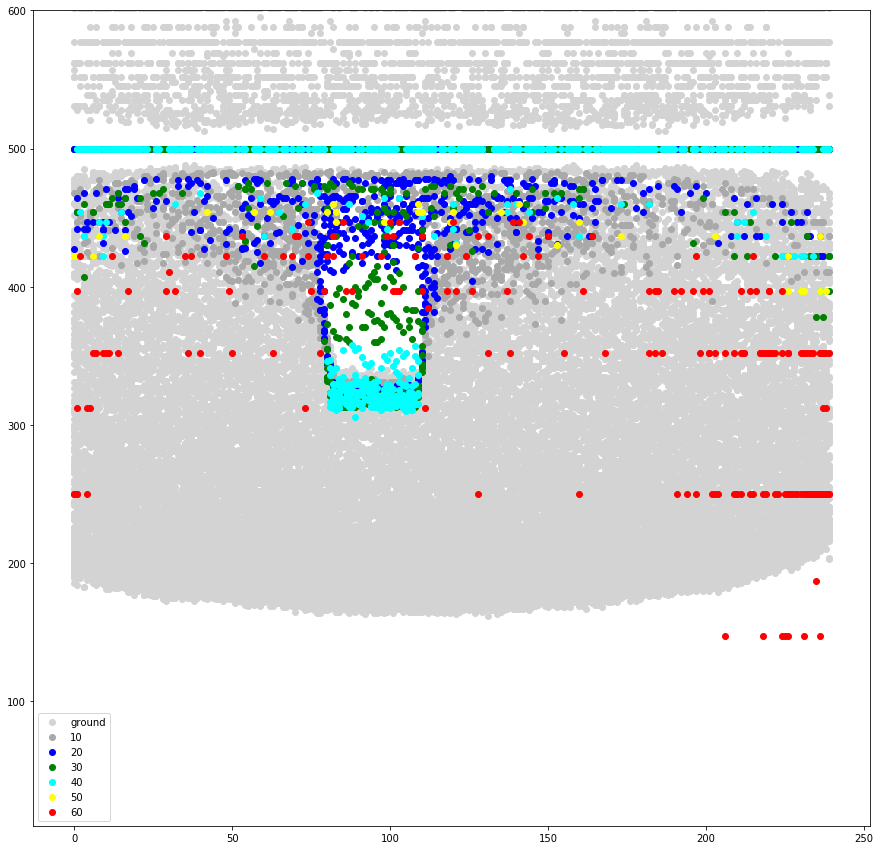

In [105]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


#map1(ax,"depth_stay10")
#map1(ax,"depth_side10")
#map1(ax,"depth_lay1050")
#map1(ax, "depth_stay20")
#map1(ax,"depth_side20")
#map1(ax,"depth_lay20")
map1(ax,"depth_stay30")
#map1(ax,"depth_side30")
#map1(ax,"depth_lay30")
#map1(ax,"depth_bigbox50")
#map1(ax,"depth_bigbox30")



ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

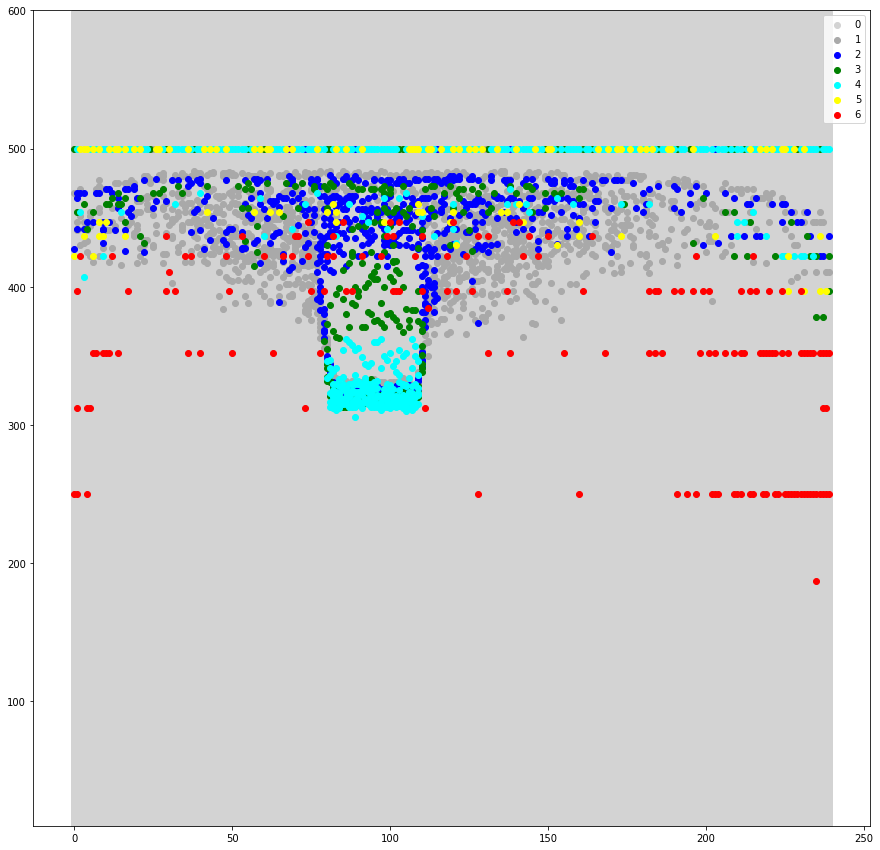

In [120]:
from collections import defaultdict
from math import *
from tabulate import tabulate
from IPython.display import HTML, display

plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()


def show_dump(ax, file):
    dheight = 600
    dotsx = defaultdict(lambda: [])
    dotsd = defaultdict(lambda: [])
    
    colors = ["lightgray", "darkgray", "blue", "green", "cyan", "yellow", "red"]
    img = load_img(file, width=width, height=dheight)
    for d in range(dheight):
        for x in range(width):
            h = img[x,d]
            lev = int(h / 10);
            if lev > 6:
                lev = 6
            dotsx[lev].append(x)
            dotsd[lev].append(d)
    for lev in range(7):
        if lev in dotsx:
            xs = dotsx[lev]
            ds = dotsd[lev]
            ax.scatter(xs,ds,label=f"{lev}", c = colors[lev])

    
    #for d in range(dheight):
    #    print(d, img[110,d])
        

show_dump(ax, "../test1")

ax.legend()
ax.set_ylim(10,600)
#ax.set_xlim(110,150)
    
plt.show()

In [115]:
img[235,179],img[236,179],img[237,179],img[238,179],img[239,179]

(209.0, 222.0, 212.0, 227.0, 216.0)